# КЕЙС 1

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import warnings

warnings.filterwarnings('ignore')

# Установим seed для воспроизводимости
np.random.seed(42)
random.seed(42)

In [ ]:
def generate_users_data(n_users=1000):
    """Генерация данных о пользователях"""
    users = []

    # Списки для генерации
    cities = ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
              'Нижний Новгород', 'Челябинск', 'Самара', 'Омск', 'Ростов-на-Дону']

    interests_list = ['политика', 'спорт', 'технологии', 'музыка', 'кино',
                      'путешествия', 'еда', 'мода', 'образование', 'игры',
                      'наука', 'искусство', 'фитнес', 'бизнес', 'автомобили']

    for i in range(n_users):
        age = random.randint(18, 65)
        gender = random.choice(['М', 'Ж'])
        city = random.choice(cities)

        # Генерация интересов (от 3 до 7 интересов у каждого пользователя)
        num_interests = random.randint(3, 7)
        interests = random.sample(interests_list, num_interests)

        # Дата регистрации (от 1 до 5 лет назад)
        reg_date = datetime.now() - timedelta(days=random.randint(365, 1825))

        users.append({
            'user_id': i + 1,
            'age': age,
            'gender': gender,
            'city': city,
            'interests': ', '.join(interests),
            'registration_date': reg_date.strftime('%Y-%m-%d'),
            'followers_count': int(np.random.exponential(500)),
            'friends_count': random.randint(50, 500)
        })

    return pd.DataFrame(users)

# Генерация данных
users_df = generate_users_data(1000)
print("✅ Данные пользователей сгенерированы")
print(f"Количество пользователей: {len(users_df)}")
print(users_df.head())

✅ Данные пользователей сгенерированы
Количество пользователей: 1000
   user_id  age gender            city  \
0        1   58      М          Москва   
1        2   52      М  Ростов-на-Дону   
2        3   53      М            Омск   
3        4   39      Ж     Новосибирск   
4        5   40      Ж  Ростов-на-Дону   

                                           interests registration_date  \
0   музыка, автомобили, технологии, искусство, спорт        2021-03-06   
1  политика, автомобили, спорт, музыка, искусство...        2021-08-06   
2     музыка, мода, игры, кино, политика, технологии        2021-01-21   
3             фитнес, путешествия, спорт, автомобили        2022-11-03   
4     фитнес, политика, искусство, мода, образование        2024-04-09   

   followers_count  friends_count  
0              234            429  
1             1505             63  
2              658            266  
3              456             99  
4               84            243  


In [ ]:
def generate_posts_data(n_posts=5000, n_users=1000):
    """Генерация данных о постах"""
    posts = []

    topics = ['политика', 'спорт', 'технологии', 'музыка', 'кино',
              'путешествия', 'еда', 'мода', 'образование', 'игры']

    # Создаем шаблоны текстов для разных тем
    templates = {
        'политика': ['Новые изменения в законодательстве', 'Выборы 2024', 'Международные отношения'],
        'спорт': ['Результаты матча', 'Тренировка дня', 'Спортивные новости'],
        'технологии': ['Новый гаджет', 'ИИ в нашей жизни', 'Программирование'],
        'музыка': ['Новый альбом', 'Концерт в городе', 'Музыкальный жанр'],
        'кино': ['Кинообзор', 'Премьера недели', 'Классика кино'],
        'путешествия': ['Отзыв об отеле', 'Советы путешественникам', 'Красивые места'],
        'еда': ['Рецепт дня', 'Обзор ресторана', 'Здоровое питание'],
        'мода': ['Тенденции сезона', 'Стильный образ', 'Модный показ'],
        'образование': ['Онлайн-курсы', 'Советы по учебе', 'Новые методики'],
        'игры': ['Обзор игры', 'Киберспорт', 'Геймдизайн']
    }

    start_date = datetime.now() - timedelta(days=365)

    for i in range(n_posts):
        user_id = random.randint(1, n_users)
        topic = random.choice(topics)

        # Генерация даты поста (за последний год)
        post_date = start_date + timedelta(days=random.randint(0, 365),
                                           hours=random.randint(0, 23),
                                           minutes=random.randint(0, 59))

        # Генерация текста поста
        template = random.choice(templates[topic])
        text = f"{template} #{topic} #{random.choice(['новость', 'мнение', 'совет'])}"

        # Генерация хэштегов
        hashtags = f"#{topic}, #{random.choice(['день', 'неделя', 'год'])}"

        posts.append({
            'post_id': i + 1,
            'user_id': user_id,
            'topic': topic,
            'text': text,
            'hashtags': hashtags,
            'post_date': post_date.strftime('%Y-%m-%d %H:%M:%S'),
            'post_length': len(text),
            'is_video': random.choice([True, False])
        })

    return pd.DataFrame(posts)

# Генерация данных
posts_df = generate_posts_data(5000, 1000)
print("✅ Данные постов сгенерированы")
print(f"Количество постов: {len(posts_df)}")
print(posts_df.head())

✅ Данные постов сгенерированы
Количество постов: 5000
   post_id  user_id       topic                                   text  \
0        1      817  технологии  Программирование #технологии #новость   
1        2      576      музыка       Музыкальный жанр #музыка #мнение   
2        3      238      музыка          Новый альбом #музыка #новость   
3        4       13         еда                 Рецепт дня #еда #совет   
4        5       45       спорт      Спортивные новости #спорт #мнение   

               hashtags            post_date  post_length  is_video  
0  #технологии, #неделя  2025-03-15 06:12:56           37     False  
1      #музыка, #неделя  2025-11-04 11:45:56           32      True  
2      #музыка, #неделя  2025-02-12 16:06:56           29     False  
3         #еда, #неделя  2025-04-07 19:00:56           22     False  
4         #спорт, #день  2025-04-10 18:05:56           33      True  


In [ ]:
def generate_activity_data(posts_df, users_df, n_activities=50000):
    """Генерация данных об активности"""
    activities = []
    activity_types = ['like', 'comment', 'repost']

    # Создаем словарь для комментариев по темам
    comments_by_topic = {
        'политика': ['Интересная точка зрения', 'Согласен/Не согласен', 'Важная тема'],
        'спорт': ['Отличный результат!', 'Болею за наших', 'Хорошая игра'],
        'технологии': ['Полезная информация', 'Жду новинку', 'Инновационно'],
        'музыка': ['Прекрасная музыка', 'Талантливый исполнитель', 'Люблю этот жанр'],
    }

    for i in range(n_activities):
        # Выбираем случайный пост
        post = posts_df.iloc[random.randint(0, len(posts_df) - 1)]
        post_id = post['post_id']
        topic = post['topic']

        # Выбираем случайного пользователя (не автора поста)
        user_id = random.randint(1, len(users_df))
        while user_id == post['user_id']:
            user_id = random.randint(1, len(users_df))

        activity_type = random.choices(activity_types,
                                       weights=[0.7, 0.2, 0.1],  # 70% лайков, 20% комментариев, 10% репостов
                                       k=1)[0]

        # Генерация времени активности (после даты поста)
        post_date = datetime.strptime(post['post_date'], '%Y-%m-%d %H:%M:%S')
        max_days_after = min(30, (datetime.now() - post_date).days)  # активность в течение 30 дней после поста
        if max_days_after > 0:
            days_after = random.randint(0, max_days_after)
            activity_date = post_date + timedelta(days=days_after,
                                                  hours=random.randint(0, 23),
                                                  minutes=random.randint(0, 59))
        else:
            activity_date = post_date

        activity = {
            'activity_id': i + 1,
            'user_id': user_id,
            'post_id': post_id,
            'activity_type': activity_type,
            'activity_date': activity_date.strftime('%Y-%m-%d %H:%M:%S')
        }

        # Добавляем текст комментария если это комментарий
        if activity_type == 'comment':
            if topic in comments_by_topic:
                activity['comment_text'] = random.choice(comments_by_topic[topic])
            else:
                activity['comment_text'] = random.choice(['Интересно!', 'Спасибо за пост', 'Хорошая информация'])

        activities.append(activity)

    return pd.DataFrame(activities)

# Генерация данных
activity_df = generate_activity_data(posts_df, users_df, 50000)
print("✅ Данные активности сгенерированы")
print(f"Количество активностей: {len(activity_df)}")
print(activity_df.head())

✅ Данные активности сгенерированы
Количество активностей: 50000
   activity_id  user_id  post_id activity_type        activity_date  \
0            1      523     3365          like  2025-02-15 20:22:56   
1            2      147     2403          like  2025-12-19 18:59:56   
2            3      120     4137          like  2025-11-13 01:37:56   
3            4      676     3131          like  2025-05-04 04:15:56   
4            5      440      362          like  2025-09-29 05:14:56   

  comment_text  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [ ]:
print("💾 Сохранение данных в CSV файлы...")
users_df.to_csv('social_media_users.csv', index=False, encoding='utf-8')
posts_df.to_csv('social_media_posts.csv', index=False, encoding='utf-8')
activity_df.to_csv('social_media_activity.csv', index=False, encoding='utf-8')

print(f"✅ Данные сохранены:")
print(f"  👤 Пользователи: {len(users_df)} записей")
print(f"  📝 Посты: {len(posts_df)} записей")
print(f"  🔥 Активность: {len(activity_df)} записей")

💾 Сохранение данных в CSV файлы...
✅ Данные сохранены:
  👤 Пользователи: 1000 записей
  📝 Посты: 5000 записей
  🔥 Активность: 50000 записей


📊 Демографический анализ пользователей...


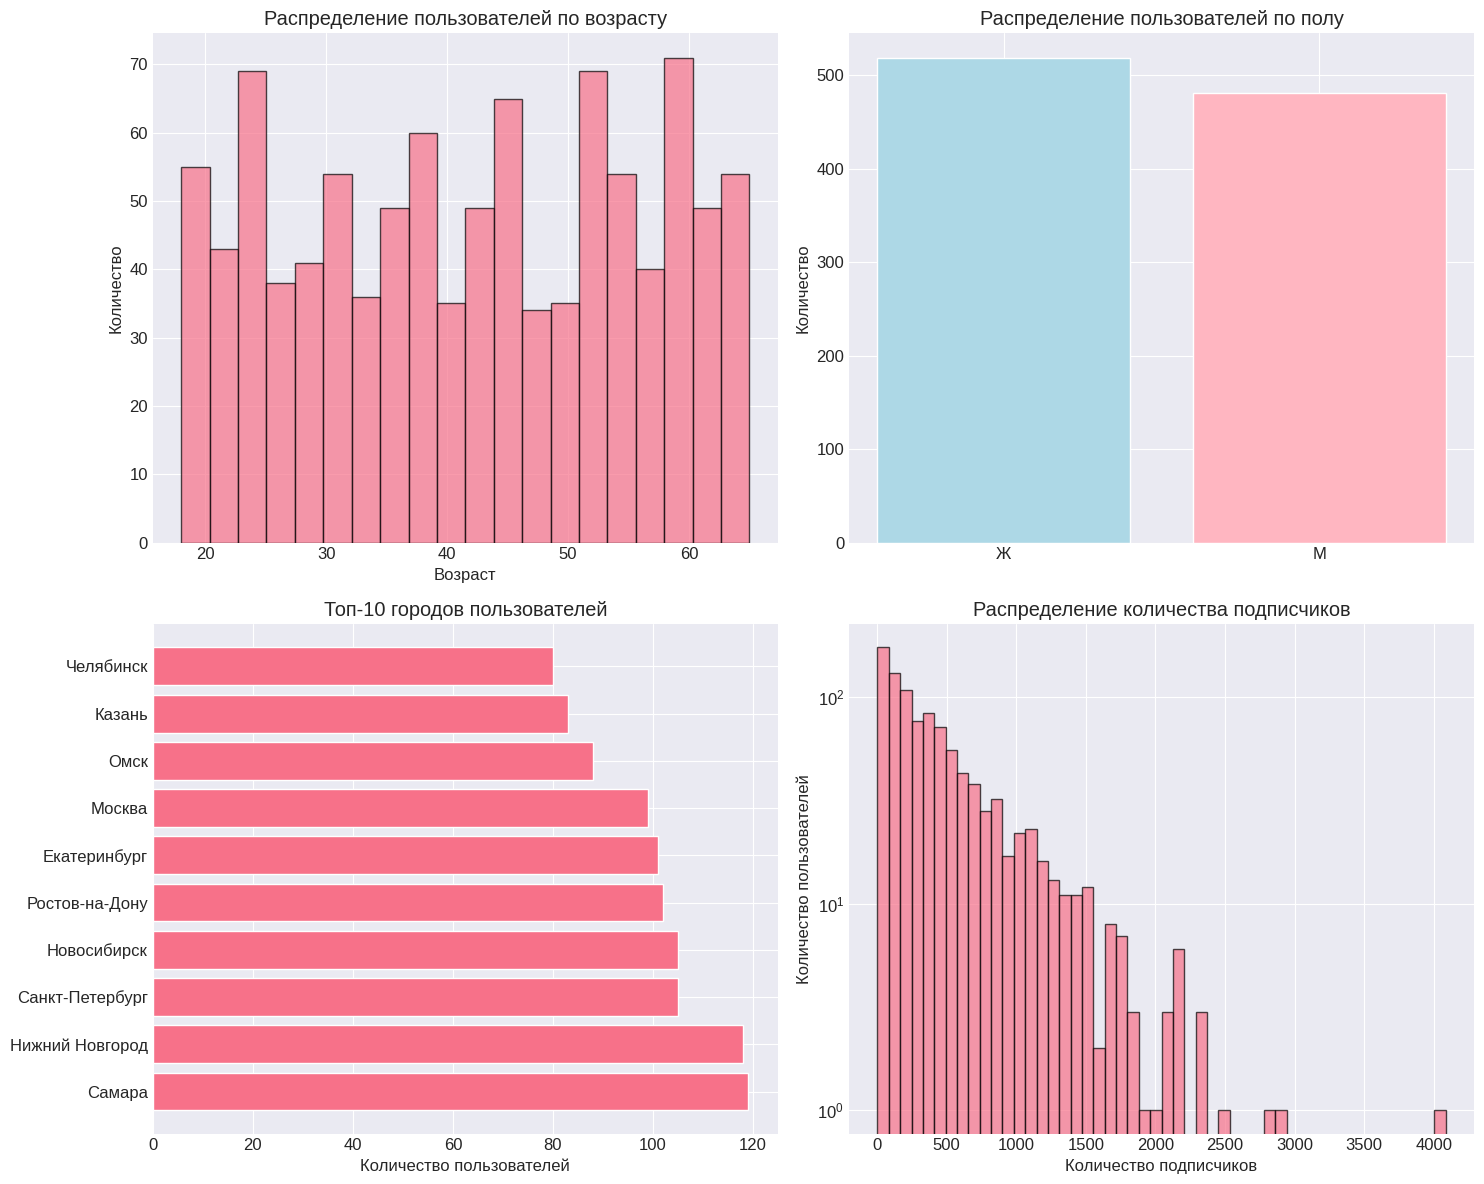

In [ ]:
print("📊 Демографический анализ пользователей...")

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Распределение по возрасту
axes[0, 0].hist(users_df['age'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение пользователей по возрасту')
axes[0, 0].set_xlabel('Возраст')
axes[0, 0].set_ylabel('Количество')

# Распределение по полу
gender_counts = users_df['gender'].value_counts()
axes[0, 1].bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink'])
axes[0, 1].set_title('Распределение пользователей по полу')
axes[0, 1].set_ylabel('Количество')

# Топ-10 городов
top_cities = users_df['city'].value_counts().head(10)
axes[1, 0].barh(range(len(top_cities)), top_cities.values)
axes[1, 0].set_yticks(range(len(top_cities)))
axes[1, 0].set_yticklabels(top_cities.index)
axes[1, 0].set_title('Топ-10 городов пользователей')
axes[1, 0].set_xlabel('Количество пользователей')

# Распределение подписчиков
axes[1, 1].hist(users_df['followers_count'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Распределение количества подписчиков')
axes[1, 1].set_xlabel('Количество подписчиков')
axes[1, 1].set_ylabel('Количество пользователей')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.savefig('user_demographics.png', dpi=150, bbox_inches='tight')
plt.show()

📈 Анализ популярных тем и трендов...


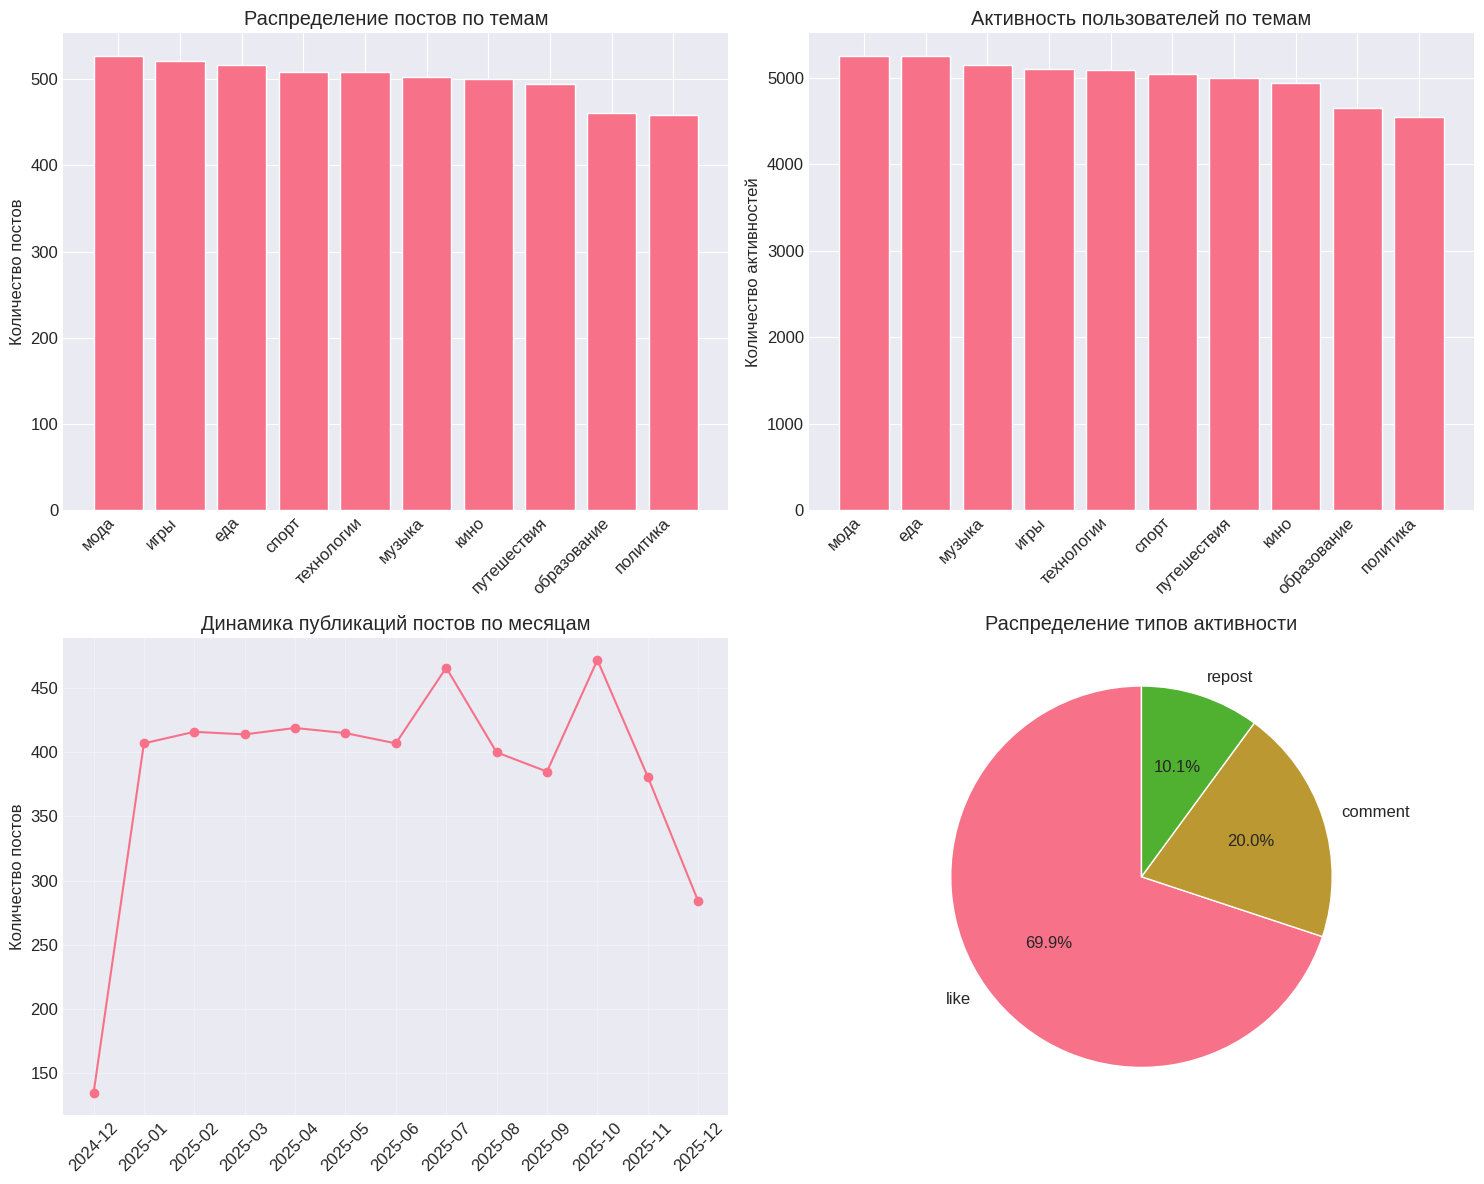

In [ ]:
print("📈 Анализ популярных тем и трендов...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Популярность тем в постах
topic_counts = posts_df['topic'].value_counts()
axes[0, 0].bar(range(len(topic_counts)), topic_counts.values)
axes[0, 0].set_xticks(range(len(topic_counts)))
axes[0, 0].set_xticklabels(topic_counts.index, rotation=45, ha='right')
axes[0, 0].set_title('Распределение постов по темам')
axes[0, 0].set_ylabel('Количество постов')

# Активность по темам (объединяем посты и активность)
posts_with_activity = pd.merge(posts_df, activity_df, on='post_id')
activity_by_topic = posts_with_activity.groupby('topic')['activity_type'].count().sort_values(ascending=False)
axes[0, 1].bar(range(len(activity_by_topic)), activity_by_topic.values)
axes[0, 1].set_xticks(range(len(activity_by_topic)))
axes[0, 1].set_xticklabels(activity_by_topic.index, rotation=45, ha='right')
axes[0, 1].set_title('Активность пользователей по темам')
axes[0, 1].set_ylabel('Количество активностей')

# Динамика постов по месяцам
posts_df['post_date'] = pd.to_datetime(posts_df['post_date'])
posts_df['month'] = posts_df['post_date'].dt.to_period('M')
monthly_posts = posts_df.groupby('month').size()
axes[1, 0].plot(range(len(monthly_posts)), monthly_posts.values, marker='o')
axes[1, 0].set_xticks(range(len(monthly_posts)))
axes[1, 0].set_xticklabels([str(m) for m in monthly_posts.index], rotation=45)
axes[1, 0].set_title('Динамика публикаций постов по месяцам')
axes[1, 0].set_ylabel('Количество постов')
axes[1, 0].grid(True, alpha=0.3)

# Типы активности
activity_counts = activity_df['activity_type'].value_counts()
axes[1, 1].pie(activity_counts.values, labels=activity_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Распределение типов активности')

plt.tight_layout()
plt.savefig('content_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

⏰ Анализ активности по времени суток...


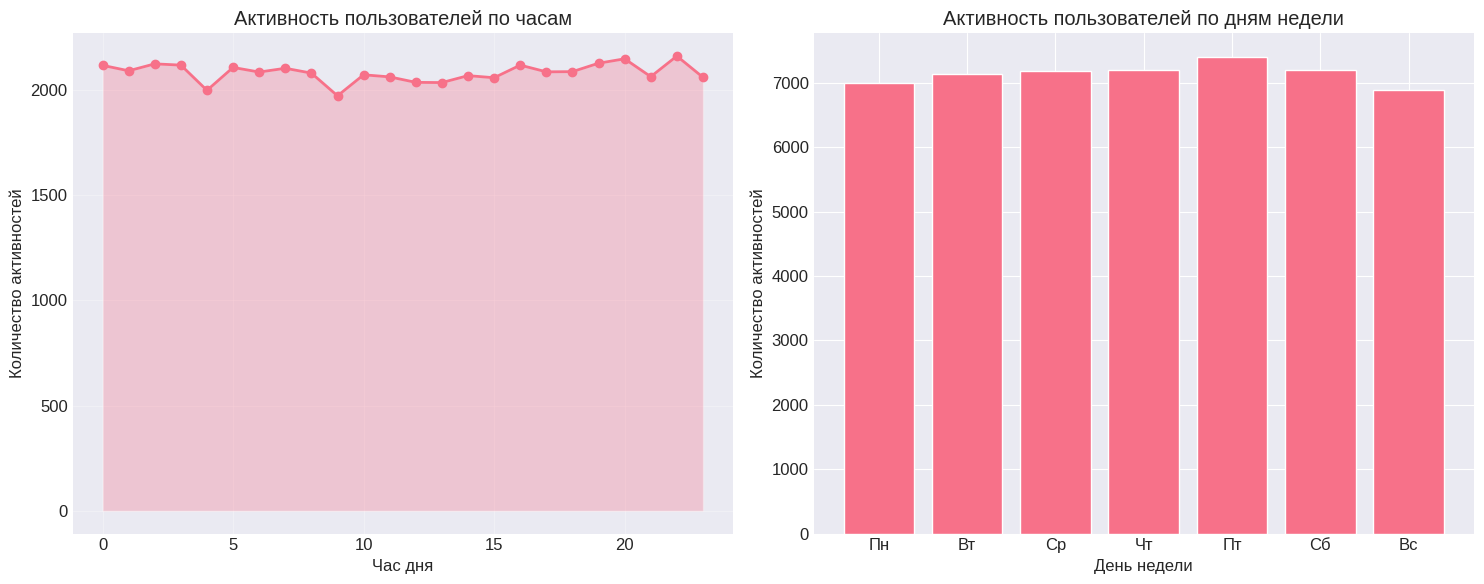

In [ ]:
print("⏰ Анализ активности по времени суток...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

activity_df['activity_date'] = pd.to_datetime(activity_df['activity_date'])
activity_df['hour'] = activity_df['activity_date'].dt.hour

# Активность по часам
hourly_activity = activity_df.groupby('hour').size()
axes[0].plot(hourly_activity.index, hourly_activity.values, marker='o', linewidth=2)
axes[0].set_title('Активность пользователей по часам')
axes[0].set_xlabel('Час дня')
axes[0].set_ylabel('Количество активностей')
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(hourly_activity.index, hourly_activity.values, alpha=0.3)

# Активность по дням недели
activity_df['weekday'] = activity_df['activity_date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity = activity_df.groupby('weekday').size().reindex(weekday_order)
weekday_names_ru = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
axes[1].bar(weekday_names_ru, weekday_activity.values)
axes[1].set_title('Активность пользователей по дням недели')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Количество активностей')

plt.tight_layout()
plt.savefig('activity_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

🎯 Анализ вовлеченности пользователей...


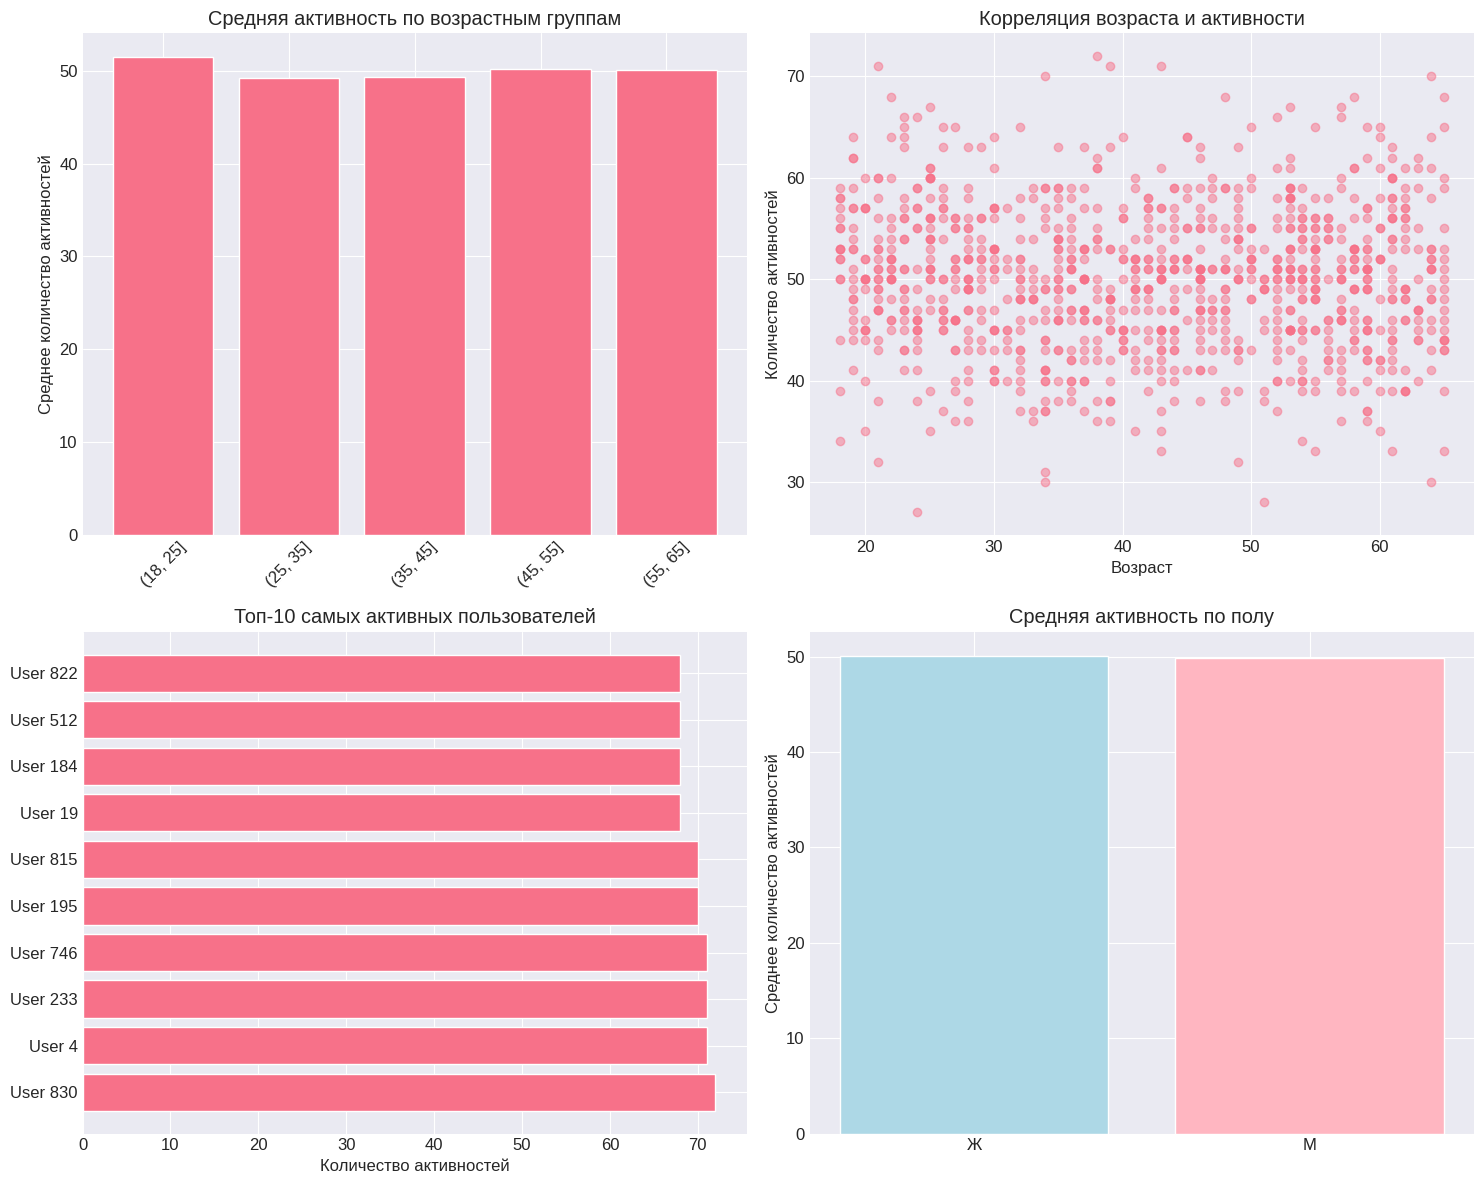

In [ ]:
print("🎯 Анализ вовлеченности пользователей...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Вовлеченность по возрасту
user_activity = activity_df.groupby('user_id').size().reset_index(name='activity_count')
user_data = pd.merge(users_df, user_activity, left_on='user_id', right_on='user_id', how='left')
user_data['activity_count'] = user_data['activity_count'].fillna(0)

# Активность по возрастным группам
user_data['age_group'] = pd.cut(user_data['age'], bins=[18, 25, 35, 45, 55, 65])
age_group_activity = user_data.groupby('age_group')['activity_count'].mean()
axes[0, 0].bar(range(len(age_group_activity)), age_group_activity.values)
axes[0, 0].set_xticks(range(len(age_group_activity)))
axes[0, 0].set_xticklabels([str(g) for g in age_group_activity.index], rotation=45)
axes[0, 0].set_title('Средняя активность по возрастным группам')
axes[0, 0].set_ylabel('Среднее количество активностей')

# Корреляция возраста и активности
axes[0, 1].scatter(user_data['age'], user_data['activity_count'], alpha=0.5)
axes[0, 1].set_title('Корреляция возраста и активности')
axes[0, 1].set_xlabel('Возраст')
axes[0, 1].set_ylabel('Количество активностей')

# Самые активные пользователи
top_active_users = user_data.nlargest(10, 'activity_count')[['user_id', 'activity_count', 'age', 'city']]
axes[1, 0].barh(range(len(top_active_users)), top_active_users['activity_count'])
axes[1, 0].set_yticks(range(len(top_active_users)))
axes[1, 0].set_yticklabels([f"User {uid}" for uid in top_active_users['user_id']])
axes[1, 0].set_title('Топ-10 самых активных пользователей')
axes[1, 0].set_xlabel('Количество активностей')

# Вовлеченность по полу
gender_activity = user_data.groupby('gender')['activity_count'].mean()
axes[1, 1].bar(gender_activity.index, gender_activity.values, color=['lightblue', 'lightpink'])
axes[1, 1].set_title('Средняя активность по полу')
axes[1, 1].set_ylabel('Среднее количество активностей')

plt.tight_layout()
plt.savefig('user_engagement.png', dpi=150, bbox_inches='tight')
plt.show()

👥 Кластеризация пользователей по интересам...


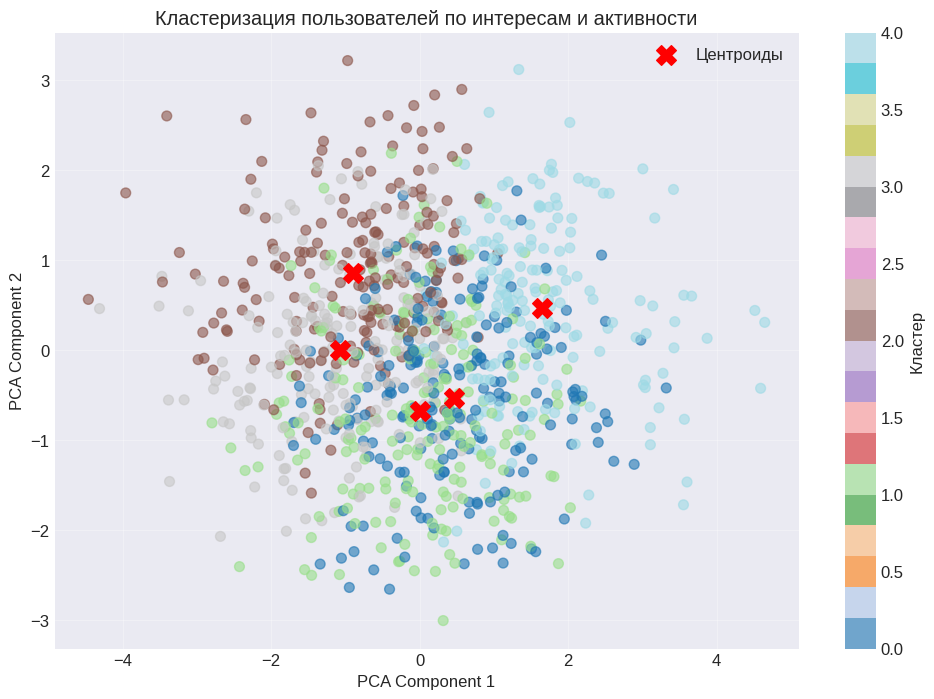

In [ ]:
print("👥 Кластеризация пользователей по интересам...")

# Создаем матрицу интересов пользователей
all_interests = set()
for interests in users_df['interests'].str.split(', '):
    all_interests.update(interests)

# Создаем бинарную матрицу интересов
interest_matrix = pd.DataFrame(0, index=users_df['user_id'], columns=list(all_interests))
for idx, row in users_df.iterrows():
    interests = row['interests'].split(', ')
    for interest in interests:
        interest_matrix.loc[row['user_id'], interest] = 1

# Добавляем информацию об активности
user_activity_summary = activity_df.groupby('user_id').agg({
    'activity_id': 'count',
    'activity_type': lambda x: (x == 'like').sum()
}).rename(columns={'activity_id': 'total_activity', 'activity_type': 'likes_count'})

# Объединяем данные
user_features = pd.merge(interest_matrix, user_activity_summary, left_index=True, right_index=True, how='left')
user_features = user_features.fillna(0)

# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_features)

# Применяем PCA для визуализации
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Кластеризация K-means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Визуализация кластеров
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='tab20', alpha=0.6, s=50)
plt.colorbar(scatter, label='Кластер')
plt.title('Кластеризация пользователей по интересам и активности')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True, alpha=0.3)

# Добавляем центроиды кластеров в PCA пространстве
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Центроиды')
plt.legend()

plt.savefig('user_clusters.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
print("📋 Характеристики кластеров пользователей:")
print("-" * 50)

user_features['cluster'] = clusters
cluster_summary = user_features.groupby('cluster').mean()

for cluster_id in range(5):
    cluster_data = cluster_summary.loc[cluster_id]
    top_interests = cluster_data.nlargest(5).index.tolist()
    print(f"Кластер {cluster_id}:")
    print(f"  👥 Количество пользователей: {(clusters == cluster_id).sum()}")
    print(f"  🎯 Топ интересы: {', '.join([i for i in top_interests if i not in ['total_activity', 'likes_count']][:3])}")
    print(f"  📊 Средняя активность: {cluster_data['total_activity']:.1f}")
    print(f"  ❤️ Среднее количество лайков: {cluster_data['likes_count']:.1f}")
    print()

📋 Характеристики кластеров пользователей:
--------------------------------------------------
Кластер 0:
  👥 Количество пользователей: 205
  🎯 Топ интересы: мода, наука, технологии
  📊 Средняя активность: 52.6
  ❤️ Среднее количество лайков: 36.8

Кластер 1:
  👥 Количество пользователей: 212
  🎯 Топ интересы: наука, фитнес, технологии
  📊 Средняя активность: 49.5
  ❤️ Среднее количество лайков: 34.9

Кластер 2:
  👥 Количество пользователей: 197
  🎯 Топ интересы: кино, мода, технологии
  📊 Средняя активность: 45.9
  ❤️ Среднее количество лайков: 31.7

Кластер 3:
  👥 Количество пользователей: 203
  🎯 Топ интересы: искусство, образование, игры
  📊 Средняя активность: 44.5
  ❤️ Среднее количество лайков: 30.2

Кластер 4:
  👥 Количество пользователей: 183
  🎯 Топ интересы: автомобили, политика, игры
  📊 Средняя активность: 58.1
  ❤️ Среднее количество лайков: 41.9



# КЕЙС 2

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Библиотеки успешно импортированы!")

✅ Библиотеки успешно импортированы!


In [ ]:
print("📂 Загрузка данных из CSV файлов...")
print("=" * 50)

try:
    # Загрузка всех данных
    intersections_df = pd.read_csv('city_intersections.csv', encoding='utf-8')
    road_segments_df = pd.read_csv('road_segments.csv', encoding='utf-8')
    stops_df = pd.read_csv('transport_stops.csv', encoding='utf-8')
    vehicles_df = pd.read_csv('public_transport.csv', encoding='utf-8')
    routes_df = pd.read_csv('transport_routes.csv', encoding='utf-8')
    gps_tracks_df = pd.read_csv('gps_tracks.csv', encoding='utf-8')
    passengers_df = pd.read_csv('passengers.csv', encoding='utf-8')
    trips_df = pd.read_csv('passenger_trips.csv', encoding='utf-8')
    traffic_df = pd.read_csv('traffic_data.csv', encoding='utf-8')

    print("✅ Данные успешно загружены:")
    print(f"1. 🚦 Перекрестки: {len(intersections_df)} записей")
    print(f"2. 🛣️ Дорожные сегменты: {len(road_segments_df)} записей")
    print(f"3. 🚏 Остановки: {len(stops_df)} записей")
    print(f"4. 🚌 Транспорт: {len(vehicles_df)} единиц")
    print(f"5. 🗺️ Маршруты: {len(routes_df)} маршрутов")
    print(f"6. 📍 GPS-треки: {len(gps_tracks_df)} записей")
    print(f"7. 👥 Пассажиры: {len(passengers_df)} человек")
    print(f"8. 🚕 Поездки: {len(trips_df)} поездок")
    print(f"9. 🚗 Данные о трафике: {len(traffic_df)} записей")

except FileNotFoundError as e:
    print(f"❌ Ошибка: Файл не найден - {e}")
    print("⚠️ Сначала запустите код генерации данных!")
    exit(1)

📂 Загрузка данных из CSV файлов...
✅ Данные успешно загружены:
1. 🚦 Перекрестки: 121 записей
2. 🛣️ Дорожные сегменты: 220 записей
3. 🚏 Остановки: 49 записей
4. 🚌 Транспорт: 100 единиц
5. 🗺️ Маршруты: 20 маршрутов
6. 📍 GPS-треки: 15459 записей
7. 👥 Пассажиры: 2000 человек
8. 🚕 Поездки: 3000 поездок
9. 🚗 Данные о трафике: 3168 записей


In [ ]:
print("\n🔗 Интеграция разнородных источников данных...")
print("-" * 30)

# Объединяем данные GPS с данными о транспорте
gps_with_vehicle = pd.merge(gps_tracks_df, vehicles_df, on='vehicle_id', how='left')

# Объединяем данные о поездках с данными о пассажирах
trips_with_passengers = pd.merge(trips_df, passengers_df, on='passenger_id', how='left')

# Объединяем данные о трафике с дорожными сегментами
traffic_with_segments = pd.merge(traffic_df, road_segments_df, on='segment_id', how='left')

# Создаем временные метки для анализа
gps_with_vehicle['timestamp'] = pd.to_datetime(gps_with_vehicle['timestamp'])
gps_with_vehicle['hour'] = gps_with_vehicle['timestamp'].dt.hour
gps_with_vehicle['day_of_week'] = gps_with_vehicle['timestamp'].dt.dayofweek
gps_with_vehicle['date'] = gps_with_vehicle['timestamp'].dt.date

trips_with_passengers['start_time'] = pd.to_datetime(trips_with_passengers['start_time'])
trips_with_passengers['hour'] = trips_with_passengers['start_time'].dt.hour
trips_with_passengers['day_of_week'] = trips_with_passengers['start_time'].dt.dayofweek

traffic_with_segments['timestamp'] = pd.to_datetime(traffic_with_segments['timestamp'])
traffic_with_segments['hour'] = traffic_with_segments['timestamp'].dt.hour
traffic_with_segments['day_of_week'] = traffic_with_segments['timestamp'].dt.dayofweek

print("✅ Интеграция данных завершена")
print(f"📊 Размеры объединенных датафреймов:")
print(f"   GPS с данными о транспорте: {gps_with_vehicle.shape}")
print(f"   Поездки с пассажирами: {trips_with_passengers.shape}")
print(f"   Трафик с сегментами: {traffic_with_segments.shape}")


🔗 Интеграция разнородных источников данных...
------------------------------
✅ Интеграция данных завершена
📊 Размеры объединенных датафреймов:
   GPS с данными о транспорте: (15459, 18)
   Поездки с пассажирами: (3000, 18)
   Трафик с сегментами: (3168, 16)



👥 Анализ пиковых нагрузок - Пассажиропоток...
------------------------------


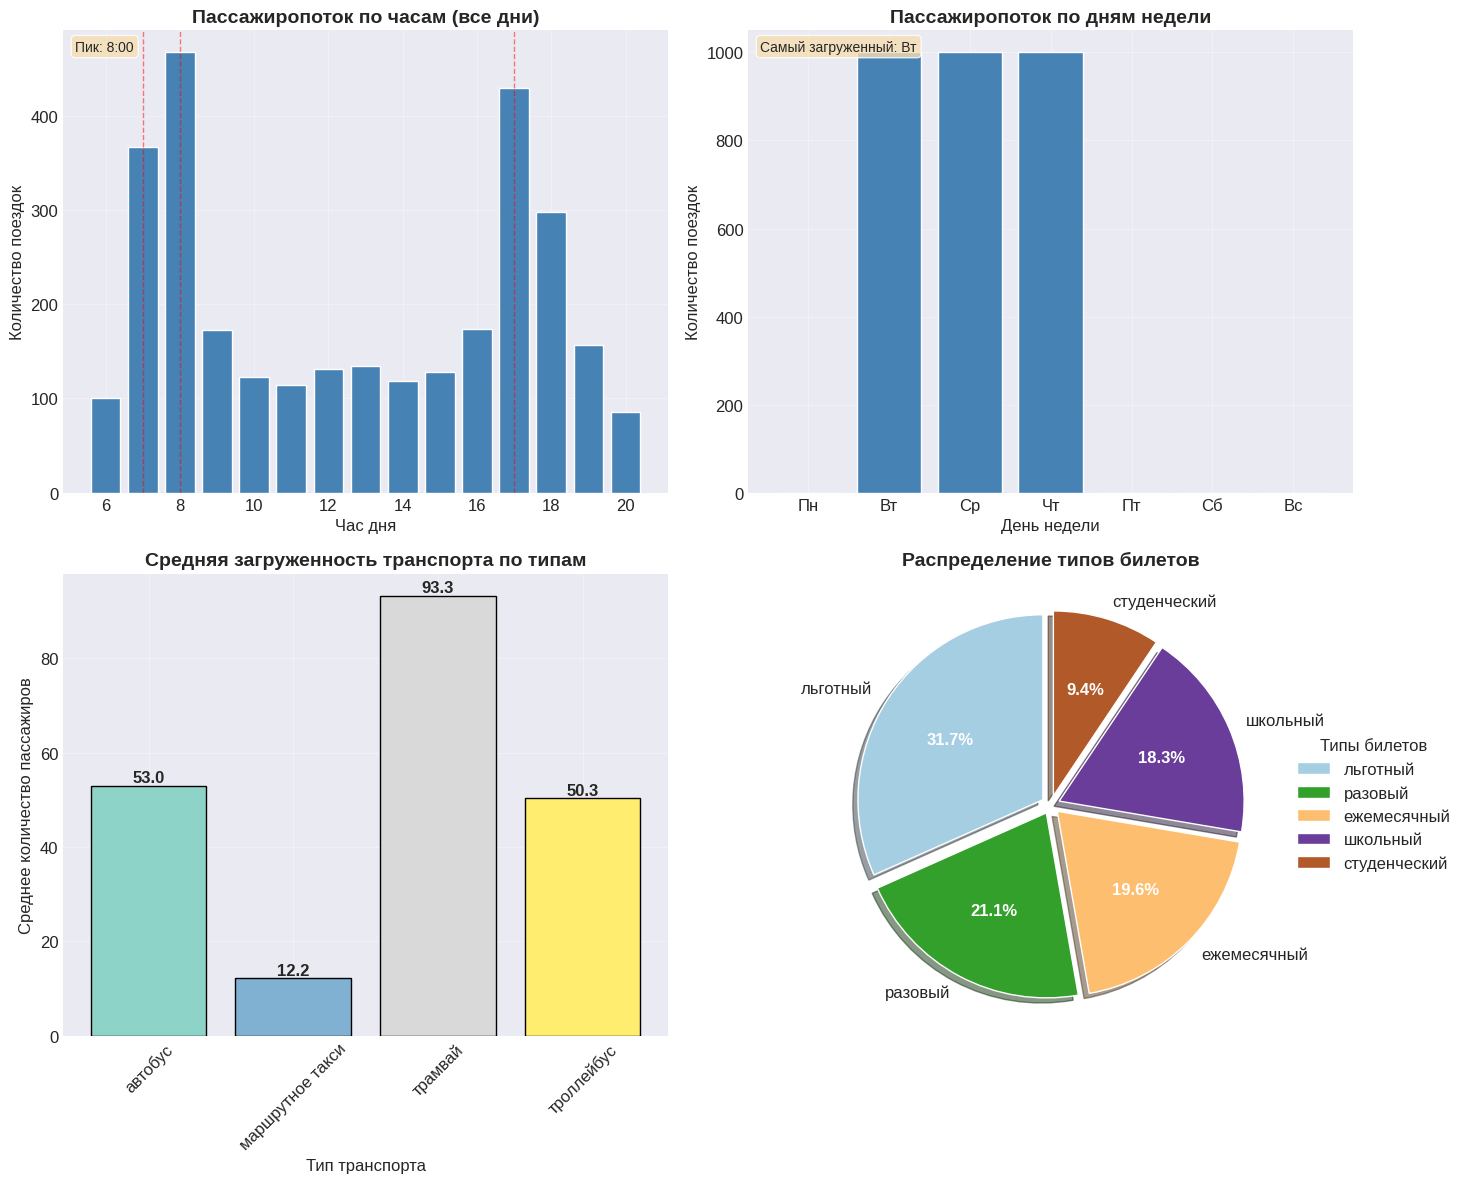

✅ Анализ пассажиропотока завершен
💾 График сохранен как 'passenger_load_analysis.png'


In [ ]:
print("\n👥 Анализ пиковых нагрузок - Пассажиропоток...")
print("-" * 30)

# Создаем графики для анализа пассажиропотока
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Пассажиропоток по часам (все дни)
if not trips_with_passengers.empty:
    hourly_passengers = trips_with_passengers.groupby('hour').size()
    axes[0, 0].bar(hourly_passengers.index, hourly_passengers.values, color='steelblue')
    axes[0, 0].set_title('Пассажиропоток по часам (все дни)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Час дня', fontsize=12)
    axes[0, 0].set_ylabel('Количество поездок', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)

    # Выделяем пиковые часы
    peak_hours = hourly_passengers.nlargest(3).index
    for hour in peak_hours:
        axes[0, 0].axvline(x=hour, color='red', linestyle='--', alpha=0.5, linewidth=1)

    # Добавляем аннотацию для пиковых часов
    axes[0, 0].text(0.02, 0.98, f'Пик: {hourly_passengers.idxmax()}:00',
                    transform=axes[0, 0].transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
else:
    axes[0, 0].text(0.5, 0.5, 'Нет данных о пассажирах',
                    ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Пассажиропоток по часам')

# 2. Пассажиропоток по дням недели
if not trips_with_passengers.empty:
    daily_passengers = trips_with_passengers.groupby('day_of_week').size()

    # Создаем полный список дней недели
    weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

    # Создаем полный Series со всеми днями недели
    full_daily_passengers = pd.Series(0, index=range(7))
    full_daily_passengers.update(daily_passengers)

    # Цвета для будних и выходных дней
    colors = ['steelblue'] * 5 + ['lightcoral'] * 2
    axes[0, 1].bar(weekday_names, full_daily_passengers.values, color=colors)
    axes[0, 1].set_title('Пассажиропоток по дням недели', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('День недели', fontsize=12)
    axes[0, 1].set_ylabel('Количество поездок', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)

    # Находим самый загруженный день
    busiest_day_idx = full_daily_passengers.idxmax()
    axes[0, 1].text(0.02, 0.98, f'Самый загруженный: {weekday_names[busiest_day_idx]}',
                    transform=axes[0, 1].transAxes, fontsize=10,
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
else:
    axes[0, 1].text(0.5, 0.5, 'Нет данных о пассажирах',
                    ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Пассажиропоток по дням недели')

# 3. Загруженность транспорта по типам
if not gps_with_vehicle.empty and 'vehicle_type' in gps_with_vehicle.columns:
    vehicle_usage = gps_with_vehicle.groupby('vehicle_type')['passengers_count'].mean()

    # Создаем красивую палитру цветов
    colors_vehicle = plt.cm.Set3(np.linspace(0, 1, len(vehicle_usage)))

    axes[1, 0].bar(vehicle_usage.index, vehicle_usage.values, color=colors_vehicle, edgecolor='black')
    axes[1, 0].set_title('Средняя загруженность транспорта по типам', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Тип транспорта', fontsize=12)
    axes[1, 0].set_ylabel('Среднее количество пассажиров', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Добавляем значения на столбцы
    for i, v in enumerate(vehicle_usage.values):
        axes[1, 0].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'Нет данных о GPS-треках',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Загруженность транспорта')

# 4. Распределение типов билетов
if not trips_with_passengers.empty and 'ticket_type' in trips_with_passengers.columns:
    ticket_distribution = trips_with_passengers['ticket_type'].value_counts()
    if not ticket_distribution.empty:
        # Красивая цветовая схема
        colors_ticket = plt.cm.Paired(np.linspace(0, 1, len(ticket_distribution)))

        wedges, texts, autotexts = axes[1, 1].pie(ticket_distribution.values,
                                                  labels=ticket_distribution.index,
                                                  colors=colors_ticket,
                                                  autopct='%1.1f%%',
                                                  startangle=90,
                                                  explode=[0.05] * len(ticket_distribution),
                                                  shadow=True)

        # Делаем текст жирным
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        axes[1, 1].set_title('Распределение типов билетов', fontsize=14, fontweight='bold')

        # Добавляем легенду
        axes[1, 1].legend(wedges, ticket_distribution.index,
                         title="Типы билетов",
                         loc="center left",
                         bbox_to_anchor=(1, 0, 0.5, 1))
    else:
        axes[1, 1].text(0.5, 0.5, 'Нет данных о билетах',
                        ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Распределение типов билетов')
else:
    axes[1, 1].text(0.5, 0.5, 'Нет данных о пассажирах',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Распределение типов билетов')

plt.tight_layout()
plt.savefig('passenger_load_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Анализ пассажиропотока завершен")
print("💾 График сохранен как 'passenger_load_analysis.png'")


🚗 Анализ загруженности дорог...
------------------------------


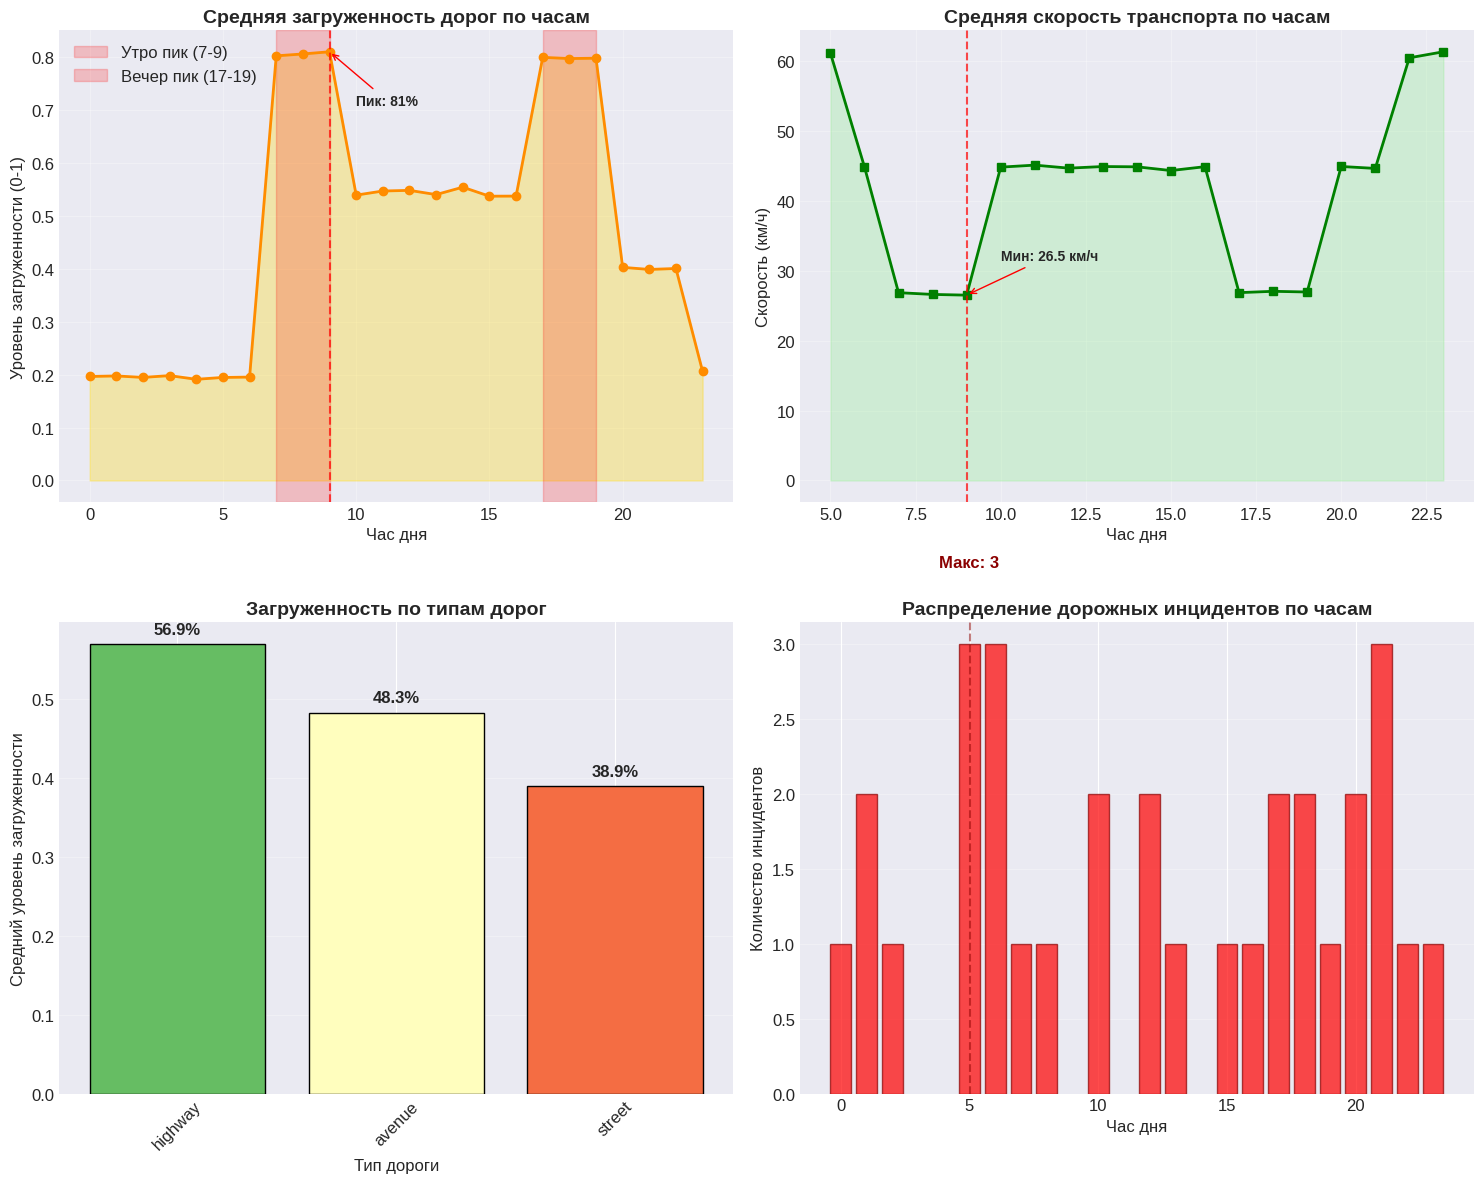

✅ Анализ загруженности дорог завершен
💾 График сохранен как 'traffic_congestion_analysis.png'


In [ ]:
print("\n🚗 Анализ загруженности дорог...")
print("-" * 30)

# Создаем графики для анализа загруженности дорог
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Загруженность дорог по часам
if not traffic_with_segments.empty and 'congestion_level' in traffic_with_segments.columns:
    hourly_congestion = traffic_with_segments.groupby('hour')['congestion_level'].mean()

    axes[0, 0].plot(hourly_congestion.index, hourly_congestion.values,
                    marker='o', linewidth=2, color='darkorange', markersize=6)
    axes[0, 0].fill_between(hourly_congestion.index, hourly_congestion.values,
                           alpha=0.3, color='gold')
    axes[0, 0].set_title('Средняя загруженность дорог по часам', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Час дня', fontsize=12)
    axes[0, 0].set_ylabel('Уровень загруженности (0-1)', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)

    # Выделяем пиковые часы
    axes[0, 0].axvspan(7, 9, alpha=0.2, color='red', label='Утро пик (7-9)')
    axes[0, 0].axvspan(17, 19, alpha=0.2, color='red', label='Вечер пик (17-19)')

    # Находим максимальную загруженность
    max_congestion_hour = hourly_congestion.idxmax()
    max_congestion_value = hourly_congestion.max()
    axes[0, 0].axvline(x=max_congestion_hour, color='red', linestyle='--', alpha=0.7)

    # Добавляем аннотацию
    axes[0, 0].annotate(f'Пик: {max_congestion_value:.0%}',
                       xy=(max_congestion_hour, max_congestion_value),
                       xytext=(max_congestion_hour+1, max_congestion_value-0.1),
                       arrowprops=dict(arrowstyle='->', color='red'),
                       fontsize=10, fontweight='bold')

    axes[0, 0].legend(loc='upper left')
else:
    axes[0, 0].text(0.5, 0.5, 'Нет данных о загруженности',
                    ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Загруженность дорог по часам')

# 2. Скорость транспорта по часам
if not gps_with_vehicle.empty and 'speed_kmh' in gps_with_vehicle.columns:
    hourly_speed = gps_with_vehicle.groupby('hour')['speed_kmh'].mean()

    axes[0, 1].plot(hourly_speed.index, hourly_speed.values,
                    marker='s', linewidth=2, color='green', markersize=6)
    axes[0, 1].fill_between(hourly_speed.index, hourly_speed.values,
                           alpha=0.3, color='lightgreen')
    axes[0, 1].set_title('Средняя скорость транспорта по часам', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Час дня', fontsize=12)
    axes[0, 1].set_ylabel('Скорость (км/ч)', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)

    # Выделяем часы с минимальной скоростью
    min_speed_hour = hourly_speed.idxmin()
    min_speed_value = hourly_speed.min()
    axes[0, 1].axvline(x=min_speed_hour, color='red', linestyle='--', alpha=0.7)

    axes[0, 1].annotate(f'Мин: {min_speed_value:.1f} км/ч',
                       xy=(min_speed_hour, min_speed_value),
                       xytext=(min_speed_hour+1, min_speed_value+5),
                       arrowprops=dict(arrowstyle='->', color='red'),
                       fontsize=10, fontweight='bold')
else:
    axes[0, 1].text(0.5, 0.5, 'Нет данных о скорости',
                    ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Скорость транспорта по часам')

# 3. Загруженность по типам дорог
if not traffic_with_segments.empty and 'road_type' in traffic_with_segments.columns:
    congestion_by_road_type = traffic_with_segments.groupby('road_type')['congestion_level'].mean()

    # Сортируем по убыванию загруженности
    congestion_by_road_type = congestion_by_road_type.sort_values(ascending=False)

    # Создаем цветовую шкалу в зависимости от загруженности
    colors_road = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(congestion_by_road_type)))

    bars = axes[1, 0].bar(congestion_by_road_type.index, congestion_by_road_type.values,
                          color=colors_road, edgecolor='black')
    axes[1, 0].set_title('Загруженность по типам дорог', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Тип дороги', fontsize=12)
    axes[1, 0].set_ylabel('Средний уровень загруженности', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Добавляем значения на столбцы
    for bar, value in zip(bars, congestion_by_road_type.values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{value:.1%}', ha='center', va='bottom', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'Нет данных о загруженности',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Загруженность по типам дорог')

# 4. Распределение инцидентов по часам
if not traffic_with_segments.empty and 'incident' in traffic_with_segments.columns:
    incidents_by_hour = traffic_with_segments[traffic_with_segments['incident']].groupby('hour').size()
    if not incidents_by_hour.empty:
        axes[1, 1].bar(incidents_by_hour.index, incidents_by_hour.values,
                      color='red', alpha=0.7, edgecolor='darkred')
        axes[1, 1].set_title('Распределение дорожных инцидентов по часам', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Час дня', fontsize=12)
        axes[1, 1].set_ylabel('Количество инцидентов', fontsize=12)
        axes[1, 1].grid(True, alpha=0.3, axis='y')

        # Выделяем час с максимальным количеством инцидентов
        if len(incidents_by_hour) > 0:
            max_incidents_hour = incidents_by_hour.idxmax()
            max_incidents_value = incidents_by_hour.max()

            axes[1, 1].axvline(x=max_incidents_hour, color='darkred', linestyle='--', alpha=0.5)
            axes[1, 1].text(max_incidents_hour, max_incidents_value + 0.5,
                          f'Макс: {max_incidents_value}',
                          ha='center', va='bottom', fontweight='bold', color='darkred')
    else:
        axes[1, 1].text(0.5, 0.5, 'Нет инцидентов',
                        ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Распределение дорожных инцидентов')
else:
    axes[1, 1].text(0.5, 0.5, 'Нет данных о трафике',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Распределение инцидентов')

plt.tight_layout()
plt.savefig('traffic_congestion_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Анализ загруженности дорог завершен")
print("💾 График сохранен как 'traffic_congestion_analysis.png'")


🗺️ Анализ для оптимизации маршрутов транспорта...
------------------------------


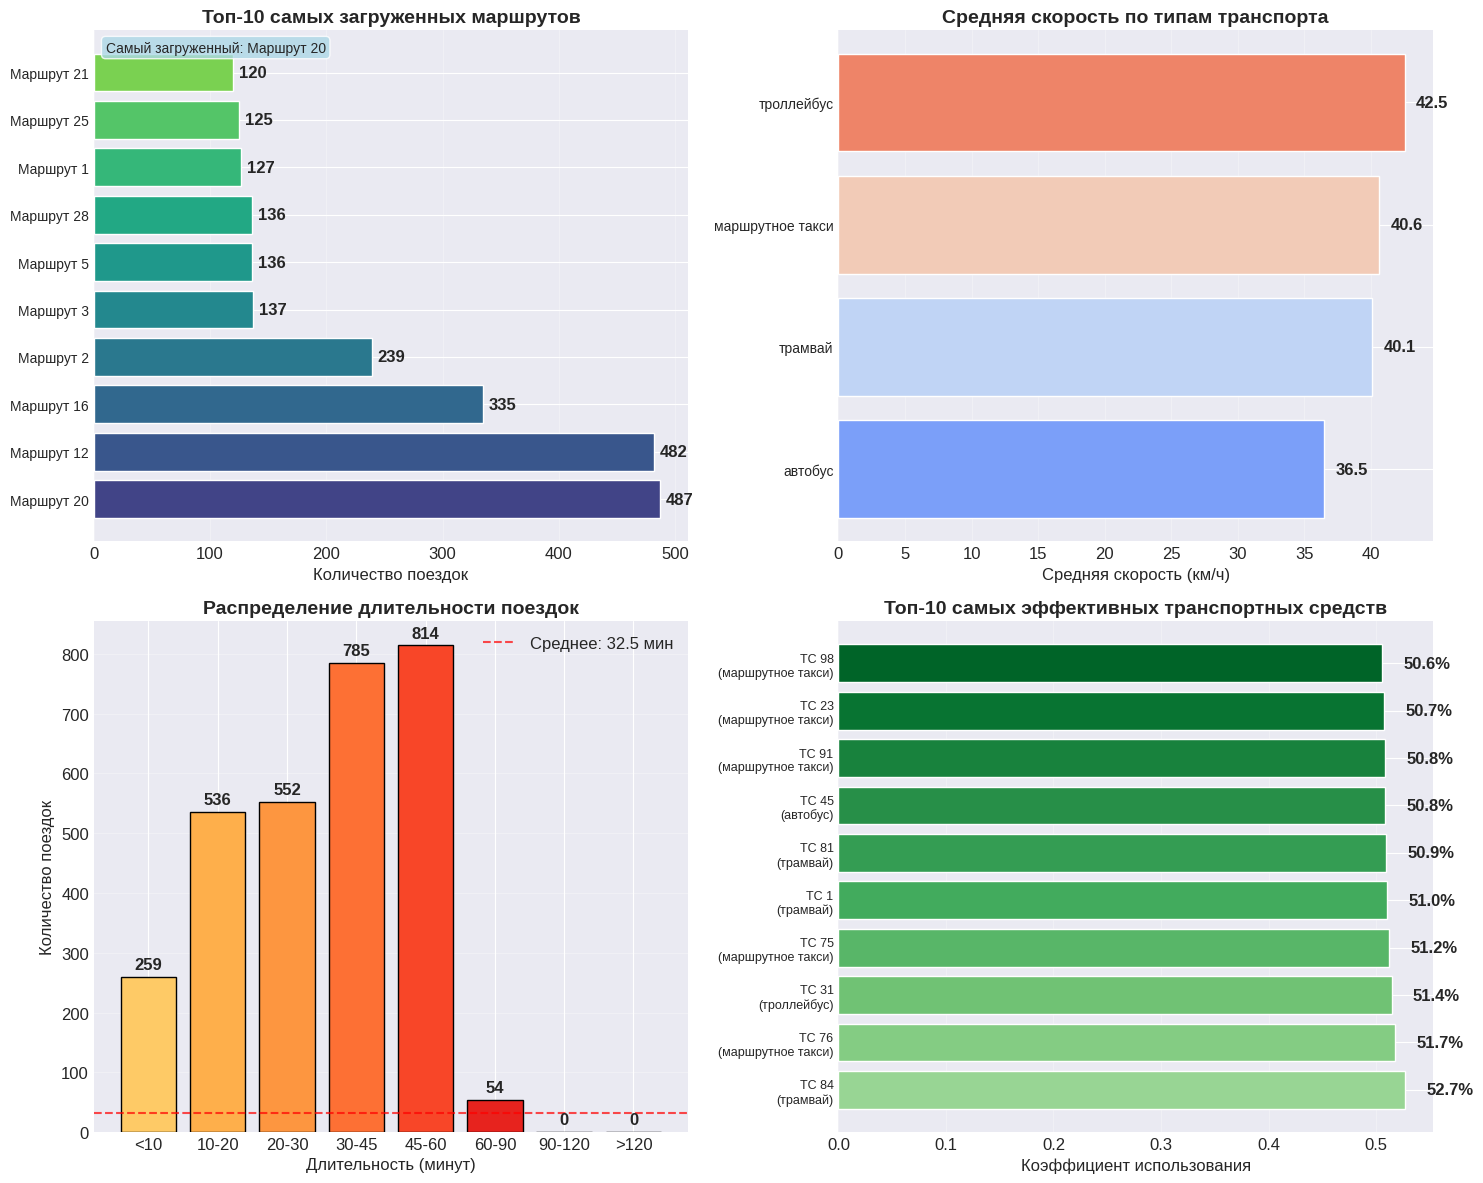

✅ Анализ оптимизации маршрутов завершен
💾 График сохранен как 'route_optimization_analysis.png'


In [ ]:
print("\n🗺️ Анализ для оптимизации маршрутов транспорта...")
print("-" * 30)

# Создаем графики для анализа оптимизации маршрутов
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Самые загруженные маршруты
if not trips_with_passengers.empty and 'route_id' in trips_with_passengers.columns:
    trips_by_route = trips_with_passengers.groupby('route_id').size().nlargest(10)
    if not trips_by_route.empty:
        # Создаем цветовую шкалу
        colors_route = plt.cm.viridis(np.linspace(0.2, 0.8, len(trips_by_route)))

        bars = axes[0, 0].barh(range(len(trips_by_route)), trips_by_route.values, color=colors_route)
        axes[0, 0].set_yticks(range(len(trips_by_route)))
        axes[0, 0].set_yticklabels([f'Маршрут {i}' for i in trips_by_route.index], fontsize=10)
        axes[0, 0].set_title('Топ-10 самых загруженных маршрутов', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Количество поездок', fontsize=12)
        axes[0, 0].grid(True, alpha=0.3, axis='x')

        # Добавляем значения на столбцы
        for i, (bar, value) in enumerate(zip(bars, trips_by_route.values)):
            axes[0, 0].text(value + max(trips_by_route.values)*0.01, bar.get_y() + bar.get_height()/2,
                          f'{value}', ha='left', va='center', fontweight='bold')

        # Информация о самом загруженном маршруте
        busiest_route = trips_by_route.index[0]
        busiest_count = trips_by_route.values[0]
        axes[0, 0].text(0.02, 0.98, f'Самый загруженный: Маршрут {busiest_route}',
                       transform=axes[0, 0].transAxes, fontsize=10,
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    else:
        axes[0, 0].text(0.5, 0.5, 'Нет данных о маршрутах',
                        ha='center', va='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Загруженность маршрутов')
else:
    axes[0, 0].text(0.5, 0.5, 'Нет данных о поездках',
                    ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Загруженность маршрутов')

# 2. Средняя скорость по типам транспорта
if not gps_with_vehicle.empty and 'vehicle_type' in gps_with_vehicle.columns:
    speed_by_vehicle_type = gps_with_vehicle.groupby('vehicle_type')['speed_kmh'].mean()
    if not speed_by_vehicle_type.empty:
        # Сортируем по скорости
        speed_by_vehicle_type = speed_by_vehicle_type.sort_values(ascending=True)

        colors_speed = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(speed_by_vehicle_type)))

        bars = axes[0, 1].barh(range(len(speed_by_vehicle_type)), speed_by_vehicle_type.values, color=colors_speed)
        axes[0, 1].set_yticks(range(len(speed_by_vehicle_type)))
        axes[0, 1].set_yticklabels(speed_by_vehicle_type.index, fontsize=10)
        axes[0, 1].set_title('Средняя скорость по типам транспорта', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Средняя скорость (км/ч)', fontsize=12)
        axes[0, 1].grid(True, alpha=0.3, axis='x')

        # Добавляем значения
        for i, (bar, value) in enumerate(zip(bars, speed_by_vehicle_type.values)):
            axes[0, 1].text(value + max(speed_by_vehicle_type.values)*0.02,
                          bar.get_y() + bar.get_height()/2,
                          f'{value:.1f}', ha='left', va='center', fontweight='bold')
    else:
        axes[0, 1].text(0.5, 0.5, 'Нет данных о скорости',
                        ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Скорость по типам транспорта')
else:
    axes[0, 1].text(0.5, 0.5, 'Нет данных о транспорте',
                    ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Скорость по типам транспорта')

# 3. Распределение длительности поездок
if not trips_with_passengers.empty and 'duration_min' in trips_with_passengers.columns:
    # Создаем интервалы для длительности
    duration_bins = [0, 10, 20, 30, 45, 60, 90, 120, float('inf')]
    duration_labels = ['<10', '10-20', '20-30', '30-45', '45-60', '60-90', '90-120', '>120']

    trips_with_passengers['duration_bin'] = pd.cut(
        trips_with_passengers['duration_min'],
        bins=duration_bins,
        labels=duration_labels,
        right=False
    )

    duration_distribution = trips_with_passengers['duration_bin'].value_counts().sort_index()

    # Цвета для разных длительностей
    colors_duration = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(duration_distribution)))

    bars = axes[1, 0].bar(duration_distribution.index.astype(str),
                         duration_distribution.values,
                         color=colors_duration,
                         edgecolor='black')

    axes[1, 0].set_title('Распределение длительности поездок', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Длительность (минут)', fontsize=12)
    axes[1, 0].set_ylabel('Количество поездок', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, duration_distribution.values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + max(duration_distribution.values)*0.01,
                       f'{value}', ha='center', va='bottom', fontweight='bold')

    # Средняя длительность
    avg_duration = trips_with_passengers['duration_min'].mean()
    axes[1, 0].axhline(y=avg_duration, color='red', linestyle='--', alpha=0.7, label=f'Среднее: {avg_duration:.1f} мин')
    axes[1, 0].legend()
else:
    axes[1, 0].text(0.5, 0.5, 'Нет данных о длительности',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Длительность поездок')

# 4. Эффективность использования транспорта
if not gps_with_vehicle.empty and 'passengers_count' in gps_with_vehicle.columns:
    vehicle_efficiency = gps_with_vehicle.groupby('vehicle_id').agg({
        'passengers_count': 'mean',
        'speed_kmh': 'mean'
    }).reset_index()

    # Объединяем с данными о транспорте
    vehicle_efficiency = pd.merge(vehicle_efficiency, vehicles_df, on='vehicle_id', how='left')

    # Проверяем наличие необходимых столбцов
    if 'capacity' in vehicle_efficiency.columns and 'passengers_count' in vehicle_efficiency.columns:
        vehicle_efficiency['utilization_rate'] = vehicle_efficiency['passengers_count'] / vehicle_efficiency['capacity']

        # Топ-10 самых эффективных транспортных средств
        top_efficient = vehicle_efficiency.nlargest(10, 'utilization_rate')

        if not top_efficient.empty:
            # Создаем составные метки
            labels = [f'ТС {int(row["vehicle_id"])}\n({row["vehicle_type"]})'
                     for _, row in top_efficient.iterrows()]

            colors_efficiency = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_efficient)))

            bars = axes[1, 1].barh(range(len(top_efficient)),
                                  top_efficient['utilization_rate'].values,
                                  color=colors_efficiency)

            axes[1, 1].set_yticks(range(len(top_efficient)))
            axes[1, 1].set_yticklabels(labels, fontsize=9)
            axes[1, 1].set_title('Топ-10 самых эффективных транспортных средств',
                                fontsize=14, fontweight='bold')
            axes[1, 1].set_xlabel('Коэффициент использования', fontsize=12)
            axes[1, 1].grid(True, alpha=0.3, axis='x')

            # Добавляем значения
            for i, (bar, value) in enumerate(zip(bars, top_efficient['utilization_rate'].values)):
                axes[1, 1].text(value + 0.02, bar.get_y() + bar.get_height()/2,
                              f'{value:.1%}', ha='left', va='center', fontweight='bold')
        else:
            axes[1, 1].text(0.5, 0.5, 'Нет данных для анализа',
                            ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Эффективность транспорта')
    else:
        axes[1, 1].text(0.5, 0.5, 'Нет данных о вместимости',
                        ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Эффективность транспорта')
else:
    axes[1, 1].text(0.5, 0.5, 'Нет данных о транспорте',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Эффективность транспорта')

plt.tight_layout()
plt.savefig('route_optimization_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Анализ оптимизации маршрутов завершен")
print("💾 График сохранен как 'route_optimization_analysis.png'")


⚠️ Анализ проблемных сегментов дорог...
------------------------------
📊 Топ-10 самых загруженных сегментов дорог:
+-------------+-----------------+--------------------+--------------------+-------------+
| Сегмент     | Загруженность   | Средняя скорость   |   Поток (авто/час) |   Инциденты |
+=============+=================+====================+====================+=============+
| Сегмент 21  | 58.5%           | 35.4 км/ч          |               2665 |           0 |
+-------------+-----------------+--------------------+--------------------+-------------+
| Сегмент 31  | 58.4%           | 47.3 км/ч          |               1742 |           0 |
+-------------+-----------------+--------------------+--------------------+-------------+
| Сегмент 156 | 58.3%           | 23.7 км/ч          |               2615 |           5 |
+-------------+-----------------+--------------------+--------------------+-------------+
| Сегмент 121 | 57.6%           | 35.8 км/ч          |               2613 

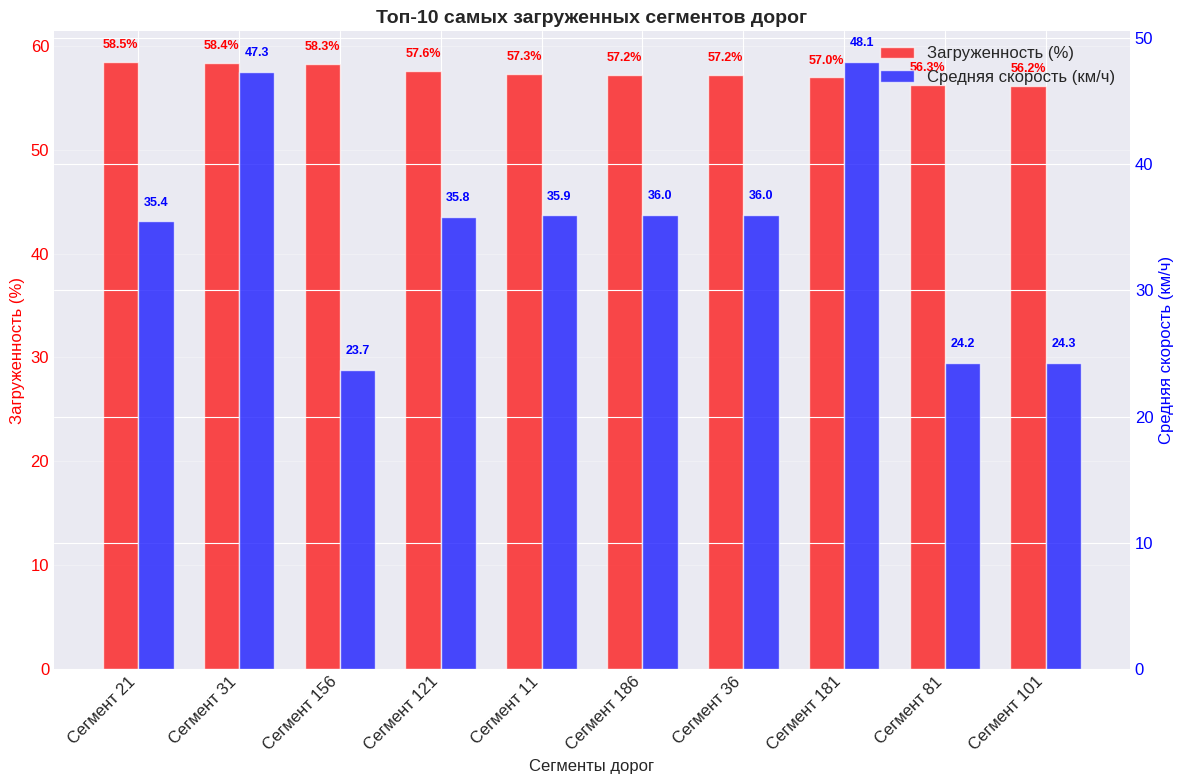


💡 Рекомендации для проблемных сегментов:
----------------------------------------

🚧 Сегмент 21:
   • Загруженность: 58.5%
   • Средняя скорость: 35.4 км/ч
   • Инциденты: 0

🚧 Сегмент 31:
   • Загруженность: 58.4%
   • Средняя скорость: 47.3 км/ч
   • Инциденты: 0

🚧 Сегмент 156:
   • Загруженность: 58.3%
   • Средняя скорость: 23.7 км/ч
   • Инциденты: 5
   💡 Рекомендация: Усилить контроль за соблюдением ПДД

🚧 Сегмент 121:
   • Загруженность: 57.6%
   • Средняя скорость: 35.8 км/ч
   • Инциденты: 0

🚧 Сегмент 11:
   • Загруженность: 57.3%
   • Средняя скорость: 35.9 км/ч
   • Инциденты: 1
   💡 Рекомендация: Усилить контроль за соблюдением ПДД

💾 График проблемных сегментов сохранен как 'problematic_segments.png'


In [ ]:
print("\n⚠️ Анализ проблемных сегментов дорог...")
print("-" * 30)

if not traffic_with_segments.empty:
    # Находим сегменты с наибольшей загруженностью
    congested_segments = traffic_with_segments.groupby('segment_id').agg({
        'congestion_level': 'mean',
        'avg_speed_kmh': 'mean',
        'traffic_flow_veh_h': 'mean',
        'incident': 'sum'
    }).nlargest(10, 'congestion_level')

    if not congested_segments.empty:
        print("📊 Топ-10 самых загруженных сегментов дорог:")
        print("=" * 70)

        # Создаем красивую таблицу
        from tabulate import tabulate

        table_data = []
        for idx, row in congested_segments.iterrows():
            table_data.append([
                f"Сегмент {idx}",
                f"{row['congestion_level']:.1%}",
                f"{row['avg_speed_kmh']:.1f} км/ч",
                f"{row['traffic_flow_veh_h']:.0f}",
                f"{int(row['incident'])}"
            ])

        headers = ["Сегмент", "Загруженность", "Средняя скорость", "Поток (авто/час)", "Инциденты"]
        print(tabulate(table_data, headers=headers, tablefmt="grid"))

        # Создаем визуализацию проблемных сегментов
        fig, ax = plt.subplots(figsize=(12, 8))

        # Подготовка данных для визуализации
        segments = [f"Сегмент {i}" for i in congested_segments.index]
        congestion_levels = congested_segments['congestion_level'].values * 100  # В процентах
        avg_speeds = congested_segments['avg_speed_kmh'].values
        incidents = congested_segments['incident'].values

        # Индекс для позиционирования
        x = np.arange(len(segments))
        width = 0.35

        # Две оси Y
        ax1 = ax
        bars1 = ax1.bar(x - width/2, congestion_levels, width,
                       label='Загруженность (%)', color='red', alpha=0.7)
        ax1.set_xlabel('Сегменты дорог', fontsize=12)
        ax1.set_ylabel('Загруженность (%)', color='red', fontsize=12)
        ax1.tick_params(axis='y', labelcolor='red')

        ax2 = ax1.twinx()
        bars2 = ax2.bar(x + width/2, avg_speeds, width,
                       label='Средняя скорость (км/ч)', color='blue', alpha=0.7)
        ax2.set_ylabel('Средняя скорость (км/ч)', color='blue', fontsize=12)
        ax2.tick_params(axis='y', labelcolor='blue')

        # Настройка графика
        ax1.set_xticks(x)
        ax1.set_xticklabels(segments, rotation=45, ha='right')
        ax1.set_title('Топ-10 самых загруженных сегментов дорог', fontsize=14, fontweight='bold')

        # Добавляем значения на столбцы
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom',
                    fontweight='bold', color='red', fontsize=9)

        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}', ha='center', va='bottom',
                    fontweight='bold', color='blue', fontsize=9)

        # Добавляем легенду
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

        # Добавляем сетку
        ax1.grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.savefig('problematic_segments.png', dpi=150, bbox_inches='tight')
        plt.show()

        print("\n💡 Рекомендации для проблемных сегментов:")
        print("-" * 40)

        # Анализируем каждый проблемный сегмент
        for idx, row in congested_segments.head(5).iterrows():
            congestion = row['congestion_level']
            speed = row['avg_speed_kmh']
            incidents = int(row['incident'])

            print(f"\n🚧 Сегмент {idx}:")
            print(f"   • Загруженность: {congestion:.1%}")
            print(f"   • Средняя скорость: {speed:.1f} км/ч")
            print(f"   • Инциденты: {incidents}")

            # Рекомендации на основе данных
            if congestion > 0.8:
                print("   💡 Рекомендация: Рассмотреть возможность создания выделенной полосы")
            if speed < 20:
                print("   💡 Рекомендация: Оптимизировать работу светофоров")
            if incidents > 0:
                print("   💡 Рекомендация: Усилить контроль за соблюдением ПДД")

    else:
        print("✅ Нет данных о загруженных сегментах - вся дорожная сеть работает оптимально!")
else:
    print("⚠️ Нет данных о трафике для анализа")

print("\n💾 График проблемных сегментов сохранен как 'problematic_segments.png'")


🔮 Прогнозирование загруженности дорог...
------------------------------
📈 Подготовка данных для прогнозирования...
🎯 Прогнозирование для сегмента 21...
   Обучающая выборка: 57 записей
   Тестовая выборка: 15 записей

📊 Результаты прогнозирования:
   • MAE (средняя абсолютная ошибка): 0.1819
   • R² (коэффициент детерминации): -0.1123
   ❌ Модель плохо предсказывает загруженность
   • Пример прогноза: для часа 9:00
     Прогнозируемая загруженность: 96.48%
     Фактическая загруженность: 100.00%


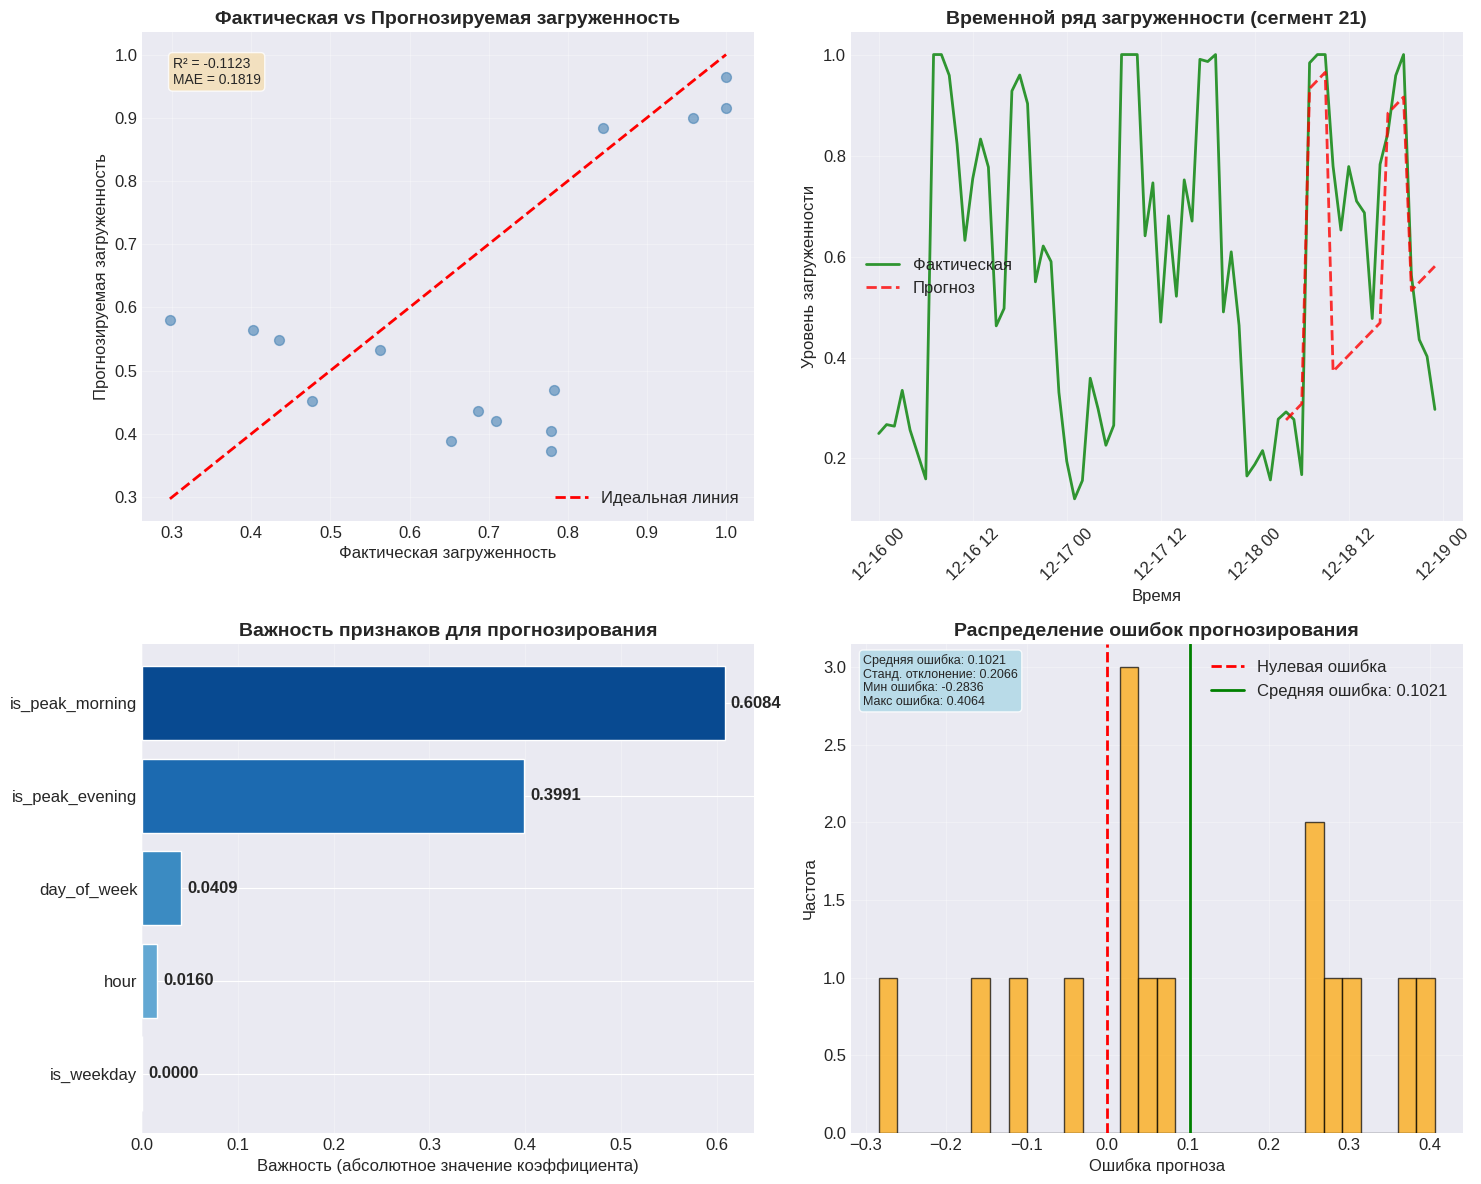


💾 Графики прогнозирования сохранены в 'traffic_forecasting_analysis.png'

🔮 Прогноз загруженности на следующие часы:
----------------------------------------
   Через 1 час(а/ов) (0:00): 29.4%
   Через 2 час(а/ов) (1:00): 31.0%
   Через 3 час(а/ов) (2:00): 32.6%
   Через 4 час(а/ов) (3:00): 34.2%
   Через 5 час(а/ов) (4:00): 35.8%
   Через 6 час(а/ов) (5:00): 37.4%


In [ ]:
print("\n🔮 Прогнозирование загруженности дорог...")
print("-" * 30)

# Проверяем наличие данных для прогнозирования
if not traffic_with_segments.empty and 'congestion_level' in traffic_with_segments.columns:
    print("📈 Подготовка данных для прогнозирования...")

    # Создаем признаки для прогнозирования
    traffic_forecast_data = traffic_with_segments.copy()
    traffic_forecast_data['is_weekday'] = (traffic_forecast_data['day_of_week'] < 5).astype(int)
    traffic_forecast_data['is_peak_morning'] = (
        (traffic_forecast_data['hour'] >= 7) & (traffic_forecast_data['hour'] <= 9)
    ).astype(int)
    traffic_forecast_data['is_peak_evening'] = (
        (traffic_forecast_data['hour'] >= 17) & (traffic_forecast_data['hour'] <= 19)
    ).astype(int)

    # Выбираем сегмент для прогнозирования
    if 'congested_segments' in locals() and not congested_segments.empty:
        segment_id_example = congested_segments.index[0]
        segment_data = traffic_forecast_data[traffic_forecast_data['segment_id'] == segment_id_example]

        if len(segment_data) > 50:  # Нужно достаточно данных для обучения
            print(f"🎯 Прогнозирование для сегмента {segment_id_example}...")

            # Создаем признаки для прогнозирования
            X = segment_data[['hour', 'day_of_week', 'is_weekday', 'is_peak_morning', 'is_peak_evening']]
            y = segment_data['congestion_level']

            # Разделяем на обучающую и тестовую выборки
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, shuffle=False
            )

            print(f"   Обучающая выборка: {len(X_train)} записей")
            print(f"   Тестовая выборка: {len(X_test)} записей")

            # Обучаем модель линейной регрессии
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Прогнозируем
            y_pred = model.predict(X_test)

            # Оцениваем модель
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            print("\n📊 Результаты прогнозирования:")
            print(f"   • MAE (средняя абсолютная ошибка): {mae:.4f}")
            print(f"   • R² (коэффициент детерминации): {r2:.4f}")

            if r2 > 0.7:
                print("   ✅ Модель хорошо предсказывает загруженность")
            elif r2 > 0.5:
                print("   ⚠️ Модель удовлетворительно предсказывает загруженность")
            else:
                print("   ❌ Модель плохо предсказывает загруженность")

            if len(X_test) > 0:
                print(f"   • Пример прогноза: для часа {int(X_test.iloc[0]['hour'])}:00")
                print(f"     Прогнозируемая загруженность: {y_pred[0]:.2%}")
                print(f"     Фактическая загруженность: {y_test.iloc[0]:.2%}")

            # Создаем визуализацию результатов прогнозирования
            fig, axes = plt.subplots(2, 2, figsize=(15, 12))

            # 1. Фактическая vs прогнозируемая загруженность
            axes[0, 0].scatter(y_test, y_pred, alpha=0.6, s=50, color='steelblue')
            axes[0, 0].plot([y_test.min(), y_test.max()],
                           [y_test.min(), y_test.max()],
                           'r--', lw=2, label='Идеальная линия')
            axes[0, 0].set_xlabel('Фактическая загруженность', fontsize=12)
            axes[0, 0].set_ylabel('Прогнозируемая загруженность', fontsize=12)
            axes[0, 0].set_title('Фактическая vs Прогнозируемая загруженность',
                                fontsize=14, fontweight='bold')
            axes[0, 0].grid(True, alpha=0.3)
            axes[0, 0].legend()

            # Добавляем текстовую информацию о качестве модели
            axes[0, 0].text(0.05, 0.95, f'R² = {r2:.4f}\nMAE = {mae:.4f}',
                          transform=axes[0, 0].transAxes, fontsize=10,
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

            # 2. Временной ряд загруженности
            segment_data_sorted = segment_data.sort_values('timestamp')

            # Берем последние 100 записей для наглядности
            sample_data = segment_data_sorted.tail(100)

            axes[0, 1].plot(sample_data['timestamp'], sample_data['congestion_level'],
                          linewidth=2, alpha=0.8, color='green', label='Фактическая')

            # Прогноз для последних точек
            last_points = sample_data.tail(20)
            if len(last_points) > 0:
                X_last = last_points[['hour', 'day_of_week', 'is_weekday',
                                     'is_peak_morning', 'is_peak_evening']]
                y_pred_last = model.predict(X_last)

                axes[0, 1].plot(last_points['timestamp'], y_pred_last,
                              linewidth=2, alpha=0.8, color='red',
                              linestyle='--', label='Прогноз')

            axes[0, 1].set_title(f'Временной ряд загруженности (сегмент {segment_id_example})',
                               fontsize=14, fontweight='bold')
            axes[0, 1].set_xlabel('Время', fontsize=12)
            axes[0, 1].set_ylabel('Уровень загруженности', fontsize=12)
            axes[0, 1].tick_params(axis='x', rotation=45)
            axes[0, 1].grid(True, alpha=0.3)
            axes[0, 1].legend()

            # 3. Важность признаков модели
            feature_names = ['hour', 'day_of_week', 'is_weekday', 'is_peak_morning', 'is_peak_evening']
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': np.abs(model.coef_)
            }).sort_values('importance', ascending=True)

            colors_importance = plt.cm.Blues(np.linspace(0.4, 0.9, len(feature_importance)))

            bars = axes[1, 0].barh(feature_importance['feature'],
                                  feature_importance['importance'],
                                  color=colors_importance)
            axes[1, 0].set_title('Важность признаков для прогнозирования',
                               fontsize=14, fontweight='bold')
            axes[1, 0].set_xlabel('Важность (абсолютное значение коэффициента)', fontsize=12)
            axes[1, 0].grid(True, alpha=0.3, axis='x')

            # Добавляем значения на столбцы
            for bar, value in zip(bars, feature_importance['importance']):
                axes[1, 0].text(value + max(feature_importance['importance'])*0.01,
                              bar.get_y() + bar.get_height()/2,
                              f'{value:.4f}', ha='left', va='center', fontweight='bold')

            # 4. Распределение ошибок прогнозирования
            errors = y_test - y_pred

            axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7, color='orange')
            axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Нулевая ошибка')
            axes[1, 1].axvline(x=errors.mean(), color='green', linestyle='-',
                             linewidth=2, label=f'Средняя ошибка: {errors.mean():.4f}')
            axes[1, 1].set_title('Распределение ошибок прогнозирования',
                               fontsize=14, fontweight='bold')
            axes[1, 1].set_xlabel('Ошибка прогноза', fontsize=12)
            axes[1, 1].set_ylabel('Частота', fontsize=12)
            axes[1, 1].grid(True, alpha=0.3)
            axes[1, 1].legend()

            # Добавляем статистику ошибок
            stats_text = (f'Средняя ошибка: {errors.mean():.4f}\n'
                         f'Станд. отклонение: {errors.std():.4f}\n'
                         f'Мин ошибка: {errors.min():.4f}\n'
                         f'Макс ошибка: {errors.max():.4f}')

            axes[1, 1].text(0.02, 0.98, stats_text,
                          transform=axes[1, 1].transAxes, fontsize=9,
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

            plt.tight_layout()
            plt.savefig('traffic_forecasting_analysis.png', dpi=150, bbox_inches='tight')
            plt.show()

            print("\n💾 Графики прогнозирования сохранены в 'traffic_forecasting_analysis.png'")

            # Прогноз на следующие часы
            print("\n🔮 Прогноз загруженности на следующие часы:")
            print("-" * 40)

            # Создаем данные для прогноза на следующие 6 часов
            current_hour = segment_data['hour'].max()
            next_hours = [(current_hour + i) % 24 for i in range(1, 7)]

            for i, hour in enumerate(next_hours, 1):
                # Создаем фиктивные данные для прогноза
                forecast_data = pd.DataFrame({
                    'hour': [hour],
                    'day_of_week': [segment_data['day_of_week'].mode()[0]],  # Самый частый день
                    'is_weekday': [1 if segment_data['day_of_week'].mode()[0] < 5 else 0],
                    'is_peak_morning': [1 if 7 <= hour <= 9 else 0],
                    'is_peak_evening': [1 if 17 <= hour <= 19 else 0]
                })

                prediction = model.predict(forecast_data)[0]
                print(f"   Через {i} час(а/ов) ({hour}:00): {prediction:.1%}")

        else:
            print(f"⚠️ Недостаточно данных для сегмента {segment_id_example} "
                  f"(только {len(segment_data)} записей, нужно >50)")
    else:
        print("⚠️ Нет данных о загруженных сегментах для прогнозирования")
else:
    print("⚠️ Нет данных о трафике для прогнозирования")


🎨 Создание комплексных визуализаций...
------------------------------
1. Создание тепловой карты загруженности...
   ✅ Тепловая карта создана

2. Анализ распределения пассажиров по возрасту...
   ✅ Средний возраст пассажиров: 44.6 лет
   ✅ Медианный возраст: 44.0 лет
   ✅ Самая активная группа: >60


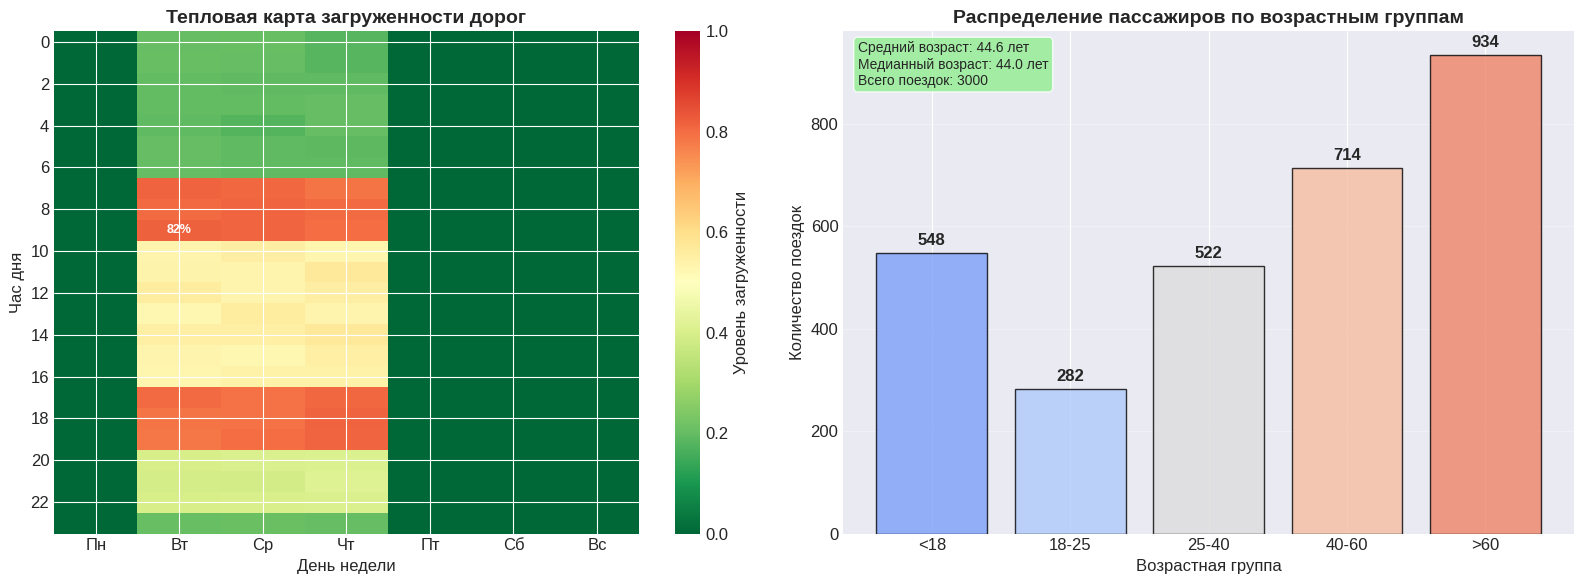


✅ Комплексные визуализации созданы
💾 Графики сохранены в 'heatmap_visualizations.png'


In [ ]:
print("\n🎨 Создание комплексных визуализаций...")
print("-" * 30)

# Создаем фигуру для комплексных визуализаций
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Тепловая карта загруженности по часам и дням
print("1. Создание тепловой карты загруженности...")

if not traffic_with_segments.empty and 'congestion_level' in traffic_with_segments.columns:
    # Создаем сводную таблицу для тепловой карты
    pivot_table = traffic_with_segments.pivot_table(
        values='congestion_level',
        index='hour',
        columns='day_of_week',
        aggfunc='mean'
    )

    # Переиндексируем на все дни недели
    weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

    # Создаем полную таблицу со всеми днями и часами
    full_pivot_table = pd.DataFrame(0, index=range(24), columns=range(7))

    # Заполняем данными
    for col in pivot_table.columns:
        if col in full_pivot_table.columns:
            full_pivot_table[col] = pivot_table[col].reindex(full_pivot_table.index, fill_value=0)

    # Переименовываем дни недели
    full_pivot_table.columns = weekday_names

    # Создаем тепловую карту
    im1 = axes[0].imshow(full_pivot_table.values, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=1)

    # Настраиваем оси
    axes[0].set_xticks(range(len(weekday_names)))
    axes[0].set_xticklabels(weekday_names)
    axes[0].set_yticks(range(0, 24, 2))
    axes[0].set_yticklabels(range(0, 24, 2))
    axes[0].set_xlabel('День недели', fontsize=12)
    axes[0].set_ylabel('Час дня', fontsize=12)
    axes[0].set_title('Тепловая карта загруженности дорог', fontsize=14, fontweight='bold')

    # Добавляем цветовую шкалу
    cbar = plt.colorbar(im1, ax=axes[0])
    cbar.set_label('Уровень загруженности', fontsize=12)

    # Выделяем самые загруженные ячейки
    max_val = full_pivot_table.values.max()
    max_indices = np.where(full_pivot_table.values == max_val)

    for i, j in zip(max_indices[0], max_indices[1]):
        axes[0].text(j, i, f'{max_val:.0%}',
                    ha='center', va='center',
                    color='white' if max_val > 0.5 else 'black',
                    fontweight='bold', fontsize=9)

    print("   ✅ Тепловая карта создана")
else:
    axes[0].text(0.5, 0.5, 'Нет данных о загруженности',
                 ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Тепловая карта загруженности')
    print("   ⚠️ Нет данных для тепловой карты")

# 2. Распределение пассажиров по возрасту и времени
print("\n2. Анализ распределения пассажиров по возрасту...")

if not trips_with_passengers.empty and 'age' in trips_with_passengers.columns:
    # Создаем возрастные группы
    age_bins = [0, 18, 25, 40, 60, 85]
    age_labels = ['<18', '18-25', '25-40', '40-60', '>60']
    trips_with_passengers['age_group'] = pd.cut(trips_with_passengers['age'],
                                                bins=age_bins, labels=age_labels)

    # Распределение по возрастным группам
    age_distribution = trips_with_passengers['age_group'].value_counts().sort_index()

    # Цвета для возрастных групп
    colors_age = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(age_distribution)))

    # Создаем столбчатую диаграмму
    bars = axes[1].bar(age_distribution.index.astype(str), age_distribution.values,
                      color=colors_age, edgecolor='black', alpha=0.8)

    axes[1].set_title('Распределение пассажиров по возрастным группам',
                     fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Возрастная группа', fontsize=12)
    axes[1].set_ylabel('Количество поездок', fontsize=12)
    axes[1].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, age_distribution.values):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + max(age_distribution.values)*0.01,
                    f'{value}', ha='center', va='bottom', fontweight='bold')

    # Рассчитываем статистику
    avg_age = trips_with_passengers['age'].mean()
    median_age = trips_with_passengers['age'].median()

    # Добавляем статистику на график
    stats_text = (f'Средний возраст: {avg_age:.1f} лет\n'
                  f'Медианный возраст: {median_age:.1f} лет\n'
                  f'Всего поездок: {len(trips_with_passengers)}')

    axes[1].text(0.02, 0.98, stats_text,
                transform=axes[1].transAxes, fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

    print(f"   ✅ Средний возраст пассажиров: {avg_age:.1f} лет")
    print(f"   ✅ Медианный возраст: {median_age:.1f} лет")
    print(f"   ✅ Самая активная группа: {age_distribution.idxmax()}")

else:
    axes[1].text(0.5, 0.5, 'Нет данных о пассажирах',
                 ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Распределение по возрастам')
    print("   ⚠️ Нет данных о возрасте пассажиров")

plt.tight_layout()
plt.savefig('heatmap_visualizations.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Комплексные визуализации созданы")
print("💾 Графики сохранены в 'heatmap_visualizations.png'")

In [ ]:
print("\n" + "=" * 70)
print("🚀 ИТОГОВЫЙ ОТЧЕТ: АНАЛИЗ ТРАНСПОРТНЫХ ПОТОКОВ ГОРОДА")
print("=" * 70)

# Сбор ключевых метрик
print("\n📊 КЛЮЧЕВЫЕ МЕТРИКИ:")
print("-" * 40)

key_metrics = []

# 1. Общая статистика
key_metrics.append(("👥 Общее количество поездок", f"{len(trips_df):,}"))
key_metrics.append(("📍 GPS-записей", f"{len(gps_tracks_df):,}"))

# 2. Пассажиропоток
if not trips_with_passengers.empty:
    if 'hourly_passengers' in locals():
        peak_hour = hourly_passengers.idxmax()
        peak_count = hourly_passengers.max()
        key_metrics.append(("⏰ Пиковый час пассажиропотока", f"{peak_hour}:00 ({peak_count} поездок)"))

    if 'daily_passengers' in locals() or 'full_daily_passengers' in locals():
        if 'full_daily_passengers' in locals():
            busiest_day_idx = full_daily_passengers.idxmax()
            weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
            busiest_day = weekday_names[busiest_day_idx]
            busiest_day_count = full_daily_passengers.max()
            key_metrics.append(("📅 Самый загруженный день", f"{busiest_day} ({busiest_day_count} поездок)"))

# 3. Загруженность дорог
if not traffic_with_segments.empty:
    if 'hourly_congestion' in locals():
        max_congestion_hour = hourly_congestion.idxmax()
        max_congestion = hourly_congestion.max()
        key_metrics.append(("🚗 Пик загруженности дорог", f"{max_congestion_hour}:00 ({max_congestion:.1%})"))

    avg_congestion = traffic_with_segments['congestion_level'].mean()
    key_metrics.append(("📈 Средняя загруженность дорог", f"{avg_congestion:.1%}"))

# 4. Скорость транспорта
if not gps_with_vehicle.empty:
    avg_speed = gps_with_vehicle['speed_kmh'].mean()
    key_metrics.append(("⚡ Средняя скорость транспорта", f"{avg_speed:.1f} км/ч"))

# 5. Инциденты
if not traffic_with_segments.empty:
    total_incidents = traffic_with_segments['incident'].sum()
    key_metrics.append(("⚠️ Дорожные инциденты", f"{int(total_incidents)}"))

# 6. Эффективность модели прогнозирования
if 'r2' in locals():
    key_metrics.append(("🔮 Точность прогнозирования", f"R² = {r2:.4f}"))

# Выводим метрики в виде красивой таблицы
from tabulate import tabulate

print(tabulate(key_metrics, headers=["Метрика", "Значение"], tablefmt="grid"))

# Рекомендации
print("\n💡 РЕКОМЕНДАЦИИ ПО ОПТИМИЗАЦИИ:")
print("-" * 40)

recommendations = [
    ("🚌 Оптимизация маршрутов", [
        "• Увеличить количество транспорта на самых загруженных маршрутах",
        "• Ввести экспресс-маршруты в часы пик",
        "• Скорректировать интервалы движения на основе анализа загрузки"
    ]),

    ("🛣️ Управление дорожным движением", [
        "• Ввести выделенные полосы для общественного транспорта на загруженных участках",
        "• Оптимизировать работу светофоров в пиковые часы",
        "• Рассмотреть возможность создания реверсивных полос"
    ]),

    ("📱 Улучшение сервиса для пассажиров", [
        "• Внедрить систему информирования о времени прибытия транспорта",
        "• Разработать мобильное приложение для планирования поездок",
        "• Улучшить навигацию на остановках и в транспорте"
    ]),

    ("🔧 Технические улучшения", [
        "• Установить дополнительные датчики мониторинга трафика",
        "• Внедрить систему адаптивного управления светофорами",
        "• Разработать систему прогнозирования загруженности в реальном времени"
    ])
]

for category, items in recommendations:
    print(f"\n{category}:")
    for item in items:
        print(f"  {item}")

# Приоритетные действия
print("\n🎯 ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:")
print("-" * 40)

if 'congested_segments' in locals() and not congested_segments.empty:
    print("1. Немедленно устранить проблемы на самых загруженных сегментах:")
    for idx, row in congested_segments.head(3).iterrows():
        print(f"   • Сегмент {idx}: загруженность {row['congestion_level']:.1%}")

if 'trips_by_route' in locals() and not trips_by_route.empty:
    print("\n2. Оптимизировать самые загруженные маршруты:")
    for route_id, count in trips_by_route.head(3).items():
        print(f"   • Маршрут {route_id}: {count} поездок")

# Сохранение итогового отчета
print("\n" + "=" * 70)
print("💾 СОХРАНЕНИЕ ОТЧЕТОВ И ГРАФИКОВ")
print("=" * 70)

# Создание сводного DataFrame с метриками
summary_df = pd.DataFrame(key_metrics, columns=["Метрика", "Значение"])
summary_df.to_csv('traffic_analysis_summary.csv', index=False, encoding='utf-8', sep=';')

# Список сохраненных файлов
saved_files = [
    "passenger_load_analysis.png",
    "traffic_congestion_analysis.png",
    "route_optimization_analysis.png",
    "problematic_segments.png",
    "heatmap_visualizations.png",
    "traffic_analysis_summary.csv"
]

# Добавляем файл прогнозирования, если он был создан
if 'r2' in locals():
    saved_files.append("traffic_forecasting_analysis.png")

print("\n✅ Файлы успешно сохранены:")
for i, file in enumerate(saved_files, 1):
    print(f"{i:2}. {file}")

# Итоговое сообщение
print("\n" + "=" * 70)
print("🎉 АНАЛИЗ УСПЕШНО ЗАВЕРШЕН!")
print("=" * 70)

print("\n📋 Краткие итоги:")
print("• Проанализированы транспортные потоки города")
print("• Выявлены пиковые часы и проблемные участки")
print("• Разработаны рекомендации по оптимизации")
print("• Создана модель прогнозирования загруженности")
print("• Все результаты сохранены в файлы для дальнейшего использования")

print("\n🚀 Для дальнейшего анализа можно:")
print("1. Углубить анализ по конкретным районам города")
print("2. Изучить сезонные колебания транспортной нагрузки")
print("3. Проанализировать влияние погодных условий на трафик")
print("4. Разработать систему рекомендаций для пассажиров")

print("\n⭐ Анализ выполнен на основе синтетических данных городской транспортной системы.")


🚀 ИТОГОВЫЙ ОТЧЕТ: АНАЛИЗ ТРАНСПОРТНЫХ ПОТОКОВ ГОРОДА

📊 КЛЮЧЕВЫЕ МЕТРИКИ:
----------------------------------------
+--------------------------------+--------------------+
| Метрика                        | Значение           |
+================================+====================+
| 👥 Общее количество поездок    | 3,000              |
+--------------------------------+--------------------+
| 📍 GPS-записей                 | 15,459             |
+--------------------------------+--------------------+
| ⏰ Пиковый час пассажиропотока | 8:00 (467 поездок) |
+--------------------------------+--------------------+
| 📅 Самый загруженный день      | Вт (1000 поездок)  |
+--------------------------------+--------------------+
| 🚗 Пик загруженности дорог     | 9:00 (81.0%)       |
+--------------------------------+--------------------+
| 📈 Средняя загруженность дорог | 47.5%              |
+--------------------------------+--------------------+
| ⚡ Средняя скорость транспорта | 39.6 км/ч       

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import warnings

print("🔧 Инициализация анализа покупательского поведения...")

# Отключаем предупреждения
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Библиотеки импортированы и настроены")
print("📊 Используемые алгоритмы:")
print("   - KMeans для кластеризации клиентов")
print("   - RandomForest для прогнозирования спроса")
print("   - PCA для визуализации данных")
print("   - StandardScaler для нормализации данных")

🔧 Инициализация анализа покупательского поведения...
✅ Библиотеки импортированы и настроены
📊 Используемые алгоритмы:
   - KMeans для кластеризации клиентов
   - RandomForest для прогнозирования спроса
   - PCA для визуализации данных
   - StandardScaler для нормализации данных


In [ ]:
print("📂 Загрузка данных о покупательском поведении...")
print("=" * 50)

try:
    # Загрузка данных
    products_df = pd.read_csv('products.csv', encoding='utf-8')
    customers_df = pd.read_csv('customers.csv', encoding='utf-8')
    sales_df = pd.read_csv('sales.csv', encoding='utf-8')

    print("✅ Данные успешно загружены:")
    print(f"1. 🏷️  Товары: {len(products_df)} записей")
    print(f"2. 👥 Клиенты: {len(customers_df)} записей")
    print(f"3. 💳 Продажи: {len(sales_df)} записей")

    # Просмотр структуры данных
    print("\n📋 Структура данных:")
    print("\nТовары (первые 3 строки):")
    print(products_df.head(3))
    print("\nКлиенты (первые 3 строки):")
    print(customers_df.head(3))
    print("\nПродажи (первые 3 строки):")
    print(sales_df.head(3))

except FileNotFoundError as e:
    print(f"❌ Ошибка: Файл не найден - {e}")
    print("⚠️ Сначала запустите код генерации данных!")
    exit(1)
except Exception as e:
    print(f"❌ Неожиданная ошибка: {e}")
    exit(1)

# Проверка качества данных
print("\n🔍 Проверка качества данных:")
print("-" * 30)

datasets = {
    'Товары': products_df,
    'Клиенты': customers_df,
    'Продажи': sales_df
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")
    print(f"  Пропущенные значения: {df.isnull().sum().sum()}")
    print(f"  Дубликаты: {df.duplicated().sum()}")

📂 Загрузка данных о покупательском поведении...
✅ Данные успешно загружены:
1. 🏷️  Товары: 500 записей
2. 👥 Клиенты: 5000 записей
3. 💳 Продажи: 50000 записей

📋 Структура данных:

Товары (первые 3 строки):
   product_id product_name         category             subcategory  \
0           1      Товар 1  Бытовая техника            Холодильники   
1           2      Товар 2        Косметика  Декоративная косметика   
2           3      Товар 3       Автотовары                  Другое   

         brand  price  purchase_price  weight_g  rating  in_stock  min_stock  \
0           LG  13270         9323.97     48550     4.8        44         42   
1         Dior    600          288.69     35723     3.8       229         42   
2  Собственный   3740         2194.83      6088     3.8       183         27   

              supplier  warranty_months  is_new  is_discounted  
0  ИП «Лыткина-Михеев»               12    True           True  
1         Рыбакова Инк                6    True          F

In [ ]:
print("\n🔧 Предварительная обработка данных...")
print("-" * 30)

print("📅 Преобразование дат и создание временных признаков...")

# Преобразование дат в продажах
sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'])
sales_df['sale_date_only'] = sales_df['sale_date'].dt.date
sales_df['sale_month'] = sales_df['sale_date'].dt.to_period('M')
sales_df['sale_week'] = sales_df['sale_date'].dt.isocalendar().week
sales_df['sale_weekday'] = sales_df['sale_date'].dt.day_name()
sales_df['sale_hour'] = sales_df['sale_date'].dt.hour

print(f"   ✅ Продажи: добавлены временные признаки")

# Преобразование дат в клиентах
customers_df['registration_date'] = pd.to_datetime(customers_df['registration_date'])
if 'last_purchase_date' in customers_df.columns:
    customers_df['last_purchase_date'] = pd.to_datetime(customers_df['last_purchase_date'], errors='coerce')
    print(f"   ✅ Клиенты: даты преобразованы")

# Объединение данных для анализа
print("\n🔗 Объединение данных...")
sales_with_customers = pd.merge(sales_df, customers_df, on='customer_id', how='left')
sales_full = pd.merge(sales_with_customers, products_df, on='product_id', how='left')

print(f"   ✅ Объединенная таблица продаж: {sales_full.shape[0]} строк, {sales_full.shape[1]} столбцов")

# Проверка объединения
print("\n📊 Проверка объединенных данных:")
print(f"   • Уникальных клиентов: {sales_full['customer_id'].nunique()}")
print(f"   • Уникальных товаров: {sales_full['product_id'].nunique()}")
print(f"   • Период данных: от {sales_full['sale_date'].min().date()} до {sales_full['sale_date'].max().date()}")
print(f"   • Общая выручка: {sales_full['total_amount'].sum():,.2f} руб.")
print(f"   • Средний чек: {sales_full['total_amount'].mean():,.2f} руб.")

print("✅ Предварительная обработка данных завершена")


🔧 Предварительная обработка данных...
------------------------------
📅 Преобразование дат и создание временных признаков...
   ✅ Продажи: добавлены временные признаки
   ✅ Клиенты: даты преобразованы

🔗 Объединение данных...
   ✅ Объединенная таблица продаж: 50000 строк, 52 столбцов

📊 Проверка объединенных данных:
   • Уникальных клиентов: 4999
   • Уникальных товаров: 500
   • Период данных: от 2024-12-19 до 2025-11-30
   • Общая выручка: 4,310,486,085.23 руб.
   • Средний чек: 86,209.72 руб.
✅ Предварительная обработка данных завершена



👥 Демографический анализ покупателей...
------------------------------
📈 Создание графиков демографического анализа...
📊 Статистика возраста клиентов:
   • Средний возраст: 48.5 лет
   • Медианный возраст: 48.0 лет
   • Мин. возраст: 18 лет
   • Макс. возраст: 80 лет
📊 Распределение по полу:
   • Ж: 2508 (50.2%)
   • М: 2492 (49.8%)
📊 Топ-5 городов:
   1. Уфа: 380 клиентов
   2. Челябинск: 359 клиентов
   3. Казань: 352 клиентов
   4. Новосибирск: 346 клиентов
   5. Санкт-Петербург: 346 клиентов


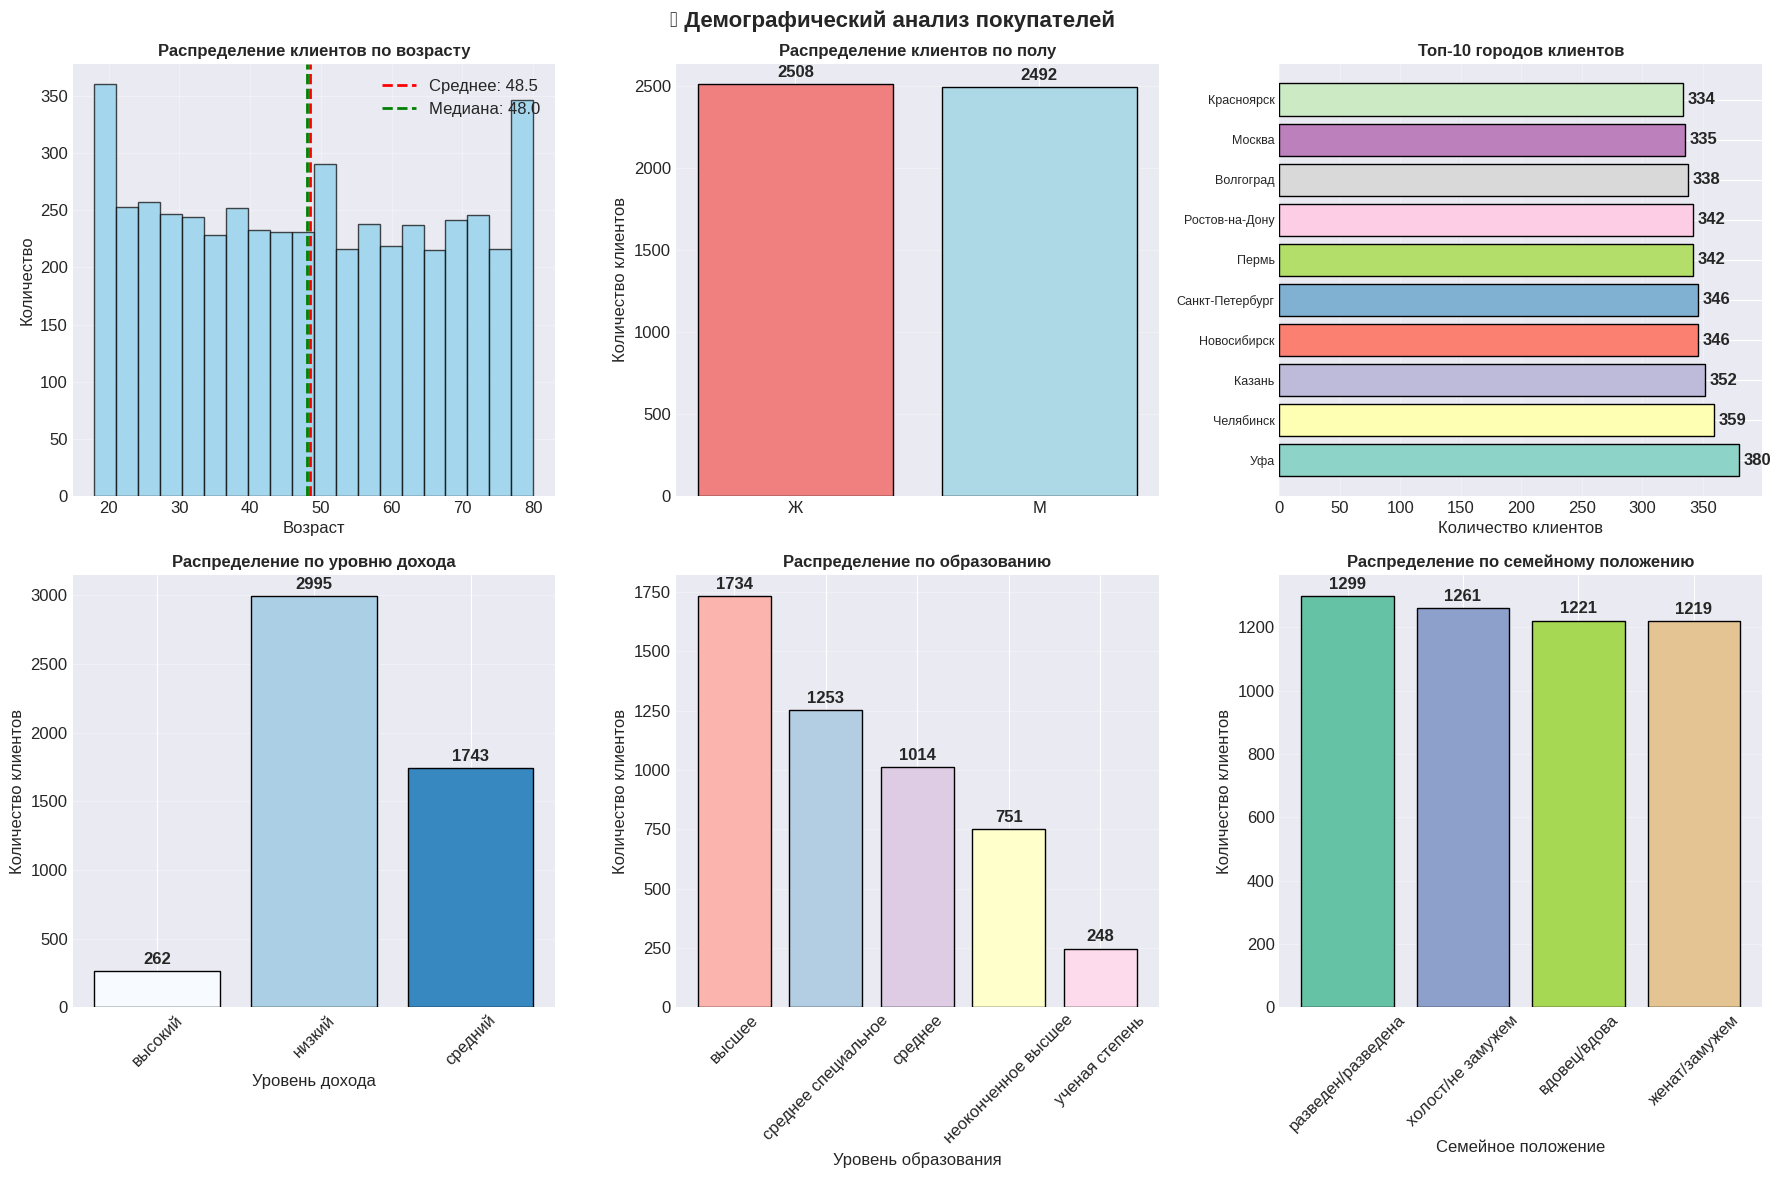


✅ Демографический анализ завершен
💾 График сохранен как 'customer_demographics.png'


In [ ]:
print("\n👥 Демографический анализ покупателей...")
print("-" * 30)

print("📈 Создание графиков демографического анализа...")

# Создаем графики для демографического анализа
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('👥 Демографический анализ покупателей', fontsize=16, fontweight='bold')

# 1. Распределение по возрасту
if 'age' in customers_df.columns:
    age_data = customers_df['age'].dropna()
    axes[0, 0].hist(age_data, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0, 0].axvline(x=age_data.mean(), color='red', linestyle='--',
                       linewidth=2, label=f'Среднее: {age_data.mean():.1f}')
    axes[0, 0].axvline(x=age_data.median(), color='green', linestyle='--',
                       linewidth=2, label=f'Медиана: {age_data.median():.1f}')
    axes[0, 0].set_title('Распределение клиентов по возрасту', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Возраст')
    axes[0, 0].set_ylabel('Количество')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Статистика возраста
    print(f"📊 Статистика возраста клиентов:")
    print(f"   • Средний возраст: {age_data.mean():.1f} лет")
    print(f"   • Медианный возраст: {age_data.median():.1f} лет")
    print(f"   • Мин. возраст: {age_data.min()} лет")
    print(f"   • Макс. возраст: {age_data.max()} лет")
else:
    axes[0, 0].text(0.5, 0.5, 'Нет данных о возрасте',
                    ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Распределение по возрасту')

# 2. Распределение по полу
if 'gender' in customers_df.columns:
    gender_counts = customers_df['gender'].value_counts()
    colors_gender = ['lightcoral', 'lightblue']
    bars = axes[0, 1].bar(gender_counts.index, gender_counts.values, color=colors_gender, edgecolor='black')
    axes[0, 1].set_title('Распределение клиентов по полу', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Количество клиентов')
    axes[0, 1].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, gender_counts.values):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + max(gender_counts.values)*0.01,
                       f'{value}', ha='center', va='bottom', fontweight='bold')

    print(f"📊 Распределение по полу:")
    total_gender = gender_counts.sum()
    for gender, count in gender_counts.items():
        percentage = (count / total_gender) * 100
        print(f"   • {gender}: {count} ({percentage:.1f}%)")
else:
    axes[0, 1].text(0.5, 0.5, 'Нет данных о поле',
                    ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Распределение по полу')

# 3. Топ-10 городов
if 'city' in customers_df.columns:
    top_cities = customers_df['city'].value_counts().head(10)
    colors_cities = plt.cm.Set3(np.arange(len(top_cities)) / len(top_cities))

    bars = axes[0, 2].barh(range(len(top_cities)), top_cities.values, color=colors_cities, edgecolor='black')
    axes[0, 2].set_yticks(range(len(top_cities)))
    axes[0, 2].set_yticklabels(top_cities.index, fontsize=9)
    axes[0, 2].set_title('Топ-10 городов клиентов', fontsize=12, fontweight='bold')
    axes[0, 2].set_xlabel('Количество клиентов')
    axes[0, 2].grid(True, alpha=0.3, axis='x')

    # Добавляем значения на столбцы
    for i, (bar, value) in enumerate(zip(bars, top_cities.values)):
        axes[0, 2].text(value + max(top_cities.values)*0.01, bar.get_y() + bar.get_height()/2,
                       f'{value}', ha='left', va='center', fontweight='bold')

    print(f"📊 Топ-5 городов:")
    for i, (city, count) in enumerate(top_cities.head(5).items(), 1):
        print(f"   {i}. {city}: {count} клиентов")
else:
    axes[0, 2].text(0.5, 0.5, 'Нет данных о городах',
                    ha='center', va='center', transform=axes[0, 2].transAxes)
    axes[0, 2].set_title('Топ-10 городов')

# 4. Распределение по уровню дохода
if 'income_level' in customers_df.columns:
    income_counts = customers_df['income_level'].value_counts().sort_index()
    colors_income = plt.cm.Blues(np.arange(len(income_counts)) / len(income_counts))

    bars = axes[1, 0].bar(income_counts.index, income_counts.values, color=colors_income, edgecolor='black')
    axes[1, 0].set_title('Распределение по уровню дохода', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Уровень дохода')
    axes[1, 0].set_ylabel('Количество клиентов')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, income_counts.values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + max(income_counts.values)*0.01,
                       f'{value}', ha='center', va='bottom', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'Нет данных о доходе',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Распределение по доходу')

# 5. Распределение по образованию
if 'education' in customers_df.columns:
    education_counts = customers_df['education'].value_counts()
    colors_education = plt.cm.Pastel1(np.arange(len(education_counts)) / len(education_counts))

    bars = axes[1, 1].bar(education_counts.index, education_counts.values, color=colors_education, edgecolor='black')
    axes[1, 1].set_title('Распределение по образованию', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Уровень образования')
    axes[1, 1].set_ylabel('Количество клиентов')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, education_counts.values):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + max(education_counts.values)*0.01,
                       f'{value}', ha='center', va='bottom', fontweight='bold')
else:
    axes[1, 1].text(0.5, 0.5, 'Нет данных об образовании',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Распределение по образованию')

# 6. Распределение по семейному положению
if 'marital_status' in customers_df.columns:
    marital_counts = customers_df['marital_status'].value_counts()
    colors_marital = plt.cm.Set2(np.arange(len(marital_counts)) / len(marital_counts))

    bars = axes[1, 2].bar(marital_counts.index, marital_counts.values, color=colors_marital, edgecolor='black')
    axes[1, 2].set_title('Распределение по семейному положению', fontsize=12, fontweight='bold')
    axes[1, 2].set_xlabel('Семейное положение')
    axes[1, 2].set_ylabel('Количество клиентов')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, marital_counts.values):
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2., height + max(marital_counts.values)*0.01,
                       f'{value}', ha='center', va='bottom', fontweight='bold')
else:
    axes[1, 2].text(0.5, 0.5, 'Нет данных о семейном положении',
                    ha='center', va='center', transform=axes[1, 2].transAxes)
    axes[1, 2].set_title('Распределение по семейному положению')

plt.tight_layout()
plt.savefig('customer_demographics.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Демографический анализ завершен")
print("💾 График сохранен как 'customer_demographics.png'")


📊 Анализ покупательской активности...
------------------------------
📈 Создание графиков анализа активности...
📊 Статистика покупок:
   • Средняя сумма покупок на клиента: 862,097 руб.
   • Медианная сумма: 601,523 руб.
   • Максимальная сумма: 8,278,858 руб.
   • Среднее количество покупок: 10.0
   • Медианное количество: 10
   • Максимальное количество: 25
   • Клиенты с 1 покупкой: 1 (0.0%)
📊 Средний чек по возрастным группам:
   • 18-24: 86,207 руб. (клиентов: 613.0)
   • 25-34: 87,069 руб. (клиентов: 818.0)
   • 35-44: 86,002 руб. (клиентов: 804.0)
   • 45-54: 84,899 руб. (клиентов: 728.0)
   • 55-64: 85,732 руб. (клиентов: 773.0)
   • 65+: 86,818 руб. (клиентов: 1264.0)
📊 Источники трафика:
   • рассылка: 916 клиентов (18.3%)
   • реклама в соцсетях: 864 клиентов (17.3%)
   • рекомендация друга: 831 клиентов (16.6%)
   • поисковик: 818 клиентов (16.4%)
   • прямой заход: 799 клиентов (16.0%)
   • рекламный баннер: 772 клиентов (15.4%)


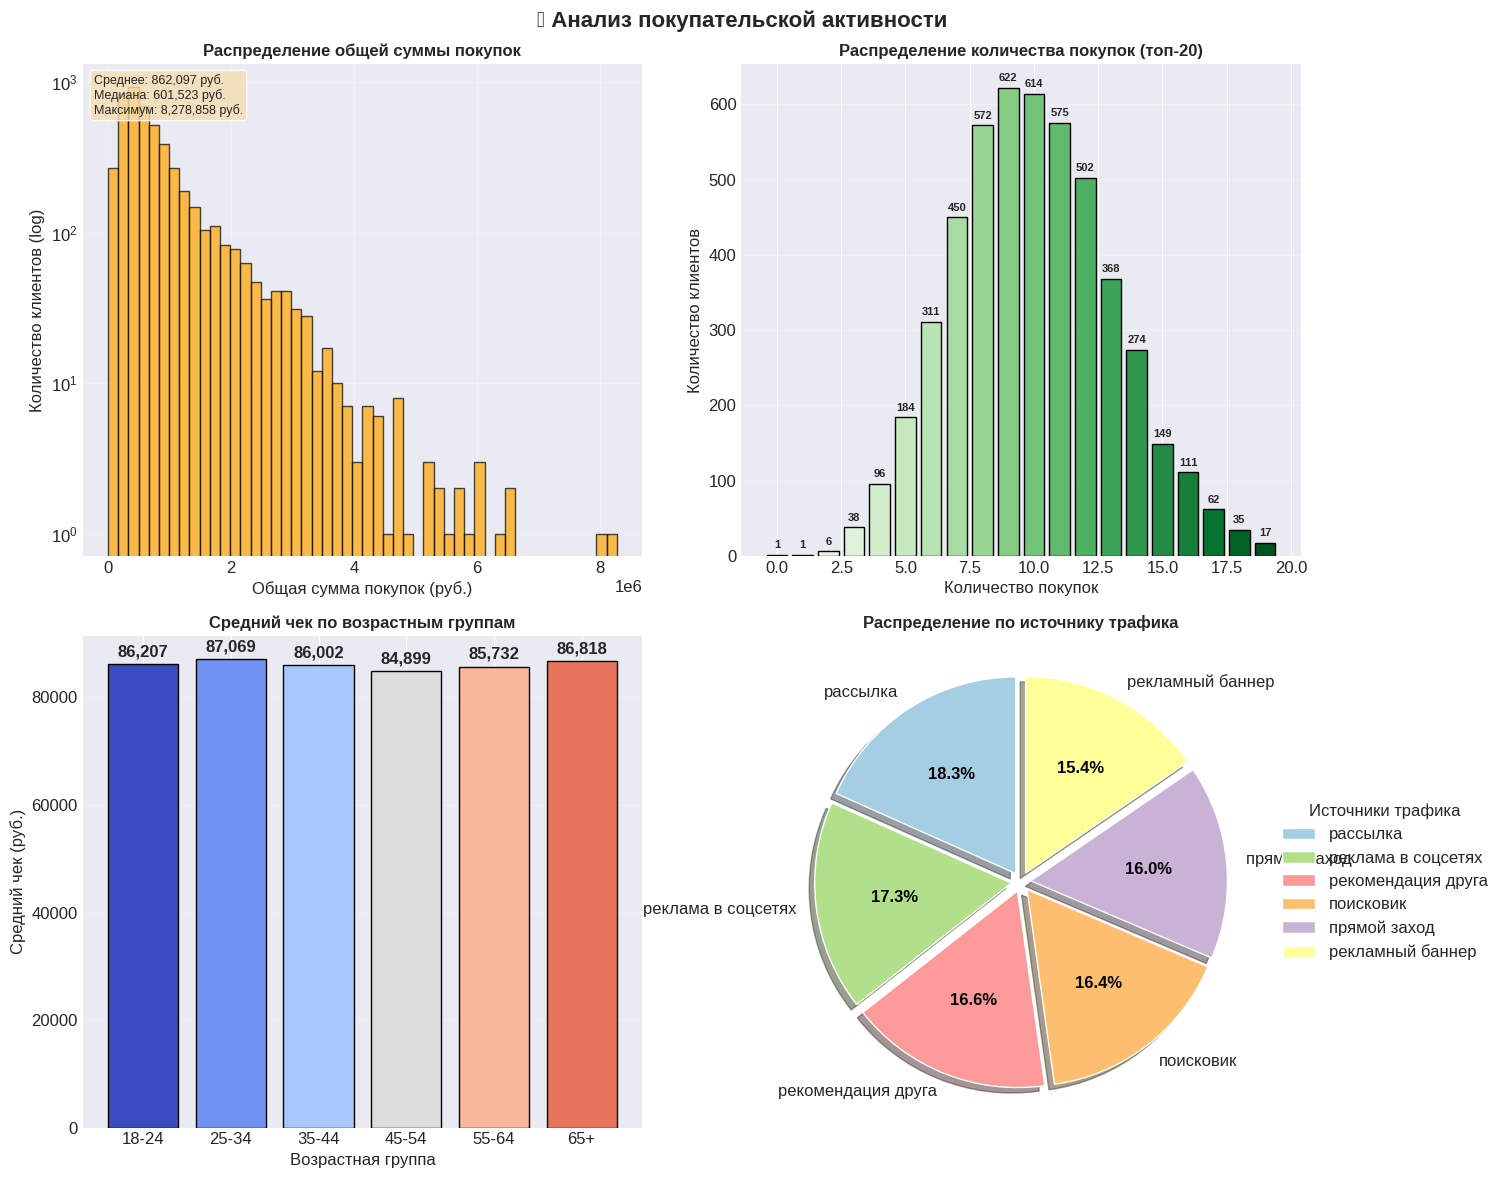


✅ Анализ покупательской активности завершен
💾 График сохранен как 'customer_activity.png'


In [ ]:
print("\n📊 Анализ покупательской активности...")
print("-" * 30)

print("📈 Создание графиков анализа активности...")

# Создаем графики для анализа активности
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Анализ покупательской активности', fontsize=16, fontweight='bold')

# 1. Распределение общей суммы покупок
if 'total_spent' in customers_df.columns:
    total_spent_data = customers_df['total_spent'].dropna()

    # Логарифмическая шкала для лучшей визуализации
    axes[0, 0].hist(total_spent_data, bins=50, edgecolor='black', alpha=0.7, color='orange', log=True)
    axes[0, 0].set_title('Распределение общей суммы покупок', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Общая сумма покупок (руб.)')
    axes[0, 0].set_ylabel('Количество клиентов (log)')
    axes[0, 0].grid(True, alpha=0.3)

    # Добавляем статистику
    axes[0, 0].text(0.02, 0.98,
                   f'Среднее: {total_spent_data.mean():,.0f} руб.\n'
                   f'Медиана: {total_spent_data.median():,.0f} руб.\n'
                   f'Максимум: {total_spent_data.max():,.0f} руб.',
                   transform=axes[0, 0].transAxes, fontsize=9,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    print(f"📊 Статистика покупок:")
    print(f"   • Средняя сумма покупок на клиента: {total_spent_data.mean():,.0f} руб.")
    print(f"   • Медианная сумма: {total_spent_data.median():,.0f} руб.")
    print(f"   • Максимальная сумма: {total_spent_data.max():,.0f} руб.")
else:
    axes[0, 0].text(0.5, 0.5, 'Нет данных о покупках',
                    ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Распределение суммы покупок')

# 2. Распределение количества покупок
if 'purchase_count' in customers_df.columns:
    purchase_counts = customers_df['purchase_count'].dropna()
    purchase_counts_dist = purchase_counts.value_counts().sort_index()

    # Берем топ-20 для лучшей читаемости
    top_20 = purchase_counts_dist.head(20)

    colors_counts = plt.cm.Greens(np.arange(len(top_20)) / len(top_20))
    bars = axes[0, 1].bar(top_20.index, top_20.values, color=colors_counts, edgecolor='black')
    axes[0, 1].set_title('Распределение количества покупок (топ-20)', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Количество покупок')
    axes[0, 1].set_ylabel('Количество клиентов')
    axes[0, 1].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, top_20.values):
        if value > 0:  # Добавляем только для ненулевых значений
            height = bar.get_height()
            axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + max(top_20.values)*0.01,
                           f'{value}', ha='center', va='bottom', fontsize=8, fontweight='bold')

    # Статистика
    print(f"   • Среднее количество покупок: {purchase_counts.mean():.1f}")
    print(f"   • Медианное количество: {purchase_counts.median():.0f}")
    print(f"   • Максимальное количество: {purchase_counts.max():.0f}")

    # Анализ частоты покупок
    purchase_freq_categories = pd.cut(purchase_counts,
                                      bins=[0, 1, 3, 10, float('inf')],
                                      labels=['1 покупка', '2-3 покупки', '4-10 покупок', '10+ покупок'])
    freq_stats = purchase_freq_categories.value_counts()
    print(f"   • Клиенты с 1 покупкой: {freq_stats.get('1 покупка', 0)} ({freq_stats.get('1 покупка', 0)/len(purchase_counts)*100:.1f}%)")
else:
    axes[0, 1].text(0.5, 0.5, 'Нет данных о покупках',
                    ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Распределение количества покупок')

# 3. Средний чек по возрастным группам
if all(col in customers_df.columns for col in ['age_group', 'total_spent', 'purchase_count']):
    # Создаем возрастные группы, если их нет
    if 'age_group' not in customers_df.columns and 'age' in customers_df.columns:
        age_bins = [18, 25, 35, 45, 55, 65, 80]
        age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
        customers_df['age_group'] = pd.cut(customers_df['age'], bins=age_bins, labels=age_labels, right=False)

    # Рассчитываем средний чек
    customer_stats = customers_df.groupby('age_group').agg({
        'total_spent': 'sum',
        'purchase_count': 'sum',
        'customer_id': 'count'
    }).rename(columns={'customer_id': 'customer_count'})

    customer_stats['avg_basket'] = customer_stats['total_spent'] / customer_stats['purchase_count']

    colors_age = plt.cm.coolwarm(np.arange(len(customer_stats)) / len(customer_stats))
    bars = axes[1, 0].bar(customer_stats.index, customer_stats['avg_basket'], color=colors_age, edgecolor='black')
    axes[1, 0].set_title('Средний чек по возрастным группам', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Возрастная группа')
    axes[1, 0].set_ylabel('Средний чек (руб.)')
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, customer_stats['avg_basket']):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + max(customer_stats['avg_basket'])*0.01,
                       f'{value:,.0f}', ha='center', va='bottom', fontweight='bold')

    print(f"📊 Средний чек по возрастным группам:")
    for age_group, row in customer_stats.iterrows():
        print(f"   • {age_group}: {row['avg_basket']:,.0f} руб. (клиентов: {row['customer_count']})")
else:
    axes[1, 0].text(0.5, 0.5, 'Нет данных для анализа',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Средний чек по возрастам')

# 4. Распределение по источнику трафика
if 'traffic_source' in customers_df.columns:
    traffic_counts = customers_df['traffic_source'].value_counts()

    colors_traffic = plt.cm.Paired(np.arange(len(traffic_counts)) / len(traffic_counts))
    wedges, texts, autotexts = axes[1, 1].pie(traffic_counts.values,
                                              labels=traffic_counts.index,
                                              colors=colors_traffic,
                                              autopct='%1.1f%%',
                                              startangle=90,
                                              explode=[0.05] * len(traffic_counts),
                                              shadow=True)

    # Улучшаем читаемость текста
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')

    axes[1, 1].set_title('Распределение по источнику трафика', fontsize=12, fontweight='bold')

    # Добавляем легенду
    axes[1, 1].legend(wedges, traffic_counts.index,
                     title="Источники трафика",
                     loc="center left",
                     bbox_to_anchor=(1, 0, 0.5, 1))

    print(f"📊 Источники трафика:")
    total_traffic = traffic_counts.sum()
    for source, count in traffic_counts.items():
        percentage = (count / total_traffic) * 100
        print(f"   • {source}: {count} клиентов ({percentage:.1f}%)")
else:
    axes[1, 1].text(0.5, 0.5, 'Нет данных об источниках',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Источники трафика')

plt.tight_layout()
plt.savefig('customer_activity.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Анализ покупательской активности завершен")
print("💾 График сохранен как 'customer_activity.png'")


🏷️ Анализ товарных паттернов покупок...
------------------------------
📈 Анализ продаж по товарам...
📊 Топ-5 товаров по количеству:
   1. Товар 221...: 671.0 шт. (2,463,557 руб.)
   2. Товар 338...: 631.0 шт. (1,331,556 руб.)
   3. Товар 55...: 625.0 шт. (2,678,696 руб.)
   4. Товар 382...: 619.0 шт. (1,196,232 руб.)
   5. Товар 260...: 618.0 шт. (2,533,014 руб.)
📊 Топ-5 товаров по выручке:
   1. Товар 230...: 217,405,177 руб. (297.0 шт.)
   2. Товар 176...: 177,301,993 руб. (312.0 шт.)
   3. Товар 48...: 155,015,897 руб. (328.0 шт.)
   4. Товар 265...: 132,729,146 руб. (326.0 шт.)
   5. Товар 337...: 129,873,807 руб. (378.0 шт.)
📊 Выручка по категориям:
   1. Ювелирные изделия: 1,827,865,448 руб. (42.4%)
   2. Мебель: 609,977,402 руб. (14.2%)
   3. Бытовая техника: 381,677,907 руб. (8.9%)
   4. Электроника: 371,373,530 руб. (8.6%)
   5. Медицинские товары: 118,023,486 руб. (2.7%)
📊 Методы оплаты:
   • карта: 35113 транзакций (70.2%)
   • наличные: 9885 транзакций (19.8%)
   • онлайн-

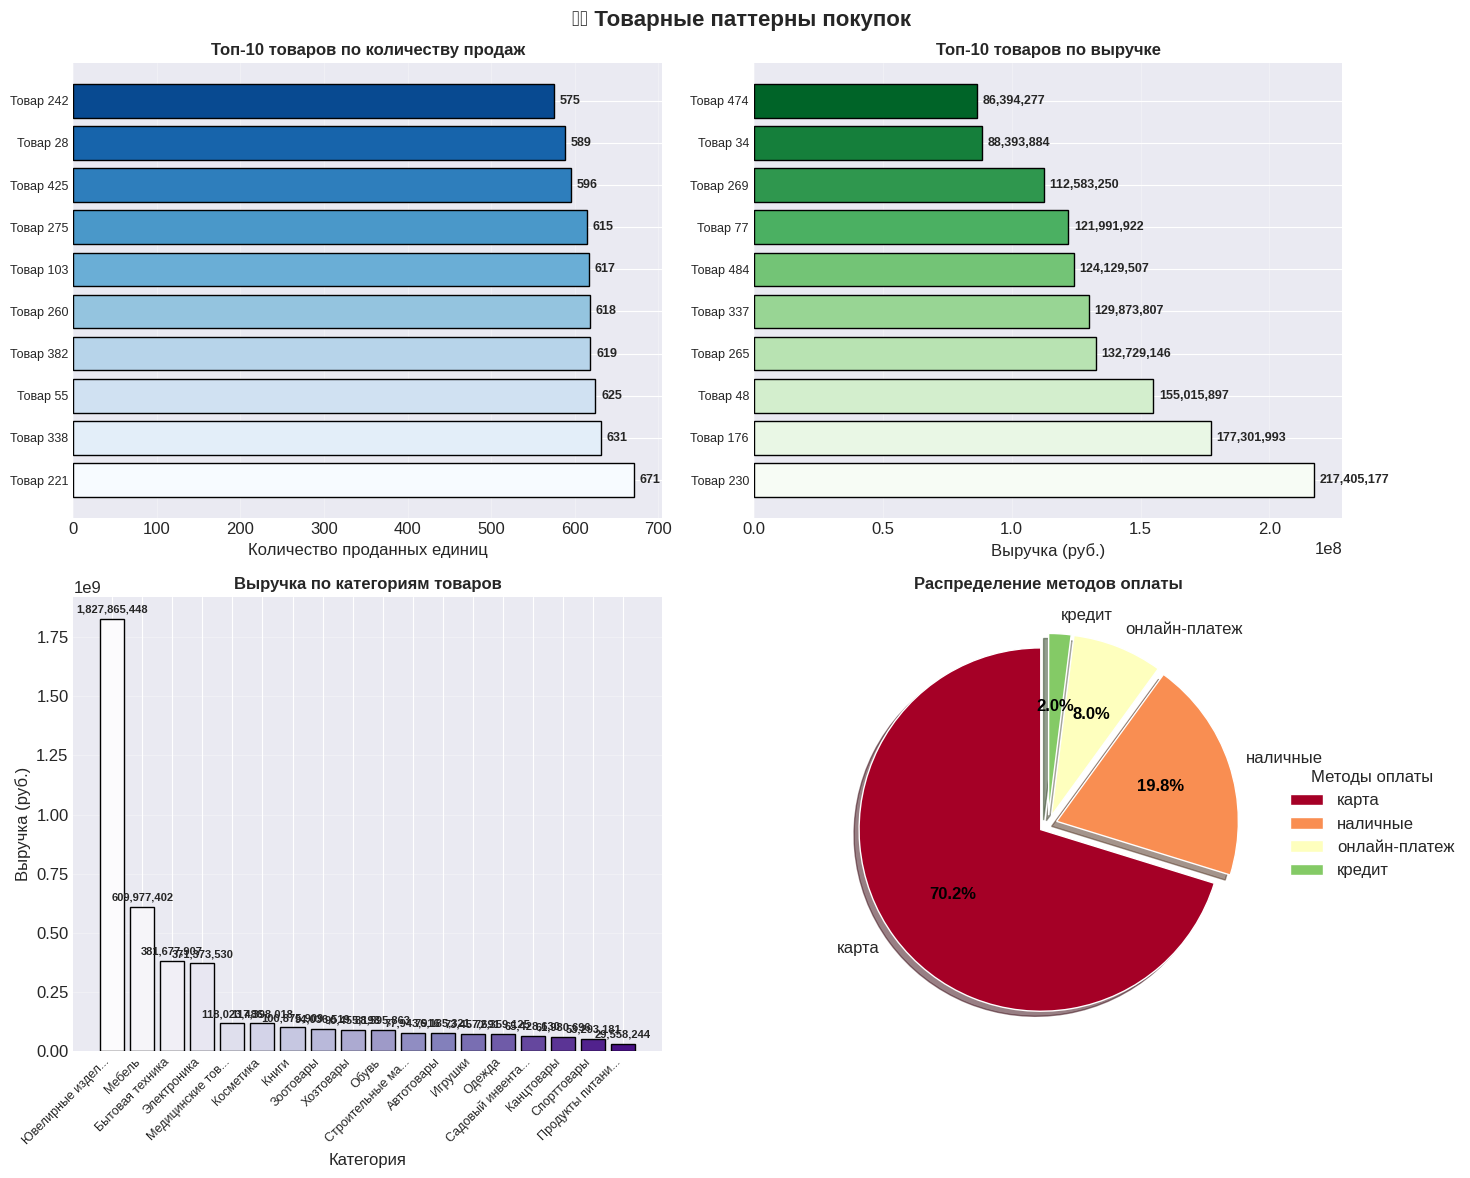


✅ Анализ товарных паттернов завершен
💾 График сохранен как 'purchase_patterns_products.png'


In [ ]:
print("\n🏷️ Анализ товарных паттернов покупок...")
print("-" * 30)

print("📈 Анализ продаж по товарам...")

# Создаем графики для товарных паттернов
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🏷️ Товарные паттерны покупок', fontsize=16, fontweight='bold')

# 1. Топ-10 самых продаваемых товаров по количеству
if all(col in sales_full.columns for col in ['product_name', 'quantity']):
    top_products_qty = sales_full.groupby('product_name').agg({
        'quantity': 'sum',
        'total_amount': 'sum'
    }).nlargest(10, 'quantity')

    colors_products_qty = plt.cm.Blues(np.arange(len(top_products_qty)) / len(top_products_qty))

    # Обрезаем длинные названия товаров
    short_names = [name[:30] + '...' if len(name) > 30 else name for name in top_products_qty.index]

    bars = axes[0, 0].barh(range(len(top_products_qty)), top_products_qty['quantity'],
                           color=colors_products_qty, edgecolor='black')
    axes[0, 0].set_yticks(range(len(top_products_qty)))
    axes[0, 0].set_yticklabels(short_names, fontsize=9)
    axes[0, 0].set_title('Топ-10 товаров по количеству продаж', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Количество проданных единиц')
    axes[0, 0].grid(True, alpha=0.3, axis='x')

    # Добавляем значения на столбцы
    for i, (bar, value) in enumerate(zip(bars, top_products_qty['quantity'])):
        axes[0, 0].text(value + max(top_products_qty['quantity'])*0.01,
                       bar.get_y() + bar.get_height()/2,
                       f'{value:,}', ha='left', va='center', fontweight='bold', fontsize=9)

    print(f"📊 Топ-5 товаров по количеству:")
    for i, (product, row) in enumerate(top_products_qty.head(5).iterrows(), 1):
        print(f"   {i}. {product[:40]}...: {row['quantity']:,} шт. ({row['total_amount']:,.0f} руб.)")
else:
    axes[0, 0].text(0.5, 0.5, 'Нет данных о товарах',
                    ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Топ товаров по количеству')

# 2. Топ-10 самых прибыльных товаров
if all(col in sales_full.columns for col in ['product_name', 'total_amount']):
    top_products_revenue = sales_full.groupby('product_name').agg({
        'total_amount': 'sum',
        'quantity': 'sum'
    }).nlargest(10, 'total_amount')

    colors_products_rev = plt.cm.Greens(np.arange(len(top_products_revenue)) / len(top_products_revenue))

    # Обрезаем длинные названия товаров
    short_names_rev = [name[:30] + '...' if len(name) > 30 else name for name in top_products_revenue.index]

    bars = axes[0, 1].barh(range(len(top_products_revenue)), top_products_revenue['total_amount'],
                           color=colors_products_rev, edgecolor='black')
    axes[0, 1].set_yticks(range(len(top_products_revenue)))
    axes[0, 1].set_yticklabels(short_names_rev, fontsize=9)
    axes[0, 1].set_title('Топ-10 товаров по выручке', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Выручка (руб.)')
    axes[0, 1].grid(True, alpha=0.3, axis='x')

    # Добавляем значения на столбцы
    for i, (bar, value) in enumerate(zip(bars, top_products_revenue['total_amount'])):
        axes[0, 1].text(value + max(top_products_revenue['total_amount'])*0.01,
                       bar.get_y() + bar.get_height()/2,
                       f'{value:,.0f}', ha='left', va='center', fontweight='bold', fontsize=9)

    print(f"📊 Топ-5 товаров по выручке:")
    for i, (product, row) in enumerate(top_products_revenue.head(5).iterrows(), 1):
        print(f"   {i}. {product[:40]}...: {row['total_amount']:,.0f} руб. ({row['quantity']:,} шт.)")
else:
    axes[0, 1].text(0.5, 0.5, 'Нет данных о товарах',
                    ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Топ товаров по выручке')

# 3. Выручка по категориям товаров
if 'category' in sales_full.columns:
    category_sales = sales_full.groupby('category').agg({
        'total_amount': 'sum',
        'quantity': 'sum'
    }).sort_values('total_amount', ascending=False)

    colors_category = plt.cm.Purples(np.arange(len(category_sales)) / len(category_sales))

    bars = axes[1, 0].bar(range(len(category_sales)), category_sales['total_amount'],
                          color=colors_category, edgecolor='black')
    axes[1, 0].set_xticks(range(len(category_sales)))

    # Обрезаем длинные названия категорий
    short_categories = [cat[:15] + '...' if len(cat) > 15 else cat for cat in category_sales.index]

    axes[1, 0].set_xticklabels(short_categories, rotation=45, ha='right', fontsize=9)
    axes[1, 0].set_title('Выручка по категориям товаров', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Категория')
    axes[1, 0].set_ylabel('Выручка (руб.)')
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, category_sales['total_amount']):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + max(category_sales['total_amount'])*0.01,
                       f'{value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

    print(f"📊 Выручка по категориям:")
    total_category_revenue = category_sales['total_amount'].sum()
    for i, (category, row) in enumerate(category_sales.head(5).iterrows(), 1):
        percentage = (row['total_amount'] / total_category_revenue) * 100
        print(f"   {i}. {category}: {row['total_amount']:,.0f} руб. ({percentage:.1f}%)")
else:
    axes[1, 0].text(0.5, 0.5, 'Нет данных о категориях',
                    ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Выручка по категориям')

# 4. Распределение методов оплаты
if 'payment_method' in sales_df.columns:
    payment_distribution = sales_df['payment_method'].value_counts()

    colors_payment = plt.cm.RdYlGn(np.arange(len(payment_distribution)) / len(payment_distribution))
    wedges, texts, autotexts = axes[1, 1].pie(payment_distribution.values,
                                              labels=payment_distribution.index,
                                              colors=colors_payment,
                                              autopct='%1.1f%%',
                                              startangle=90,
                                              explode=[0.05] * len(payment_distribution),
                                              shadow=True)

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')

    axes[1, 1].set_title('Распределение методов оплаты', fontsize=12, fontweight='bold')

    # Добавляем легенду
    axes[1, 1].legend(wedges, payment_distribution.index,
                     title="Методы оплаты",
                     loc="center left",
                     bbox_to_anchor=(1, 0, 0.5, 1))

    print(f"📊 Методы оплаты:")
    total_payments = payment_distribution.sum()
    for method, count in payment_distribution.items():
        percentage = (count / total_payments) * 100
        print(f"   • {method}: {count} транзакций ({percentage:.1f}%)")
else:
    axes[1, 1].text(0.5, 0.5, 'Нет данных об оплате',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Методы оплаты')

plt.tight_layout()
plt.savefig('purchase_patterns_products.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Анализ товарных паттернов завершен")
print("💾 График сохранен как 'purchase_patterns_products.png'")


🎯 RFM-анализ и сегментация клиентов...
------------------------------
🔍 Выполнение RFM-анализа...
   Текущая дата для анализа: 2025-11-30
   Проанализировано клиентов: 4999
   Средний recency: 32.8 дней
   Средняя frequency: 10.0
   Средний monetary: 862269.7 руб.
   • Разбиение на квартили...
📊 Визуализация RFM-сегментов...
📊 Распределение по сегментам:
   • Обычные: 2651 клиентов (53.0%)
   • Потерянные клиенты: 1233 клиентов (24.7%)
   • VIP клиенты: 614 клиентов (12.3%)
   • Лояльные клиенты: 352 клиентов (7.0%)
   • Чемпионы: 149 клиентов (3.0%)
📊 Средние показатели по сегментам:
   • VIP клиенты: Recency=20 дн., Frequency=10.3, Monetary=1,924,524 руб.
   • Лояльные клиенты: Recency=7 дн., Frequency=13.9, Monetary=1,582,077 руб.
   • Обычные: Recency=17 дн., Frequency=9.7, Monetary=504,733 руб.
   • Потерянные клиенты: Recency=84 дн., Frequency=8.7, Monetary=745,985 руб.
   • Чемпионы: Recency=4 дн., Frequency=15.1, Monetary=2,107,987 руб.


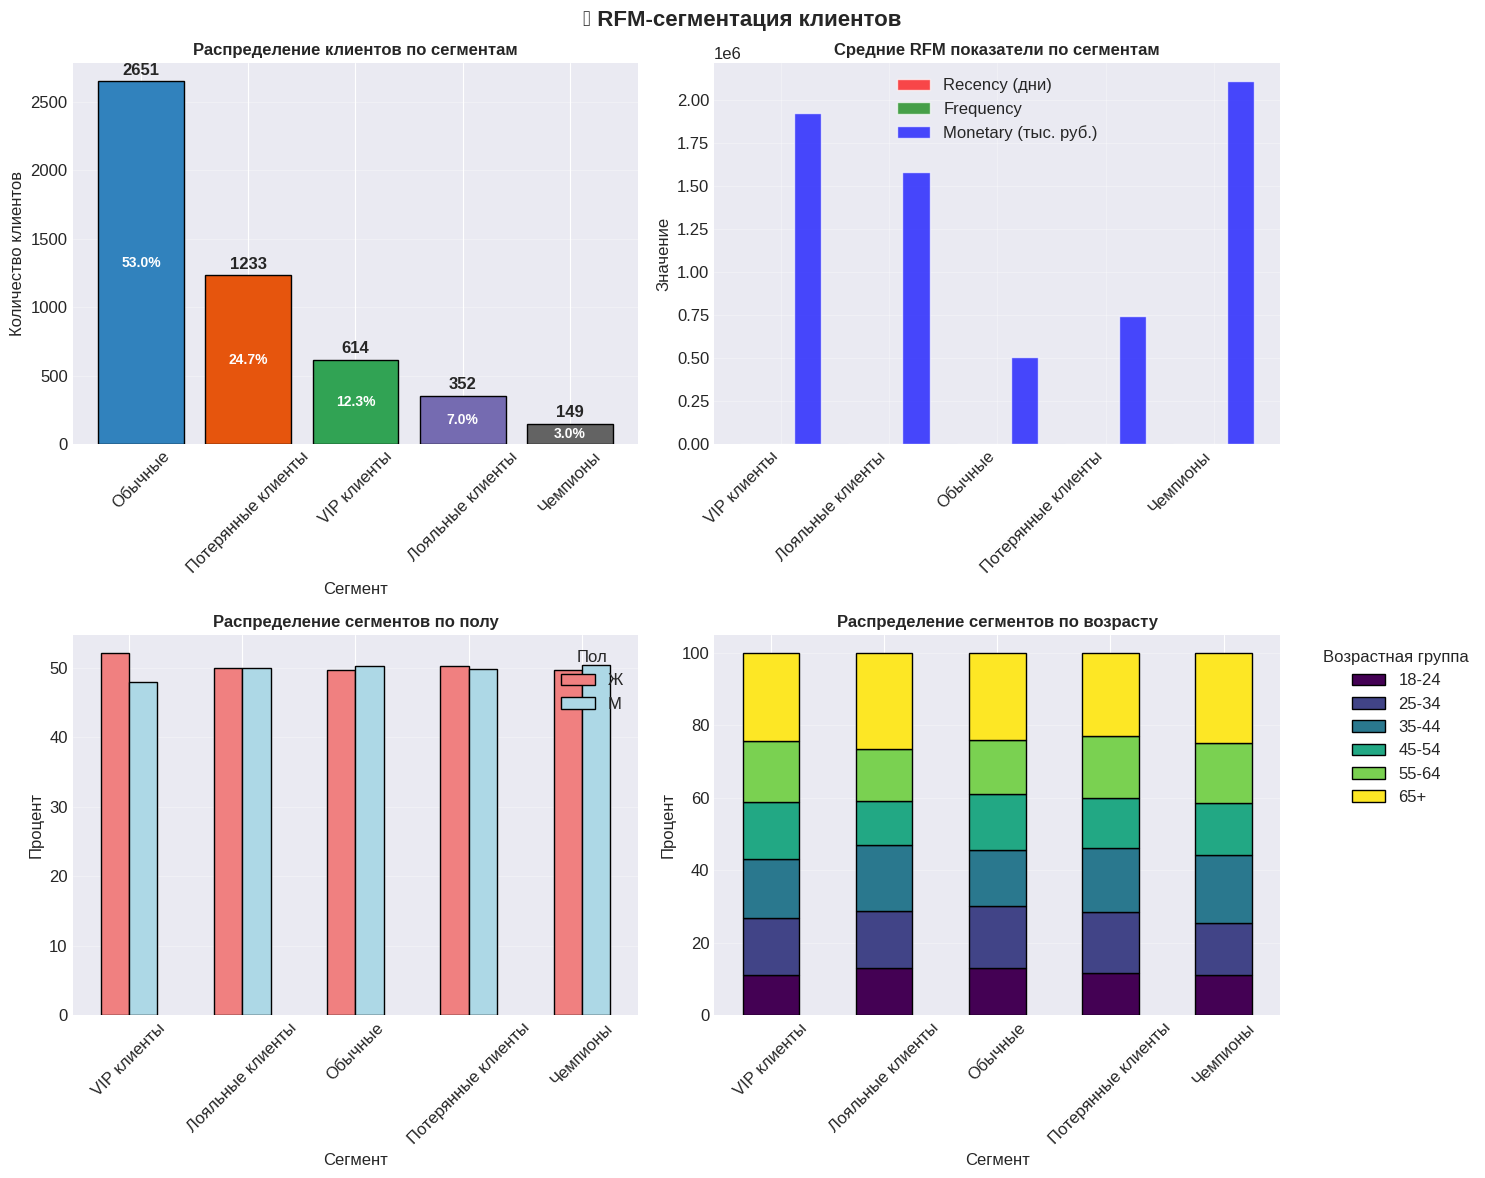


✅ RFM-анализ завершен
💾 График сохранен как 'customer_segmentation_rfm.png'
💾 Данные RFM-анализа сохранены в 'rfm_analysis.csv'


In [ ]:
print("\n🎯 RFM-анализ и сегментация клиентов...")
print("-" * 30)

# Проверяем наличие данных для RFM-анализа
if not sales_df.empty and not customers_df.empty and 'customer_id' in sales_df.columns:
    print("🔍 Выполнение RFM-анализа...")

    # Получаем текущую дату (максимальная дата в продажах)
    current_date = sales_df['sale_date'].max()
    print(f"   Текущая дата для анализа: {current_date.date()}")

    # Создаем RFM таблицу
    rfm = sales_df.groupby('customer_id').agg({
        'sale_date': lambda x: (current_date - x.max()).days,  # Recency (дни с последней покупки)
        'sale_id': 'count',                                   # Frequency (частота покупок)
        'total_amount': 'sum'                                 # Monetary (денежная ценность)
    }).rename(columns={
        'sale_date': 'recency',
        'sale_id': 'frequency',
        'total_amount': 'monetary'
    })

    print(f"   Проанализировано клиентов: {len(rfm)}")
    print(f"   Средний recency: {rfm['recency'].mean():.1f} дней")
    print(f"   Средняя frequency: {rfm['frequency'].mean():.1f}")
    print(f"   Средний monetary: {rfm['monetary'].mean():.1f} руб.")

    # Добавляем информацию о клиентах
    rfm = rfm.merge(customers_df[['customer_id', 'age', 'gender', 'city']],
                    on='customer_id', how='left')

    # Разбиваем на квартили для RFM
    print("   • Разбиение на квартили...")
    rfm['R_quartile'] = pd.qcut(rfm['recency'], 4, labels=['4', '3', '2', '1'])  # 1 - лучший (недавно покупали)
    rfm['F_quartile'] = pd.qcut(rfm['frequency'], 4, labels=['1', '2', '3', '4'])  # 4 - лучший (часто покупают)
    rfm['M_quartile'] = pd.qcut(rfm['monetary'], 4, labels=['1', '2', '3', '4'])  # 4 - лучший (много тратят)

    # Создаем RFM-сегмент
    rfm['RFM_Score'] = rfm['R_quartile'].astype(str) + rfm['F_quartile'].astype(str) + rfm['M_quartile'].astype(str)

    # Определяем сегменты на основе RFM-оценки
    def assign_rfm_segment(row):
        if row['RFM_Score'] == '444':
            return 'Чемпионы'
        elif row['RFM_Score'] in ['443', '434', '344', '444']:
            return 'Лояльные клиенты'
        elif row['RFM_Score'].startswith('1'):
            return 'Потерянные клиенты'
        elif row['recency'] > 180:
            return 'Спящие'
        elif row['frequency'] == 1:
            return 'Новые'
        elif row['monetary'] > rfm['monetary'].quantile(0.75):
            return 'VIP клиенты'
        else:
            return 'Обычные'

    rfm['segment'] = rfm.apply(assign_rfm_segment, axis=1)

    # Визуализация RFM-сегментов
    print("📊 Визуализация RFM-сегментов...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('🎯 RFM-сегментация клиентов', fontsize=16, fontweight='bold')

    # 1. Распределение сегментов
    segment_counts = rfm['segment'].value_counts()
    colors_segment = plt.cm.tab20c(np.arange(len(segment_counts)) / len(segment_counts))

    bars = axes[0, 0].bar(segment_counts.index, segment_counts.values, color=colors_segment, edgecolor='black')
    axes[0, 0].set_title('Распределение клиентов по сегментам', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Сегмент')
    axes[0, 0].set_ylabel('Количество клиентов')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, segment_counts.values):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + max(segment_counts.values)*0.01,
                       f'{value}', ha='center', va='bottom', fontweight='bold')

    # Добавляем проценты
    total_clients = len(rfm)
    for i, (segment, count) in enumerate(segment_counts.items()):
        percentage = (count / total_clients) * 100
        axes[0, 0].text(i, count/2, f'{percentage:.1f}%',
                       ha='center', va='center', color='white', fontweight='bold', fontsize=10)

    print(f"📊 Распределение по сегментам:")
    for segment, count in segment_counts.items():
        percentage = (count / total_clients) * 100
        print(f"   • {segment}: {count} клиентов ({percentage:.1f}%)")

    # 2. Средние показатели по сегментам
    segment_stats = rfm.groupby('segment').agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': 'mean'
    }).round(2)

    x = np.arange(len(segment_stats))
    width = 0.25

    axes[0, 1].bar(x - width, segment_stats['recency'], width, label='Recency (дни)', color='red', alpha=0.7)
    axes[0, 1].bar(x, segment_stats['frequency'], width, label='Frequency', color='green', alpha=0.7)
    axes[0, 1].bar(x + width, segment_stats['monetary'], width, label='Monetary (тыс. руб.)', color='blue', alpha=0.7)

    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(segment_stats.index, rotation=45, ha='right')
    axes[0, 1].set_title('Средние RFM показатели по сегментам', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Значение')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    print(f"📊 Средние показатели по сегментам:")
    for segment, row in segment_stats.iterrows():
        print(f"   • {segment}: Recency={row['recency']:.0f} дн., Frequency={row['frequency']:.1f}, Monetary={row['monetary']:,.0f} руб.")

    # 3. Распределение сегментов по полу
    if 'gender' in rfm.columns and not rfm['gender'].isnull().all():
        gender_segment = pd.crosstab(rfm['segment'], rfm['gender'], normalize='index') * 100

        gender_segment.plot(kind='bar', ax=axes[1, 0], color=['lightcoral', 'lightblue'], edgecolor='black')
        axes[1, 0].set_title('Распределение сегментов по полу', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Сегмент')
        axes[1, 0].set_ylabel('Процент')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].legend(title='Пол', loc='upper right')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
    else:
        axes[1, 0].text(0.5, 0.5, 'Нет данных о поле',
                        ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Распределение по полу')

    # 4. Распределение сегментов по возрасту
    if 'age' in rfm.columns and not rfm['age'].isnull().all():
        # Создаем возрастные группы
        age_bins = [18, 25, 35, 45, 55, 65, 80]
        age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
        rfm['age_group'] = pd.cut(rfm['age'], bins=age_bins, labels=age_labels, right=False)

        age_segment = pd.crosstab(rfm['segment'], rfm['age_group'], normalize='index') * 100

        colors_age = plt.cm.viridis(np.linspace(0, 1, len(age_labels)))
        age_segment.plot(kind='bar', ax=axes[1, 1], stacked=True, color=colors_age, edgecolor='black')
        axes[1, 1].set_title('Распределение сегментов по возрасту', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Сегмент')
        axes[1, 1].set_ylabel('Процент')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].legend(title='Возрастная группа', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1, 1].grid(True, alpha=0.3, axis='y')
    else:
        axes[1, 1].text(0.5, 0.5, 'Нет данных о возрасте',
                        ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Распределение по возрасту')

    plt.tight_layout()
    plt.savefig('customer_segmentation_rfm.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("\n✅ RFM-анализ завершен")
    print("💾 График сохранен как 'customer_segmentation_rfm.png'")

    # Сохраняем результаты RFM-анализа
    rfm.to_csv('rfm_analysis.csv', index=False, encoding='utf-8')
    print("💾 Данные RFM-анализа сохранены в 'rfm_analysis.csv'")

else:
    print("⚠️ Недостаточно данных для RFM-анализа")
    print("   Требуются данные о продажах с customer_id и информацией о клиентах")


🔍 Кластеризация клиентов методом K-means...
------------------------------
🔧 Подготовка данных для кластеризации...
   Данные для кластеризации: 4999 клиентов
   Переменные: recency, frequency, monetary
   ✅ Данные нормализованы
   ✅ PCA выполнено: объяснено 80.1% дисперсии
   ✅ Кластеризация K-means выполнена
📊 Визуализация кластеров...


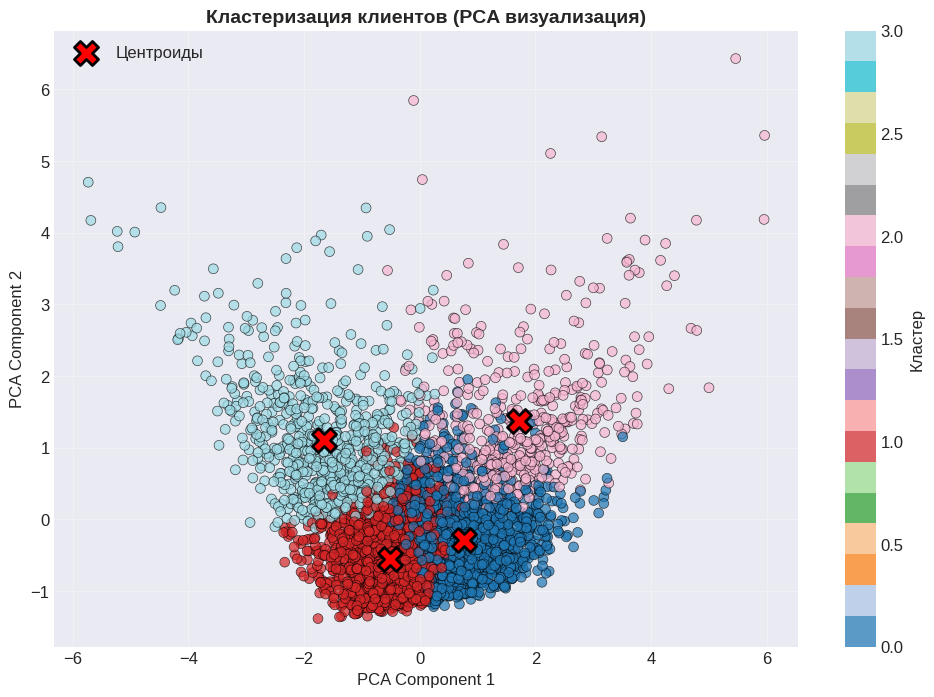


📊 Характеристики кластеров клиентов:
--------------------------------------------------

🔵 Кластер 0:
   • Количество клиентов: 1759 (35.2%)
   • Средний recency: 19.2 дней
   • Средняя frequency: 12.8
   • Средний monetary: 832581.3 руб.
   • Тип: Лояльные активные клиенты

🔵 Кластер 1:
   • Количество клиентов: 1950 (39.0%)
   • Средний recency: 21.2 дней
   • Средняя frequency: 8.0
   • Средний monetary: 510993.8 руб.
   • Тип: Лояльные активные клиенты

🔵 Кластер 2:
   • Количество клиентов: 524 (10.5%)
   • Средний recency: 23.9 дней
   • Средняя frequency: 11.5
   • Средний monetary: 2734147.3 руб.
   • Тип: Лояльные активные клиенты

🔵 Кластер 3:
   • Количество клиентов: 766 (15.3%)
   • Средний recency: 100.1 дней
   • Средняя frequency: 7.7
   • Средний monetary: 544183.3 руб.
   • Тип: Спящие/Потерянные клиенты


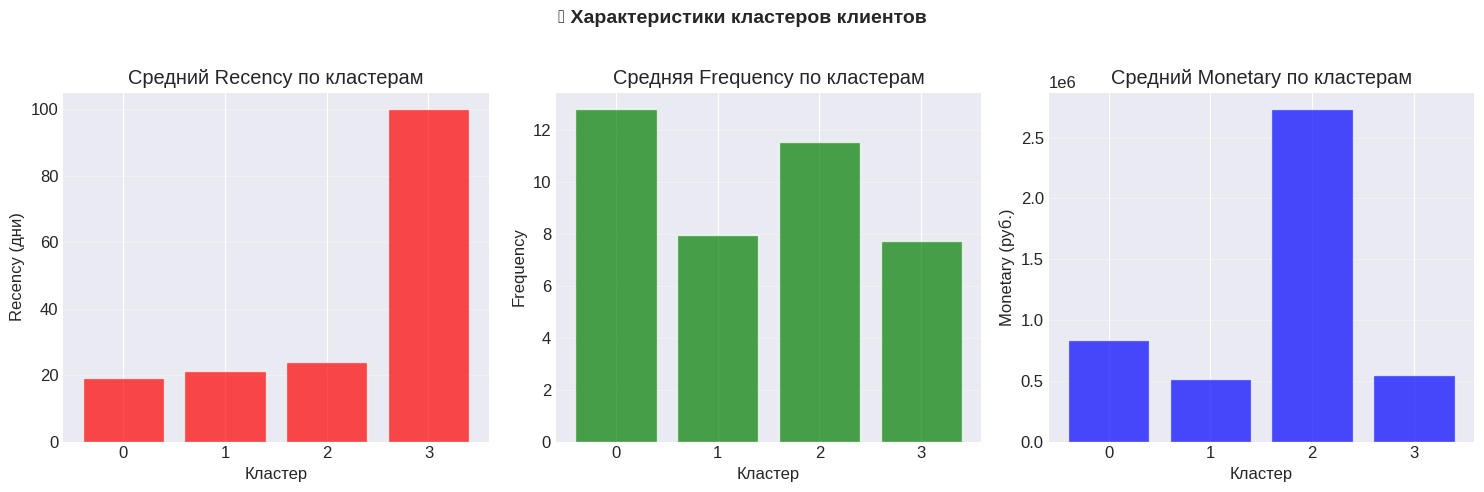


✅ Кластеризация завершена
💾 Графики сохранены как 'customer_clustering.png' и 'cluster_characteristics.png'
💾 Данные кластеризации сохранены в 'customer_clusters.csv'


In [ ]:
print("\n🔍 Кластеризация клиентов методом K-means...")
print("-" * 30)

# Проверяем наличие данных для кластеризации
if 'rfm' in locals() and len(rfm) > 10:
    print("🔧 Подготовка данных для кластеризации...")

    # Подготовка данных для кластеризации
    clustering_data = rfm[['recency', 'frequency', 'monetary']].dropna()

    if len(clustering_data) > 10:
        print(f"   Данные для кластеризации: {len(clustering_data)} клиентов")
        print(f"   Переменные: recency, frequency, monetary")

        # Нормализация данных
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(clustering_data)
        print("   ✅ Данные нормализованы")

        # Применение PCA для визуализации
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_data)
        print(f"   ✅ PCA выполнено: объяснено {pca.explained_variance_ratio_.sum()*100:.1f}% дисперсии")

        # Кластеризация K-means
        kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(scaled_data)
        print("   ✅ Кластеризация K-means выполнена")

        # Визуализация кластеров
        print("📊 Визуализация кластеров...")
        plt.figure(figsize=(12, 8))

        # Создаем цветовую карту для кластеров
        colors_cluster = plt.cm.tab20(np.linspace(0, 1, len(np.unique(clusters))))

        scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                             c=clusters, cmap='tab20', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
        plt.colorbar(scatter, label='Кластер')
        plt.title('Кластеризация клиентов (PCA визуализация)', fontsize=14, fontweight='bold')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.grid(True, alpha=0.3)

        # Добавляем центроиды
        centers_pca = pca.transform(kmeans.cluster_centers_)
        plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red',
                   s=300, marker='X', label='Центроиды', edgecolors='black', linewidth=2)
        plt.legend()

        plt.savefig('customer_clustering.png', dpi=150, bbox_inches='tight')
        plt.show()

        # Анализ характеристик кластеров
        clustering_data['cluster'] = clusters
        cluster_summary = clustering_data.groupby('cluster').mean()

        print("\n📊 Характеристики кластеров клиентов:")
        print("-" * 50)

        for cluster_id in sorted(clustering_data['cluster'].unique()):
            cluster_data = clustering_data[clustering_data['cluster'] == cluster_id]
            cluster_size = len(cluster_data)
            cluster_percentage = (cluster_size / len(clustering_data)) * 100

            print(f"\n🔵 Кластер {cluster_id}:")
            print(f"   • Количество клиентов: {cluster_size} ({cluster_percentage:.1f}%)")
            print(f"   • Средний recency: {cluster_data['recency'].mean():.1f} дней")
            print(f"   • Средняя frequency: {cluster_data['frequency'].mean():.1f}")
            print(f"   • Средний monetary: {cluster_data['monetary'].mean():.1f} руб.")

            # Определяем тип кластера
            if cluster_data['recency'].mean() < 30 and cluster_data['frequency'].mean() > 3:
                print(f"   • Тип: Лояльные активные клиенты")
            elif cluster_data['recency'].mean() > 90:
                print(f"   • Тип: Спящие/Потерянные клиенты")
            elif cluster_data['monetary'].mean() > clustering_data['monetary'].quantile(0.75):
                print(f"   • Тип: VIP/Высокоценные клиенты")
            else:
                print(f"   • Тип: Обычные клиенты")

        # Создаем дополнительную визуализацию характеристик кластеров
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle('📊 Характеристики кластеров клиентов', fontsize=14, fontweight='bold')

        # Recency по кластерам
        recency_by_cluster = clustering_data.groupby('cluster')['recency'].mean()
        axes[0].bar(recency_by_cluster.index, recency_by_cluster.values, color='red', alpha=0.7)
        axes[0].set_title('Средний Recency по кластерам')
        axes[0].set_xlabel('Кластер')
        axes[0].set_ylabel('Recency (дни)')
        axes[0].grid(True, alpha=0.3, axis='y')

        # Frequency по кластерам
        frequency_by_cluster = clustering_data.groupby('cluster')['frequency'].mean()
        axes[1].bar(frequency_by_cluster.index, frequency_by_cluster.values, color='green', alpha=0.7)
        axes[1].set_title('Средняя Frequency по кластерам')
        axes[1].set_xlabel('Кластер')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True, alpha=0.3, axis='y')

        # Monetary по кластерам
        monetary_by_cluster = clustering_data.groupby('cluster')['monetary'].mean()
        axes[2].bar(monetary_by_cluster.index, monetary_by_cluster.values, color='blue', alpha=0.7)
        axes[2].set_title('Средний Monetary по кластерам')
        axes[2].set_xlabel('Кластер')
        axes[2].set_ylabel('Monetary (руб.)')
        axes[2].grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.savefig('cluster_characteristics.png', dpi=150, bbox_inches='tight')
        plt.show()

        print("\n✅ Кластеризация завершена")
        print("💾 Графики сохранены как 'customer_clustering.png' и 'cluster_characteristics.png'")

        # Сохраняем результаты кластеризации
        clustering_data.to_csv('customer_clusters.csv', index=False, encoding='utf-8')
        print("💾 Данные кластеризации сохранены в 'customer_clusters.csv'")

    else:
        print("⚠️ Недостаточно данных для кластеризации (нужно >10 клиентов)")
else:
    print("⚠️ Недостаточно данных для кластеризации")
    print("   Сначала выполните RFM-анализ (ячейка 8)")


🔮 Прогнозирование спроса...
------------------------------
📈 Подготовка данных для прогнозирования спроса...
   Временной ряд продаж: 347 дней
   Период: от 2024-12-19 до 2025-11-30
   Средняя дневная выручка: 12,422,150 руб.

🔧 Подготовка признаков для прогнозирования...
   • Окно истории: 30 дней
   • Прогноз на: 7 дней
   • Всего доступно: 347 дней
   • Создано 310 примеров для обучения
   • Обучающая выборка: 248 примеров
   • Тестовая выборка: 62 примеров

🌳 Обучение модели Random Forest...
   ✅ Модель обучена

📊 Результаты прогнозирования:
   • MAE (средняя абсолютная ошибка): 9,749,190 руб.
   • R² (коэффициент детерминации): 0.2798
   ❌ Модель плохо предсказывает спрос
   • Пример прогноза для следующего 7 дней:
     Прогнозируемый спрос: 81,821,337 руб.
     Фактический спрос: 73,939,347 руб.
     Ошибка: 7,881,990 руб. (10.7%)

📊 Визуализация результатов прогнозирования...


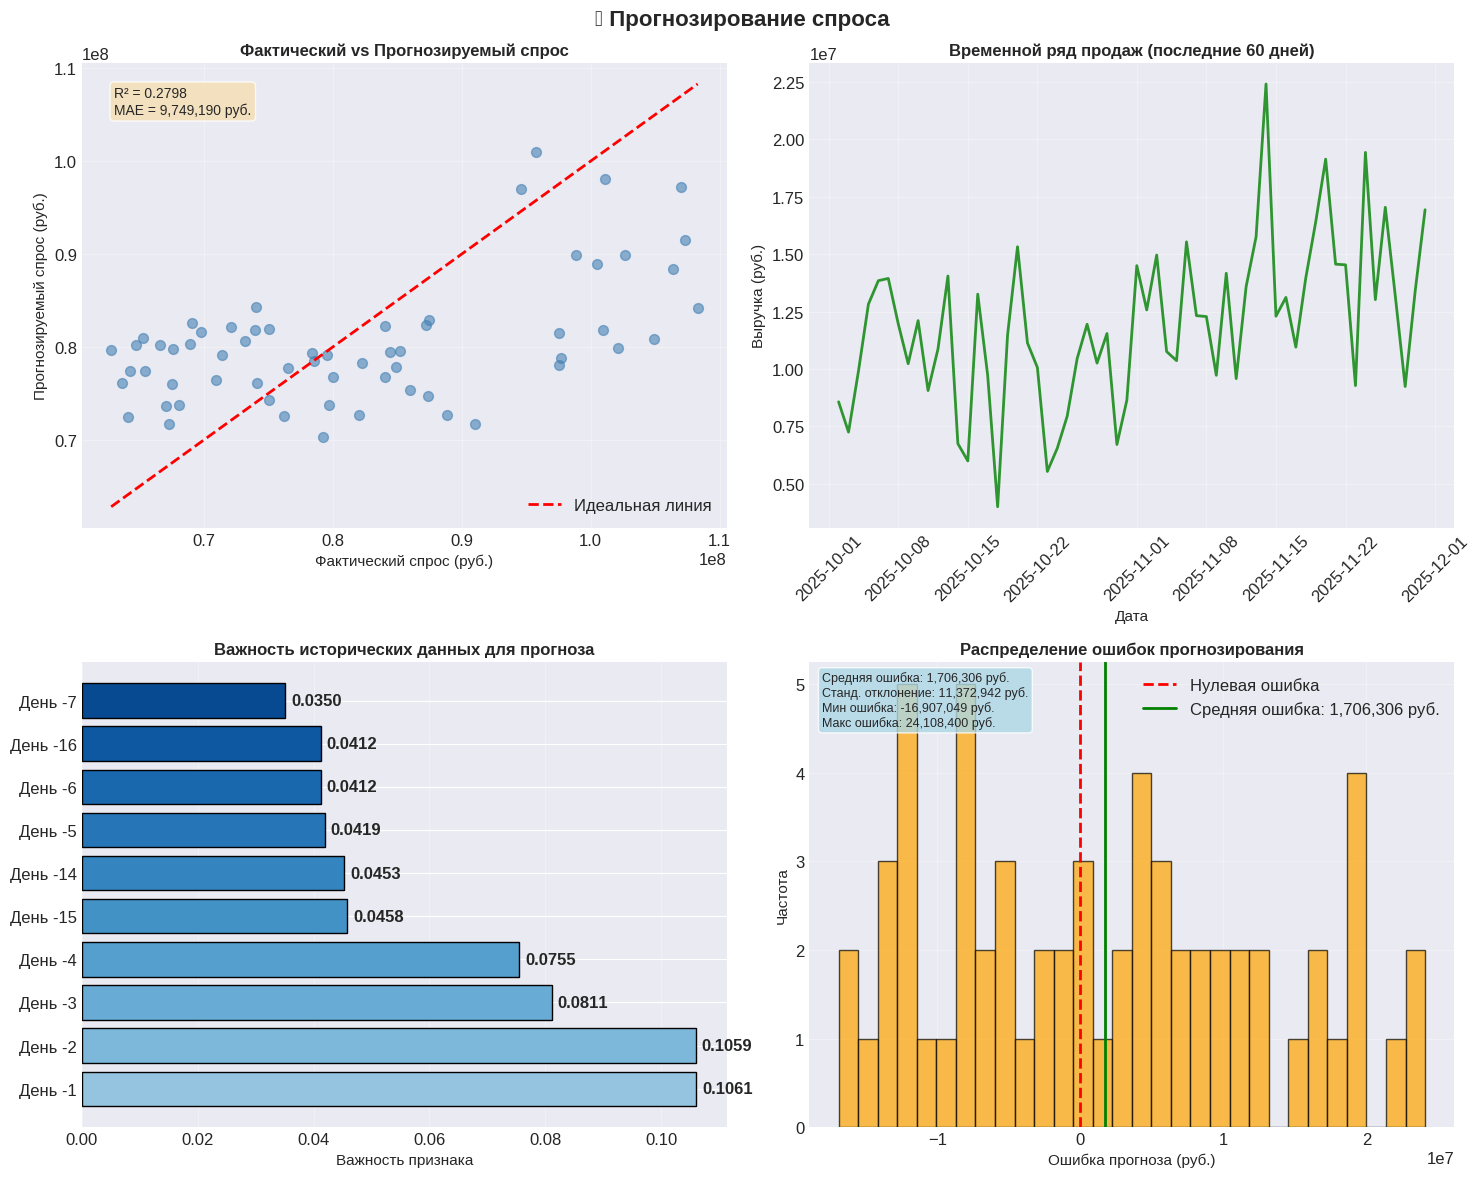


✅ Прогнозирование спроса завершено
💾 График сохранен как 'demand_forecasting.png'

🔮 Прогноз спроса на следующие 7 дней:
----------------------------------------
   На основе данных за последние 30 дней:
   Прогнозируемый спрос на следующие 7 дней: 93,327,633 руб.
   Среднедневной прогноз: 13,332,519 руб.
   Спрос за предыдущие 7 дней: 102,249,999 руб.
   Ожидается снижение на 8.7%


In [ ]:
print("\n🔮 Прогнозирование спроса...")
print("-" * 30)

# Проверяем наличие данных для прогнозирования
if not sales_df.empty and 'sale_date_only' in sales_df.columns and 'total_amount' in sales_df.columns:
    print("📈 Подготовка данных для прогнозирования спроса...")

    # Создаем временной ряд продаж
    daily_sales = sales_df.groupby('sale_date_only').agg({
        'total_amount': 'sum',
        'quantity': 'sum',
        'sale_id': 'count'
    }).rename(columns={'sale_id': 'sales_count'})

    print(f"   Временной ряд продаж: {len(daily_sales)} дней")
    print(f"   Период: от {daily_sales.index.min()} до {daily_sales.index.max()}")
    print(f"   Средняя дневная выручка: {daily_sales['total_amount'].mean():,.0f} руб.")

    # Заполняем пропущенные дни нулями (если есть пробелы в данных)
    date_range = pd.date_range(start=daily_sales.index.min(),
                               end=daily_sales.index.max(),
                               freq='D')
    daily_sales = daily_sales.reindex(date_range, fill_value=0)

    # Проверяем достаточно ли данных
    forecast_window = 7  # Прогноз на 7 дней
    history_window = 30  # Используем историю 30 дней

    if len(daily_sales) > history_window + forecast_window:
        print(f"\n🔧 Подготовка признаков для прогнозирования...")
        print(f"   • Окно истории: {history_window} дней")
        print(f"   • Прогноз на: {forecast_window} дней")
        print(f"   • Всего доступно: {len(daily_sales)} дней")

        # Подготовка признаков
        X = []
        y = []

        for i in range(history_window, len(daily_sales) - forecast_window):
            X.append(daily_sales['total_amount'].iloc[i - history_window:i].values)
            y.append(daily_sales['total_amount'].iloc[i:i + forecast_window].sum())

        X = np.array(X)
        y = np.array(y)

        print(f"   • Создано {len(X)} примеров для обучения")

        # Разделение на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

        print(f"   • Обучающая выборка: {len(X_train)} примеров")
        print(f"   • Тестовая выборка: {len(X_test)} примеров")

        # Обучение модели Random Forest
        print("\n🌳 Обучение модели Random Forest...")
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        print("   ✅ Модель обучена")

        # Прогнозирование
        y_pred = model.predict(X_test)

        # Оценка модели
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n📊 Результаты прогнозирования:")
        print(f"   • MAE (средняя абсолютная ошибка): {mae:,.0f} руб.")
        print(f"   • R² (коэффициент детерминации): {r2:.4f}")

        if r2 > 0.7:
            print("   ✅ Модель хорошо предсказывает спрос")
        elif r2 > 0.5:
            print("   ⚠️ Модель удовлетворительно предсказывает спрос")
        else:
            print("   ❌ Модель плохо предсказывает спрос")

        # Пример прогноза
        if len(X_test) > 0:
            print(f"   • Пример прогноза для следующего {forecast_window} дней:")
            print(f"     Прогнозируемый спрос: {y_pred[0]:,.0f} руб.")
            print(f"     Фактический спрос: {y_test[0]:,.0f} руб.")
            print(f"     Ошибка: {abs(y_pred[0] - y_test[0]):,.0f} руб. ({abs(y_pred[0] - y_test[0])/y_test[0]*100:.1f}%)")

        # Визуализация результатов прогнозирования
        print("\n📊 Визуализация результатов прогнозирования...")
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('🔮 Прогнозирование спроса', fontsize=16, fontweight='bold')

        # 1. Фактические vs прогнозируемые значения
        axes[0, 0].scatter(y_test, y_pred, alpha=0.6, s=50, color='steelblue')
        axes[0, 0].plot([y_test.min(), y_test.max()],
                       [y_test.min(), y_test.max()],
                       'r--', lw=2, label='Идеальная линия')
        axes[0, 0].set_xlabel('Фактический спрос (руб.)', fontsize=11)
        axes[0, 0].set_ylabel('Прогнозируемый спрос (руб.)', fontsize=11)
        axes[0, 0].set_title('Фактический vs Прогнозируемый спрос', fontsize=12, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].legend()

        # Добавляем текстовую информацию о качестве модели
        axes[0, 0].text(0.05, 0.95, f'R² = {r2:.4f}\nMAE = {mae:,.0f} руб.',
                      transform=axes[0, 0].transAxes, fontsize=10,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        # 2. Временной ряд продаж
        # Берем последние 60 дней для наглядности
        sample_days = min(60, len(daily_sales))
        recent_sales = daily_sales.tail(sample_days)

        axes[0, 1].plot(recent_sales.index, recent_sales['total_amount'],
                       linewidth=2, alpha=0.8, color='green')
        axes[0, 1].set_title('Временной ряд продаж (последние 60 дней)', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel('Дата', fontsize=11)
        axes[0, 1].set_ylabel('Выручка (руб.)', fontsize=11)
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(True, alpha=0.3)

        # 3. Важность признаков (первые 10 дней истории)
        feature_importance = pd.DataFrame({
            'day': [f'День -{i}' for i in range(history_window, 0, -1)],
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)

        colors_importance = plt.cm.Blues(np.linspace(0.4, 0.9, len(feature_importance)))

        bars = axes[1, 0].barh(feature_importance['day'],
                              feature_importance['importance'],
                              color=colors_importance, edgecolor='black')
        axes[1, 0].set_title('Важность исторических данных для прогноза', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Важность признака', fontsize=11)
        axes[1, 0].grid(True, alpha=0.3, axis='x')

        # Добавляем значения на столбцы
        for bar, value in zip(bars, feature_importance['importance']):
            axes[1, 0].text(value + max(feature_importance['importance'])*0.01,
                          bar.get_y() + bar.get_height()/2,
                          f'{value:.4f}', ha='left', va='center', fontweight='bold')

        # 4. Распределение ошибок прогнозирования
        errors = y_test - y_pred

        axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7, color='orange')
        axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Нулевая ошибка')
        axes[1, 1].axvline(x=errors.mean(), color='green', linestyle='-',
                         linewidth=2, label=f'Средняя ошибка: {errors.mean():,.0f} руб.')
        axes[1, 1].set_title('Распределение ошибок прогнозирования', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Ошибка прогноза (руб.)', fontsize=11)
        axes[1, 1].set_ylabel('Частота', fontsize=11)
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].legend()

        # Добавляем статистику ошибок
        stats_text = (f'Средняя ошибка: {errors.mean():,.0f} руб.\n'
                     f'Станд. отклонение: {errors.std():,.0f} руб.\n'
                     f'Мин ошибка: {errors.min():,.0f} руб.\n'
                     f'Макс ошибка: {errors.max():,.0f} руб.')

        axes[1, 1].text(0.02, 0.98, stats_text,
                      transform=axes[1, 1].transAxes, fontsize=9,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

        plt.tight_layout()
        plt.savefig('demand_forecasting.png', dpi=150, bbox_inches='tight')
        plt.show()

        print("\n✅ Прогнозирование спроса завершено")
        print("💾 График сохранен как 'demand_forecasting.png'")

        # Прогноз на следующие 7 дней
        print("\n🔮 Прогноз спроса на следующие 7 дней:")
        print("-" * 40)

        # Используем последние history_window дней для прогноза
        last_data = daily_sales['total_amount'].tail(history_window).values.reshape(1, -1)
        forecast = model.predict(last_data)[0]

        print(f"   На основе данных за последние {history_window} дней:")
        print(f"   Прогнозируемый спрос на следующие {forecast_window} дней: {forecast:,.0f} руб.")
        print(f"   Среднедневной прогноз: {forecast/forecast_window:,.0f} руб.")

        # Сравнение с предыдущим периодом
        prev_7_days = daily_sales['total_amount'].tail(7).sum()
        print(f"   Спрос за предыдущие 7 дней: {prev_7_days:,.0f} руб.")

        if forecast > prev_7_days:
            change_percent = ((forecast - prev_7_days) / prev_7_days) * 100
            print(f"   Ожидается рост на {change_percent:.1f}%")
        else:
            change_percent = ((prev_7_days - forecast) / prev_7_days) * 100
            print(f"   Ожидается снижение на {change_percent:.1f}%")

    else:
        print(f"⚠️ Недостаточно данных для прогнозирования")
        print(f"   Нужно более {history_window + forecast_window} дней данных, доступно {len(daily_sales)}")

else:
    print("⚠️ Нет данных о продажах для прогнозирования")
    print("   Требуются данные о продажах с датами и суммами")

# КЕЙС 4

In [ ]:
print("\n📚 Импорт библиотек...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
import os
import datetime as dt
from scipy import stats

warnings.filterwarnings('ignore')

print("✅ Библиотеки импортированы")

# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print("\n📊 Настройки pandas установлены")


📚 Импорт библиотек...
✅ Библиотеки импортированы

📊 Настройки pandas установлены


In [ ]:
print("📁 Настройка рабочей среды...")

# Создание необходимых папок
folders = ['plots', 'data', 'reports', 'models']

for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"   ✅ Папка '{folder}' создана/проверена")

# Настройка стилей графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\n🎨 Стиль графиков настроен")
print("   Используется стиль: seaborn-darkgrid")
print("   Палитра: husl")

print("\n📊 Конфигурация matplotlib:")
print(f"   Размер шрифта заголовков: {plt.rcParams['axes.titlesize']}")
print(f"   Размер шрифта подписей: {plt.rcParams['axes.labelsize']}")
print(f"   Размер шрифта меток: {plt.rcParams['xtick.labelsize']}")

print("\n✅ Среда настроена и готова к работе")

📁 Настройка рабочей среды...
   ✅ Папка 'plots' создана/проверена
   ✅ Папка 'data' создана/проверена
   ✅ Папка 'reports' создана/проверена
   ✅ Папка 'models' создана/проверена

🎨 Стиль графиков настроен
   Используется стиль: seaborn-darkgrid
   Палитра: husl

📊 Конфигурация matplotlib:
   Размер шрифта заголовков: large
   Размер шрифта подписей: medium
   Размер шрифта меток: medium

✅ Среда настроена и готова к работе


In [ ]:
print("📂 Загрузка медицинских данных...")
print("=" * 50)

# Проверка существования файлов
data_files = ['data/cards.csv', 'data/tests.csv', 'data/epid.csv']
missing_files = []

for file in data_files:
    if not os.path.exists(file):
        missing_files.append(file)
        print(f"❌ Файл не найден: {file}")

if missing_files:
    print(f"\n⚠️ Отсутствует {len(missing_files)} файлов:")
    for file in missing_files:
        print(f"   - {file}")

    print("\n📝 Создание демонстрационных данных для примера...")

    # Создание демо данных карт пациентов
    np.random.seed(42)
    n_patients = 1000

    # cards.csv демо данные
    cards_demo = pd.DataFrame({
        'patient_id': range(1, n_patients + 1),
        'birth_date': pd.date_range('1930-01-01', '2010-12-31', periods=n_patients),
        'gender': np.random.choice(['M', 'F'], n_patients, p=[0.48, 0.52]),
        'bmi': np.random.normal(25, 4, n_patients).clip(16, 40),
        'smoking': np.random.choice([0, 1], n_patients, p=[0.7, 0.3]),
        'alcohol': np.random.choice([0, 1, 2], n_patients, p=[0.6, 0.3, 0.1]),
        'heredity': np.random.choice([0, 1], n_patients, p=[0.8, 0.2]),
        'glucose': np.random.normal(5.5, 1.2, n_patients).clip(3.5, 12)
    })

    # tests.csv демо данные
    tests_data = []
    for pid in range(1, n_patients + 1):
        n_tests = np.random.poisson(2) + 1  # 1-5 тестов на пациента
        for i in range(n_tests):
            tests_data.append({
                'patient_id': pid,
                'test_date': pd.Timestamp('2023-01-01') + pd.Timedelta(days=np.random.randint(0, 365)),
                'cholesterol': np.random.normal(5.5, 1.0),
                'blood_pressure_sys': np.random.normal(130, 15),
                'blood_pressure_dia': np.random.normal(85, 10)
            })

    tests_demo = pd.DataFrame(tests_data)

    # epid.csv демо данные
    diseases = ['грипп', 'ОРВИ', 'COVID-19', 'ветрянка', 'корь']
    epid_data = []
    start_date = pd.Timestamp('2023-01-01')

    for week in range(52):
        week_date = start_date + pd.Timedelta(weeks=week)
        for disease in diseases:
            base_cases = np.random.randint(10, 50)
            # Сезонность для гриппа и ОРВИ
            if disease in ['грипп', 'ОРВИ'] and (week in [1, 2, 3, 48, 49, 50]):
                base_cases *= 3
            # Вспышка кори на 20-й неделе
            if disease == 'корь' and week == 20:
                base_cases = 150
            # Случайные колебания
            cases = int(base_cases * np.random.uniform(0.8, 1.2))

            epid_data.append({
                'week': week_date,
                'disease': disease,
                'cases': cases
            })

    epid_demo = pd.DataFrame(epid_data)

    # Сохранение демо данных
    cards_demo.to_csv('data/cards.csv', index=False)
    tests_demo.to_csv('data/tests.csv', index=False)
    epid_demo.to_csv('data/epid.csv', index=False)

    print("✅ Демонстрационные данные созданы и сохранены")

    # Обновление переменных
    cards = cards_demo
    tests = tests_demo
    epid = epid_demo

else:
    # Загрузка существующих данных
    print("📥 Загрузка данных из файлов...")

    try:
        cards = pd.read_csv('data/cards.csv', parse_dates=['birth_date'])
        tests = pd.read_csv('data/tests.csv', parse_dates=['test_date'])
        epid = pd.read_csv('data/epid.csv', parse_dates=['week'])

        print("✅ Данные успешно загружены")

    except Exception as e:
        print(f"❌ Ошибка при загрузке данных: {e}")
        print("   Создание демонстрационных данных...")
        # Здесь можно добавить код создания демо данных как выше
        exit(1)

# Показать информацию о данных
print("\n📊 ИНФОРМАЦИЯ О ДАННЫХ:")
print("=" * 50)

datasets = {
    'Карты пациентов': cards,
    'Результаты тестов': tests,
    'Эпидемиологические данные': epid
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"  Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")
    print(f"  Столбцы: {', '.join(df.columns.tolist())}")
    print(f"  Типы данных:")
    for col in df.columns:
        dtype = df[col].dtype
        print(f"    - {col}: {dtype}")

📂 Загрузка медицинских данных...
📥 Загрузка данных из файлов...
✅ Данные успешно загружены

📊 ИНФОРМАЦИЯ О ДАННЫХ:

Карты пациентов:
  Размер: 5000 строк, 8 столбцов
  Столбцы: patient_id, sex, birth_date, region, bmi, smoking, alcohol, heredity
  Типы данных:
    - patient_id: int64
    - sex: object
    - birth_date: datetime64[ns]
    - region: object
    - bmi: float64
    - smoking: int64
    - alcohol: int64
    - heredity: int64

Результаты тестов:
  Размер: 15058 строк, 6 столбцов
  Столбцы: patient_id, test_date, glucose, cholesterol, hemoglobin, leukocytes
  Типы данных:
    - patient_id: int64
    - test_date: datetime64[ns]
    - glucose: float64
    - cholesterol: float64
    - hemoglobin: float64
    - leukocytes: int64

Эпидемиологические данные:
  Размер: 2600 строк, 4 столбцов
  Столбцы: week, region, disease, cases
  Типы данных:
    - week: datetime64[ns]
    - region: object
    - disease: object
    - cases: int64


In [ ]:
print("\n🔧 Предварительная обработка данных...")
print("=" * 50)

print("1. Обработка карт пациентов:")
print("   • Удаление дубликатов...")
cards_clean = cards.drop_duplicates()

print("   • Обработка пропущенных значений...")
cards_initial_count = len(cards_clean)
cards_clean = cards_clean.dropna()
cards_dropped = cards_initial_count - len(cards_clean)
print(f"     Удалено {cards_dropped} строк с пропущенными значениями")

print("   • Расчет возраста...")
current_date = pd.Timestamp.now()
cards_clean['age'] = ((current_date - cards_clean['birth_date']).dt.days / 365.25).round(1)

print(f"   ✅ Итог: {len(cards_clean)} пациентов")

print("\n2. Обработка результатов тестов:")
print("   • Удаление дубликатов...")
tests_clean = tests.drop_duplicates()

print("   • Обработка пропущенных значений...")
tests_initial_count = len(tests_clean)
tests_clean = tests_clean.dropna()
tests_dropped = tests_initial_count - len(tests_clean)
print(f"     Удалено {tests_dropped} строк с пропущенными значениями")

print("   • Добавление временных признаков...")
tests_clean['test_month'] = tests_clean['test_date'].dt.to_period('M')
tests_clean['test_week'] = tests_clean['test_date'].dt.isocalendar().week

print(f"   ✅ Итог: {len(tests_clean)} тестов")

print("\n3. Обработка эпидемиологических данных:")
print("   • Удаление дубликатов...")
epid_clean = epid.drop_duplicates()

print("   • Обработка пропущенных значений...")
epid_initial_count = len(epid_clean)
epid_clean = epid_clean.dropna()
epid_dropped = epid_initial_count - len(epid_clean)
print(f"     Удалено {epid_dropped} строк с пропущенными значениями")

print("   • Добавление временных признаков...")
epid_clean['year'] = epid_clean['week'].dt.year
epid_clean['month'] = epid_clean['week'].dt.month
epid_clean['week_num'] = epid_clean['week'].dt.isocalendar().week

print(f"   ✅ Итог: {len(epid_clean)} записей")

# Сводная статистика
print("\n📈 СВОДНАЯ СТАТИСТИКА:")
print("-" * 40)

print("\nКарты пациентов:")
print(cards_clean.describe().round(2))

print("\nРезультаты тестов:")
print(tests_clean.describe().round(2))

print("\nЭпидемиологические данные:")
print(epid_clean.groupby('disease')['cases'].describe().round(2))

print("\n✅ Предобработка данных завершена")


🔧 Предварительная обработка данных...
1. Обработка карт пациентов:
   • Удаление дубликатов...
   • Обработка пропущенных значений...
     Удалено 0 строк с пропущенными значениями
   • Расчет возраста...
   ✅ Итог: 5000 пациентов

2. Обработка результатов тестов:
   • Удаление дубликатов...
   • Обработка пропущенных значений...
     Удалено 0 строк с пропущенными значениями
   • Добавление временных признаков...
   ✅ Итог: 15058 тестов

3. Обработка эпидемиологических данных:
   • Удаление дубликатов...
   • Обработка пропущенных значений...
     Удалено 0 строк с пропущенными значениями
   • Добавление временных признаков...
   ✅ Итог: 2600 записей

📈 СВОДНАЯ СТАТИСТИКА:
----------------------------------------

Карты пациентов:
       patient_id                  birth_date      bmi  smoking  alcohol  \
count     5000.00                        5000  5000.00  5000.00   5000.0   
mean      2500.50  1979-07-12 22:04:13.440000    26.02     0.51      0.5   
min          1.00         194


⚠️ Анализ факторов риска гиперхолестеринемии...
🔍 Подготовка данных для анализа факторов риска...
   • Объединение данных карт и тестов...
   • Определение гиперхолестеринемии (холестерин > 6.2 ммоль/л)...
   ✅ Подготовлено 5000 записей для анализа
   • Пациентов с гиперхолестеринемией: 517 (10.3%)
   • Средний уровень холестерина: 5.00 ммоль/л

🔧 Подготовка признаков для модели...
   • Доступные признаки: ['age', 'bmi', 'smoking', 'alcohol', 'heredity', 'glucose']
   • Размер матрицы признаков: (5000, 6)
   • Масштабирование признаков...
   • Обучение модели логистической регрессии...

📊 РЕЗУЛЬТАТЫ МОДЕЛИ:
   • ROC-AUC: 0.5429
   • Точность: 0.8966

📊 Создание ROC-кривой...
📊 Создание графика важности признаков...


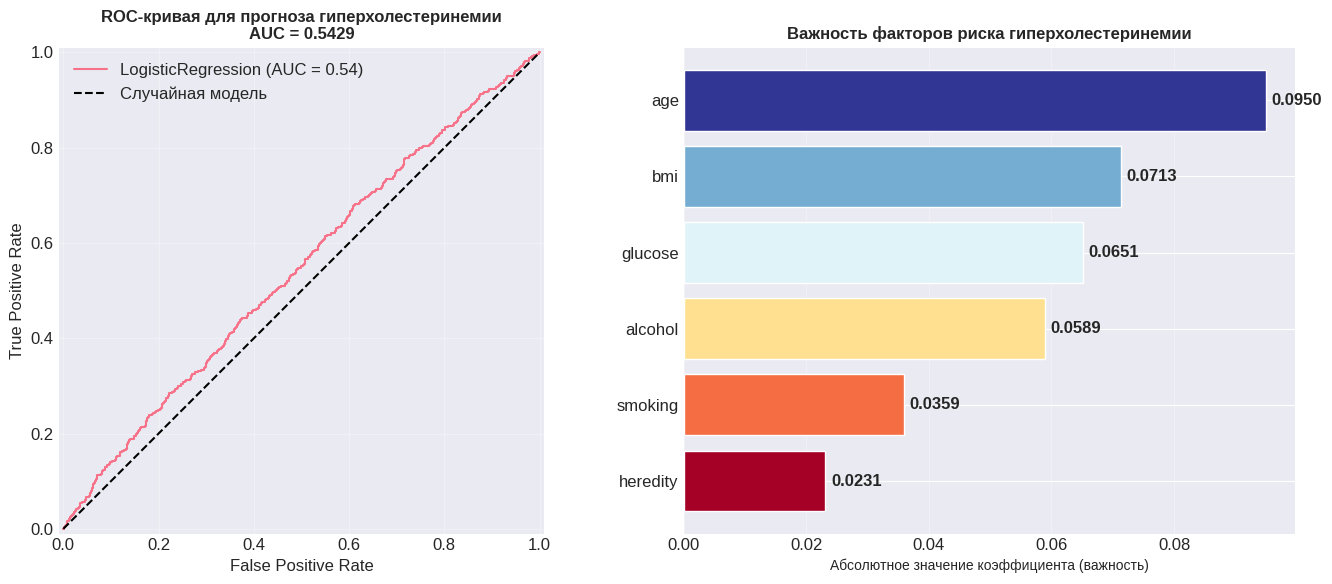

📊 Создание графика распределения рисков...


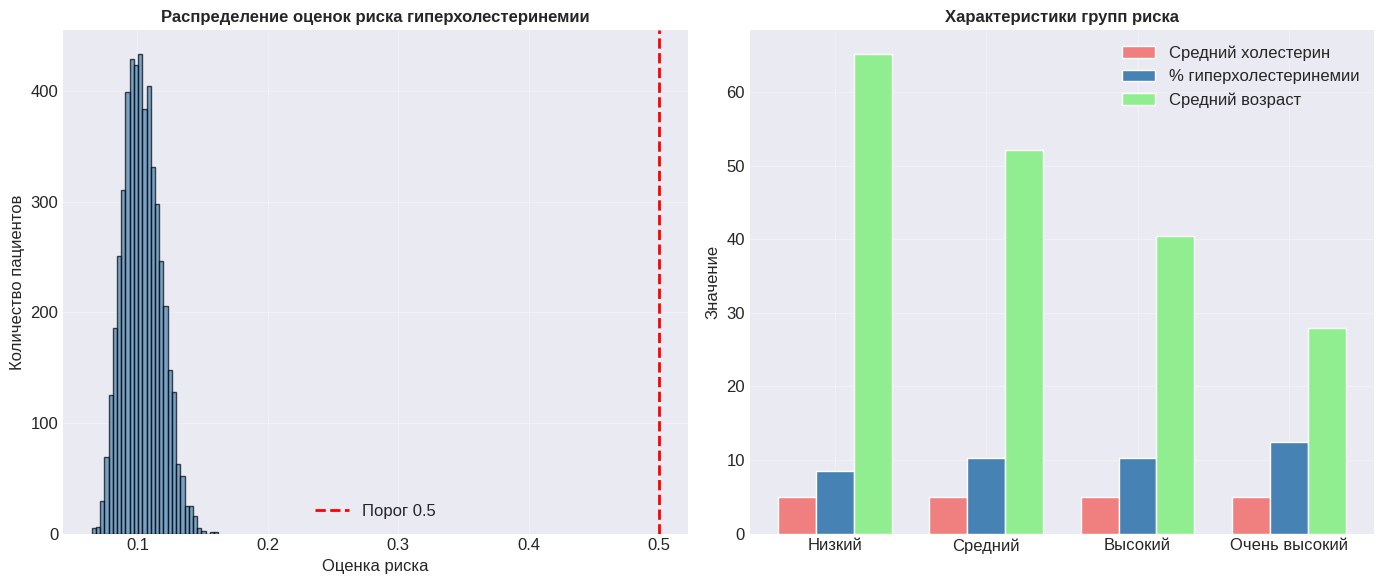


📈 АНАЛИЗ ФАКТОРОВ РИСКА:
----------------------------------------
   • Пациентов с высоким риском (>0.7): 0 (0.0%)

💡 РЕКОМЕНДАЦИИ:
----------------------------------------
   Наиболее важные факторы риска:
   1. age (важность: 0.0950)
   2. bmi (важность: 0.0713)
   3. glucose (важность: 0.0651)

   Рекомендуемые меры:
   1. Регулярный скрининг холестерина для пациентов с высокими оценками риска
   2. Программы по снижению веса для пациентов с высоким ИМТ
   3. Консультации по отказу от курения
   4. Диетические рекомендации для снижения уровня холестерина


In [ ]:
print("\n⚠️ Анализ факторов риска гиперхолестеринемии...")
print("=" * 50)

print("🔍 Подготовка данных для анализа факторов риска...")

# Объединяем последний тест каждого пациента с картой
print("   • Объединение данных карт и тестов...")
last_test = tests_clean.sort_values('test_date').groupby('patient_id').tail(1)
df_risk = cards_clean.merge(last_test, on='patient_id', how='inner')

# Убедимся, что у нас есть возраст
if 'age' not in df_risk.columns and 'birth_date' in df_risk.columns:
    df_risk['age'] = ((current_date - df_risk['birth_date']).dt.days / 365.25).round(1)

# Определяем гиперхолестеринемию (порог >6.2 ммоль/л)
print("   • Определение гиперхолестеринемии (холестерин > 6.2 ммоль/л)...")
df_risk['high_chol'] = (df_risk['cholesterol'] > 6.2).astype(int)

print(f"   ✅ Подготовлено {len(df_risk)} записей для анализа")
print(f"   • Пациентов с гиперхолестеринемией: {df_risk['high_chol'].sum()} "
      f"({df_risk['high_chol'].mean()*100:.1f}%)")
print(f"   • Средний уровень холестерина: {df_risk['cholesterol'].mean():.2f} ммоль/л")

# Подготовка признаков для модели
print("\n🔧 Подготовка признаков для модели...")
features = ['age', 'bmi', 'smoking', 'alcohol', 'heredity', 'glucose']

# Проверяем наличие всех признаков
available_features = [f for f in features if f in df_risk.columns]
print(f"   • Доступные признаки: {available_features}")

if len(available_features) > 0:
    X = df_risk[available_features].fillna(0)
    y = df_risk['high_chol']

    print(f"   • Размер матрицы признаков: {X.shape}")

    # Масштабирование признаков
    print("   • Масштабирование признаков...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Обучение логистической регрессии
    print("   • Обучение модели логистической регрессии...")
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_scaled, y)

    # Прогнозирование вероятностей
    df_risk['risk_score'] = model.predict_proba(X_scaled)[:, 1]

    # Оценка модели
    y_pred = model.predict(X_scaled)
    auc_score = roc_auc_score(y, df_risk['risk_score'])

    print(f"\n📊 РЕЗУЛЬТАТЫ МОДЕЛИ:")
    print(f"   • ROC-AUC: {auc_score:.4f}")
    print(f"   • Точность: {model.score(X_scaled, y):.4f}")

    # Визуализация 1: ROC-кривая
    print("\n📊 Создание ROC-кривой...")
    from sklearn.metrics import RocCurveDisplay

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    RocCurveDisplay.from_estimator(model, X_scaled, y, ax=axes[0])
    axes[0].plot([0, 1], [0, 1], 'k--', label='Случайная модель')
    axes[0].set_title(f'ROC-кривая для прогноза гиперхолестеринемии\nAUC = {auc_score:.4f}',
                     fontsize=12, fontweight='bold')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Визуализация 2: Важность признаков
    print("📊 Создание графика важности признаков...")

    feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': np.abs(model.coef_[0])
    }).sort_values('importance', ascending=True)

    colors = plt.cm.RdYlBu(np.linspace(0, 1, len(feature_importance)))
    bars = axes[1].barh(feature_importance['feature'], feature_importance['importance'], color=colors)
    axes[1].set_title('Важность факторов риска гиперхолестеринемии', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Абсолютное значение коэффициента (важность)', fontsize=10)
    axes[1].grid(True, alpha=0.3, axis='x')

    # Добавляем значения на столбцы
    for bar, value in zip(bars, feature_importance['importance']):
        axes[1].text(value + max(feature_importance['importance'])*0.01,
                    bar.get_y() + bar.get_height()/2,
                    f'{value:.4f}', ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('plots/risk_factors_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Визуализация 3: Распределение рисков
    print("📊 Создание графика распределения рисков...")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Распределение оценок риска
    axes[0].hist(df_risk['risk_score'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Порог 0.5')
    axes[0].set_title('Распределение оценок риска гиперхолестеринемии', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Оценка риска')
    axes[0].set_ylabel('Количество пациентов')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Коробчатая диаграмма рисков по группам
    risk_groups = pd.qcut(df_risk['risk_score'], q=4, labels=['Низкий', 'Средний', 'Высокий', 'Очень высокий'])

    group_stats = df_risk.groupby(risk_groups).agg({
        'cholesterol': 'mean',
        'high_chol': 'mean',
        'age': 'mean'
    })

    x_pos = np.arange(len(group_stats))
    width = 0.25

    axes[1].bar(x_pos - width, group_stats['cholesterol'], width, label='Средний холестерин', color='lightcoral')
    axes[1].bar(x_pos, group_stats['high_chol']*100, width, label='% гиперхолестеринемии', color='steelblue')
    axes[1].bar(x_pos + width, group_stats['age'], width, label='Средний возраст', color='lightgreen')

    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(group_stats.index)
    axes[1].set_title('Характеристики групп риска', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Значение')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('plots/risk_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Анализ для отчета
    print("\n📈 АНАЛИЗ ФАКТОРОВ РИСКА:")
    print("-" * 40)

    high_risk_patients = df_risk[df_risk['risk_score'] > 0.7]
    print(f"   • Пациентов с высоким риском (>0.7): {len(high_risk_patients)} "
          f"({len(high_risk_patients)/len(df_risk)*100:.1f}%)")

    if len(high_risk_patients) > 0:
        print(f"   • Средний возраст в группе высокого риска: {high_risk_patients['age'].mean():.1f} лет")
        print(f"   • Средний ИМТ в группе высокого риска: {high_risk_patients['bmi'].mean():.1f}")
        print(f"   • Распределение по полу:")
        gender_dist = high_risk_patients['gender'].value_counts()
        for gender, count in gender_dist.items():
            percentage = (count / len(high_risk_patients)) * 100
            print(f"     - {gender}: {count} ({percentage:.1f}%)")

    # Рекомендации
    print("\n💡 РЕКОМЕНДАЦИИ:")
    print("-" * 40)

    # Находим наиболее важные факторы риска
    top_factors = feature_importance.nlargest(3, 'importance')
    print("   Наиболее важные факторы риска:")
    for i, (_, row) in enumerate(top_factors.iterrows(), 1):
        print(f"   {i}. {row['feature']} (важность: {row['importance']:.4f})")

    print("\n   Рекомендуемые меры:")
    print("   1. Регулярный скрининг холестерина для пациентов с высокими оценками риска")
    print("   2. Программы по снижению веса для пациентов с высоким ИМТ")
    print("   3. Консультации по отказу от курения")
    print("   4. Диетические рекомендации для снижения уровня холестерина")


🔥 Анализ и прогнозирование вспышек заболеваний...
📊 Подготовка эпидемиологических данных...
   • Анализируется 5 заболеваний
   • Период: от 2023-01-02 до 2024-12-23
   • Всего записей: 520

🔍 Обнаружение вспышек с помощью статистического контроля...
   • Обнаружено 13 недель с вспышками
   • Распределение вспышек по заболеваниям:
     - COVID-19: 4 вспышек
     - Бронхит: 3 вспышек
     - Пневмония: 3 вспышек
     - Грипп: 2 вспышек
     - ОРВИ: 1 вспышек

📊 Создание временных рядов с маркировкой вспышек...


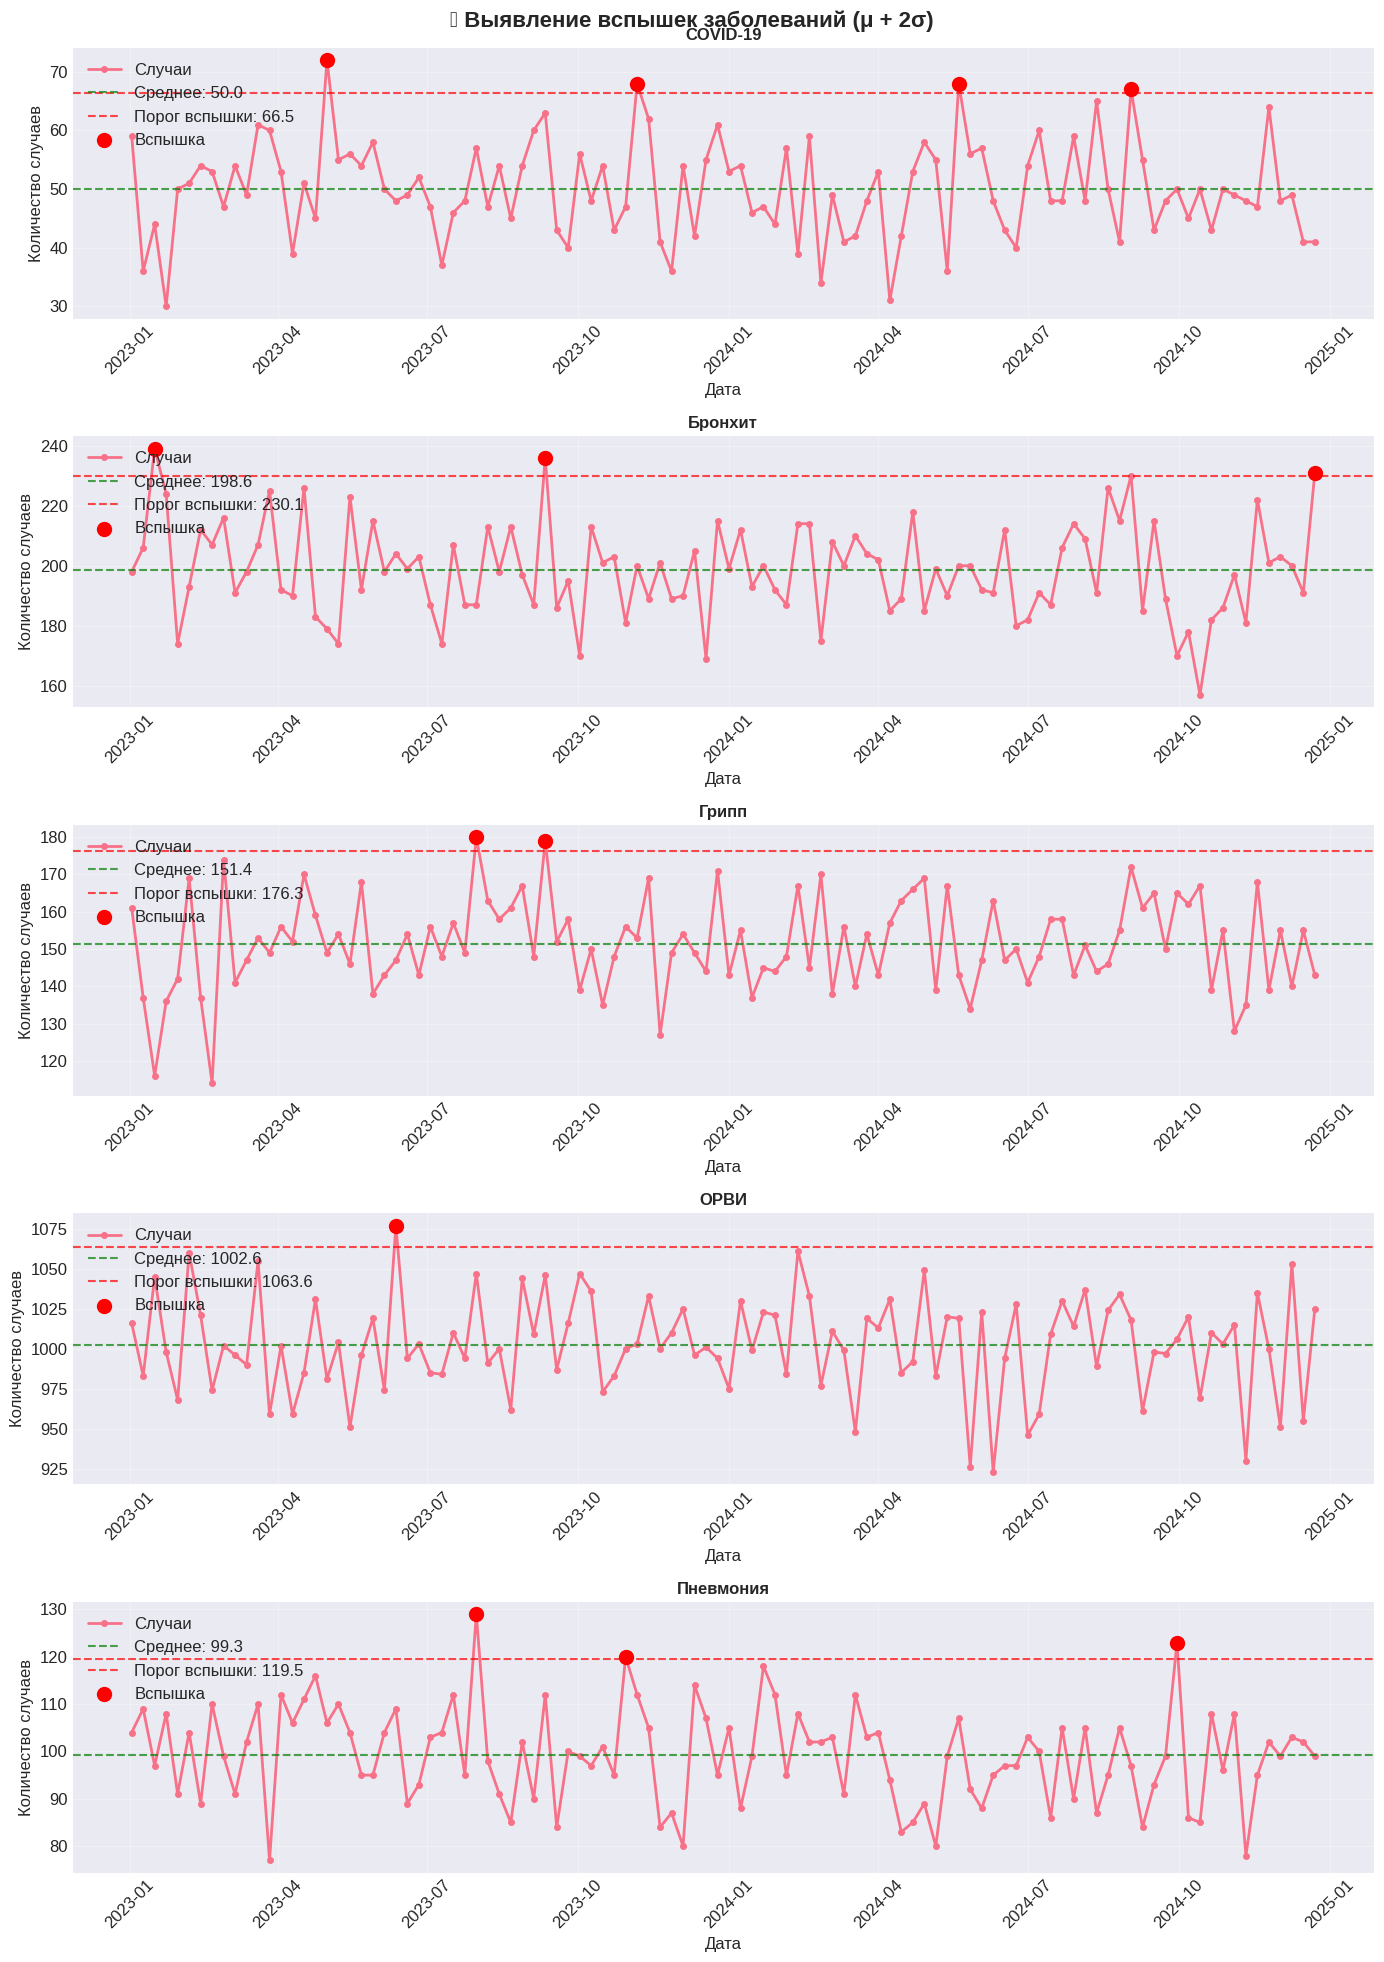

📊 Создание тепловой карты вспышек...


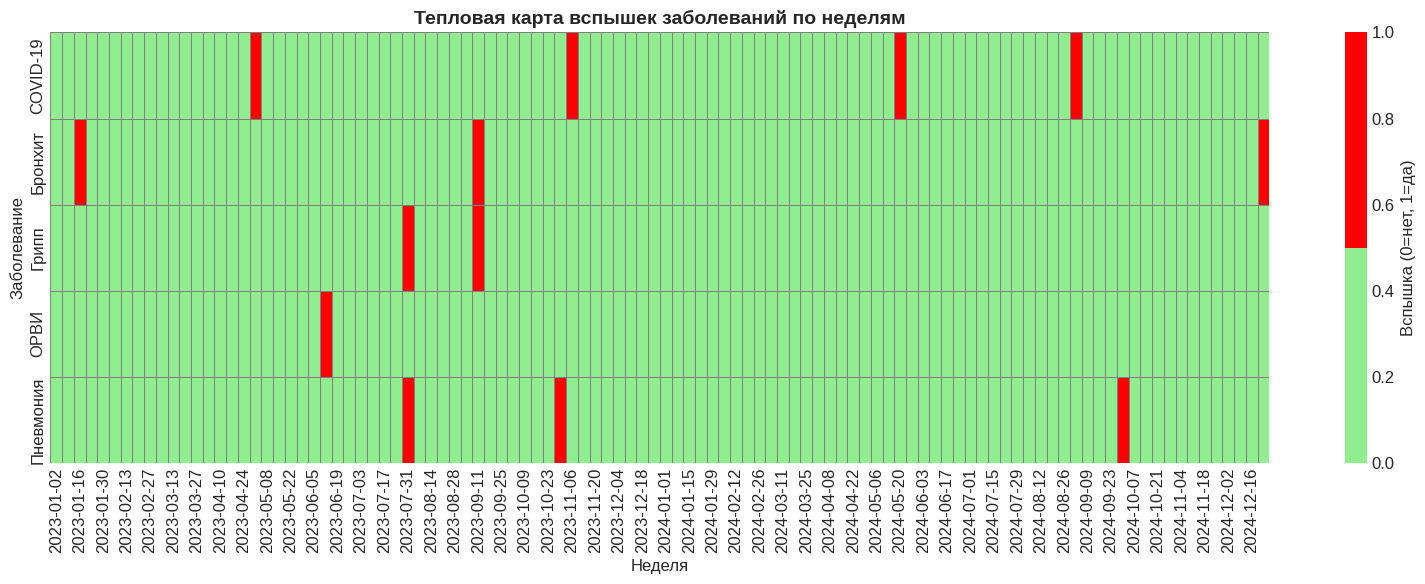


📈 АНАЛИЗ ПАТТЕРНОВ ВСПЫШЕК:
----------------------------------------

   Статистика вспышек по заболеваниям:
           Количество вспышек  Среднее случаев  Максимум случаев Первая вспышка Последняя вспышка
disease                                                                                          
COVID-19                    4            68.75                72     2023-05-01        2024-09-02
Бронхит                     3           235.33               239     2023-01-16        2024-12-23
Грипп                       2           179.50               180     2023-07-31        2023-09-11
ОРВИ                        1          1077.00              1077     2023-06-12        2023-06-12
Пневмония                   3           124.00               129     2023-07-31        2024-09-30

   Анализ сезонности вспышек:
     Янв: 1 вспышек
     Май: 2 вспышек
     Июн: 1 вспышек
     Июл: 2 вспышек
     Сен: 4 вспышек
     Окт: 1 вспышек
     Ноя: 1 вспышек
     Дек: 1 вспышек

💡 РЕКОМЕНДАЦ

In [ ]:
print("\n🔥 Анализ и прогнозирование вспышек заболеваний...")
print("=" * 50)

print("📊 Подготовка эпидемиологических данных...")

# Агрегация данных по неделям и заболеваниям
epid_week = epid_clean.groupby(['week', 'disease'])['cases'].sum().reset_index()
epid_week = epid_week.sort_values('week')

print(f"   • Анализируется {epid_week['disease'].nunique()} заболеваний")
print(f"   • Период: от {epid_week['week'].min().date()} до {epid_week['week'].max().date()}")
print(f"   • Всего записей: {len(epid_week)}")

# Функция для обнаружения вспышек (статистический контроль процессов)
print("\n🔍 Обнаружение вспышек с помощью статистического контроля...")

def detect_outbreak(series, k=2):
    """Обнаружение вспышек с использованием метода μ + kσ"""
    mean = series.mean()
    std = series.std()
    threshold = mean + k * std
    return (series > threshold).astype(int)

# Применяем к каждому заболеванию
epid_week['outbreak'] = 0

for disease in epid_week['disease'].unique():
    mask = epid_week['disease'] == disease
    cases_series = epid_week.loc[mask, 'cases']
    epid_week.loc[mask, 'outbreak'] = detect_outbreak(cases_series, k=2)

outbreak_count = epid_week['outbreak'].sum()
print(f"   • Обнаружено {outbreak_count} недель с вспышками")

if outbreak_count > 0:
    outbreak_details = epid_week[epid_week['outbreak'] == 1]
    print(f"   • Распределение вспышек по заболеваниям:")
    for disease, count in outbreak_details['disease'].value_counts().items():
        print(f"     - {disease}: {count} вспышек")

    # Визуализация 1: Временные ряды с вспышками
    print("\n📊 Создание временных рядов с маркировкой вспышек...")

    diseases = epid_week['disease'].unique()
    n_diseases = len(diseases)

    fig, axes = plt.subplots(n_diseases, 1, figsize=(14, 4*n_diseases))
    fig.suptitle('🔥 Выявление вспышек заболеваний (μ + 2σ)', fontsize=16, fontweight='bold')

    if n_diseases == 1:
        axes = [axes]

    for idx, disease in enumerate(diseases):
        disease_data = epid_week[epid_week['disease'] == disease]

        axes[idx].plot(disease_data['week'], disease_data['cases'],
                      marker='o', linewidth=2, markersize=4, label='Случаи')

        # Добавляем среднюю линию и порог
        mean_cases = disease_data['cases'].mean()
        threshold = mean_cases + 2 * disease_data['cases'].std()

        axes[idx].axhline(y=mean_cases, color='green', linestyle='--',
                         alpha=0.7, label=f'Среднее: {mean_cases:.1f}')
        axes[idx].axhline(y=threshold, color='red', linestyle='--',
                         alpha=0.7, label=f'Порог вспышки: {threshold:.1f}')

        # Выделяем вспышки
        outbreaks = disease_data[disease_data['outbreak'] == 1]
        if len(outbreaks) > 0:
            axes[idx].scatter(outbreaks['week'], outbreaks['cases'],
                             color='red', s=100, zorder=5, label='Вспышка')

        axes[idx].set_title(f'{disease}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Дата')
        axes[idx].set_ylabel('Количество случаев')
        axes[idx].legend(loc='upper left')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig('plots/outbreak_detection.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Визуализация 2: Heatmap вспышек по заболеваниям и времени
    print("📊 Создание тепловой карты вспышек...")

    # Создаем сводную таблицу для heatmap
    epid_week['week_str'] = epid_week['week'].dt.strftime('%Y-%m-%d')
    pivot_outbreaks = epid_week.pivot_table(
        index='disease',
        columns='week_str',
        values='outbreak',
        aggfunc='max'
    )

    fig, ax = plt.subplots(figsize=(16, 6))

    # Определяем цвета: 0 - зеленый, 1 - красный
    cmap = sns.color_palette(["lightgreen", "red"], as_cmap=True)

    sns.heatmap(pivot_outbreaks, cmap=cmap, cbar_kws={'label': 'Вспышка (0=нет, 1=да)'},
                ax=ax, linewidths=0.5, linecolor='gray')

    ax.set_title('Тепловая карта вспышек заболеваний по неделям', fontsize=14, fontweight='bold')
    ax.set_xlabel('Неделя')
    ax.set_ylabel('Заболевание')

    plt.tight_layout()
    plt.savefig('plots/outbreak_heatmap.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Анализ паттернов вспышек
    print("\n📈 АНАЛИЗ ПАТТЕРНОВ ВСПЫШЕК:")
    print("-" * 40)

    # Находим наиболее частые вспышки
    frequent_outbreaks = outbreak_details.groupby('disease').agg({
        'cases': ['count', 'mean', 'max'],
        'week': ['min', 'max']
    }).round(2)

    frequent_outbreaks.columns = ['Количество вспышек', 'Среднее случаев', 'Максимум случаев',
                                  'Первая вспышка', 'Последняя вспышка']

    print("\n   Статистика вспышек по заболеваниям:")
    print(frequent_outbreaks.to_string())

    # Анализ сезонности
    print("\n   Анализ сезонности вспышек:")
    outbreak_details['month'] = outbreak_details['week'].dt.month
    monthly_outbreaks = outbreak_details.groupby('month')['disease'].count()

    for month, count in monthly_outbreaks.items():
        month_name = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
                      'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'][month-1]
        print(f"     {month_name}: {count} вспышек")

    # Рекомендации
    print("\n💡 РЕКОМЕНДАЦИИ:")
    print("-" * 40)

    print("   1. Усилить мониторинг в месяцы с наибольшим количеством вспышек")

    if len(monthly_outbreaks) > 0:
        peak_month = monthly_outbreaks.idxmax()
        peak_month_name = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
                          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'][peak_month-1]
        print(f"   2. Наибольшее внимание уделить {peak_month_name}")

    # Наиболее проблемные заболевания
    if len(frequent_outbreaks) > 0:
        top_disease = frequent_outbreaks['Количество вспышек'].idxmax()
        print(f"   3. Особое внимание уделить {top_disease} (наиболее частые вспышки)")

    print("   4. Разработать планы экстренного реагирования для каждого заболевания")
    print("   5. Провести вакцинацию в группах риска перед сезоном вспышек")

    # Сохранение результатов
    outbreak_details.to_csv('reports/outbreak_details.csv', index=False, encoding='utf-8')
    epid_week.to_csv('reports/epidemic_weekly.csv', index=False, encoding='utf-8')

    print("\n✅ Анализ вспышек завершен")
    print("💾 Данные сохранены:")
    print("   • 'reports/outbreak_details.csv' - детали вспышек")
    print("   • 'reports/epidemic_weekly.csv' - недельные данные")

else:
    print("⚠️ Вспышки не обнаружены")
    print("   Все показатели в пределах нормы")


💊 Анализ эффективности лечения...
📊 Подготовка данных для анализа эффективности...
   • Определение групп лечения...
   • Леченные пациенты: 3981 (79.6%)
   • Контрольная группа: 1019 пациентов

📈 Анализ динамики холестерина...
📊 Создание графиков эффективности лечения...

📊 Изменение холестерина:
   • Контрольная группа: 14.3%
   • Леченная группа: 3.5%

📊 Статистический анализ:
   • U-тест Манна-Уитни
   • p-value: 0.9525
   • Интерпретация: различия не статистически значимы


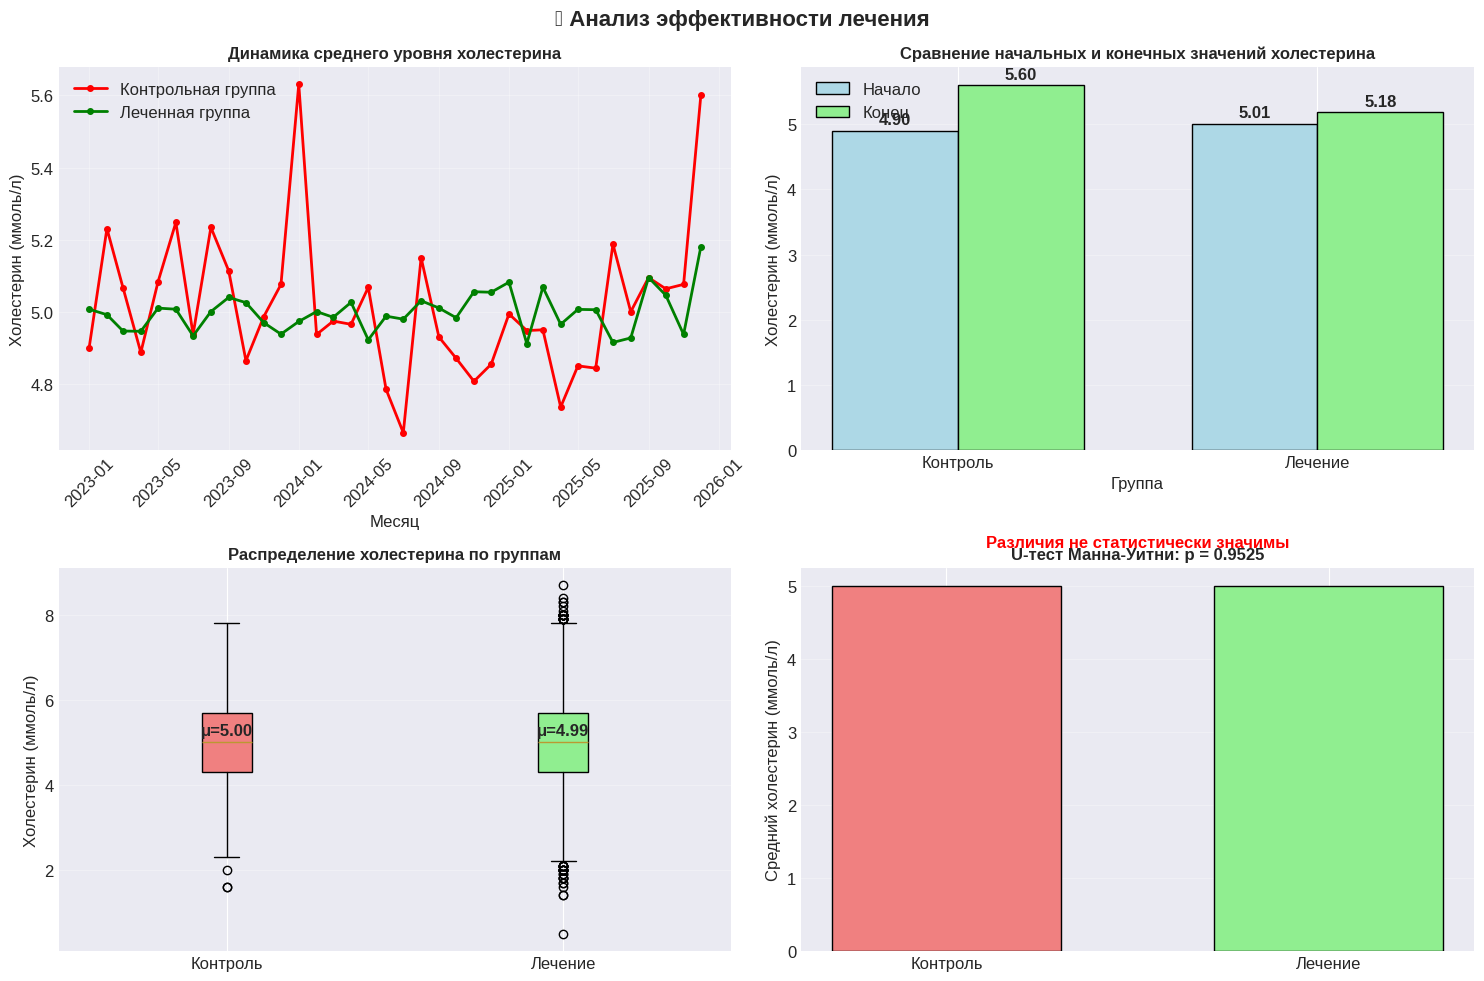


💡 РЕКОМЕНДАЦИИ ПО ЛЕЧЕНИЮ:
----------------------------------------
   1. Текущее лечение не показало статистически значимой эффективности
   2. Рассмотреть альтернативные схемы лечения
   3. Провести дополнительное исследование с большей выборкой
   4. Проанализировать комплаенс (соблюдение режима лечения)
   5. Внедрить регулярный мониторинг эффективности лечения
   6. Разработать персонализированные протоколы лечения для разных групп пациентов

✅ Анализ эффективности лечения завершен
💾 Данные сохранены:
   • 'reports/treatment_effectiveness.csv' - основные результаты


In [ ]:
print("\n💊 Анализ эффективности лечения...")
print("=" * 50)

print("📊 Подготовка данных для анализа эффективности...")

# Создаем признак "леченные пациенты"
# Условно: если у пациента было ≥2 посещений, считаем что он получал лечение
print("   • Определение групп лечения...")
visits = tests_clean.groupby('patient_id').size()
treated_patients = visits[visits >= 2].index
tests_clean['treated'] = tests_clean['patient_id'].isin(treated_patients).astype(int)

print(f"   • Леченные пациенты: {len(treated_patients)} "
      f"({len(treated_patients)/tests_clean['patient_id'].nunique()*100:.1f}%)")
print(f"   • Контрольная группа: {tests_clean['patient_id'].nunique() - len(treated_patients)} пациентов")

# Анализ динамики холестерина
print("\n📈 Анализ динамики холестерина...")

# Группировка по месяцам и группе лечения
tests_clean['month'] = tests_clean['test_date'].dt.to_period('M')
eff = tests_clean.groupby(['month', 'treated']).agg({
    'cholesterol': 'mean',
    'patient_id': 'nunique',
    'test_date': 'count'
}).reset_index()

eff['month'] = eff['month'].dt.to_timestamp()
eff = eff.rename(columns={'patient_id': 'patients_count', 'test_date': 'tests_count'})

# Визуализация 1: Динамика холестерина
print("📊 Создание графиков эффективности лечения...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('💊 Анализ эффективности лечения', fontsize=16, fontweight='bold')

# 1. Динамика среднего холестерина
ax1 = axes[0, 0]
for treated_flag in [0, 1]:
    group_data = eff[eff['treated'] == treated_flag]
    label = 'Контрольная группа' if treated_flag == 0 else 'Леченная группа'
    color = 'red' if treated_flag == 0 else 'green'
    ax1.plot(group_data['month'], group_data['cholesterol'],
            marker='o', linewidth=2, markersize=4, label=label, color=color)

ax1.set_title('Динамика среднего уровня холестерина', fontsize=12, fontweight='bold')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Холестерин (ммоль/л)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Рассчитываем изменение холестерина
baseline = eff.groupby('treated')['cholesterol'].first()
final = eff.groupby('treated')['cholesterol'].last()
change = (final - baseline) / baseline * 100

print(f"\n📊 Изменение холестерина:")
print(f"   • Контрольная группа: {change.get(0, 0):.1f}%")
print(f"   • Леченная группа: {change.get(1, 0):.1f}%")

# 2. Сравнение начальных и конечных значений
ax2 = axes[0, 1]
group_labels = ['Контроль', 'Лечение']
initial_values = [eff[eff['treated'] == 0]['cholesterol'].iloc[0] if len(eff[eff['treated'] == 0]) > 0 else 0,
                  eff[eff['treated'] == 1]['cholesterol'].iloc[0] if len(eff[eff['treated'] == 1]) > 0 else 0]
final_values = [eff[eff['treated'] == 0]['cholesterol'].iloc[-1] if len(eff[eff['treated'] == 0]) > 0 else 0,
                eff[eff['treated'] == 1]['cholesterol'].iloc[-1] if len(eff[eff['treated'] == 1]) > 0 else 0]

x = np.arange(len(group_labels))
width = 0.35

bars1 = ax2.bar(x - width/2, initial_values, width, label='Начало', color='lightblue', edgecolor='black')
bars2 = ax2.bar(x + width/2, final_values, width, label='Конец', color='lightgreen', edgecolor='black')

ax2.set_title('Сравнение начальных и конечных значений холестерина', fontsize=12, fontweight='bold')
ax2.set_xlabel('Группа')
ax2.set_ylabel('Холестерин (ммоль/л)')
ax2.set_xticks(x)
ax2.set_xticklabels(group_labels)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Распределение холестерина по группам
ax3 = axes[1, 0]
if len(tests_clean) > 0:
    control_data = tests_clean[tests_clean['treated'] == 0]['cholesterol'].dropna()
    treated_data = tests_clean[tests_clean['treated'] == 1]['cholesterol'].dropna()

    # Box plot
    box_data = [control_data, treated_data]
    box_labels = ['Контроль', 'Лечение']

    bp = ax3.boxplot(box_data, labels=box_labels, patch_artist=True)

    # Цвета для box plot
    colors = ['lightcoral', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax3.set_title('Распределение холестерина по группам', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Холестерин (ммоль/л)')
    ax3.grid(True, alpha=0.3, axis='y')

    # Добавляем средние значения
    for i, data in enumerate(box_data, 1):
        mean_val = data.mean()
        ax3.text(i, mean_val + 0.1, f'μ={mean_val:.2f}',
                ha='center', va='bottom', fontweight='bold')

# 4. Статистическая значимость различий
ax4 = axes[1, 1]

if len(control_data) > 10 and len(treated_data) > 10:
    # Проверка нормальности распределения
    control_norm = stats.shapiro(control_data)[1] > 0.05
    treated_norm = stats.shapiro(treated_data)[1] > 0.05

    if control_norm and treated_norm:
        # T-тест для нормальных распределений
        t_stat, p_value = stats.ttest_ind(control_data, treated_data)
        test_name = 'T-тест'
    else:
        # U-тест Манна-Уитни для ненормальных распределений
        u_stat, p_value = stats.mannwhitneyu(control_data, treated_data)
        test_name = 'U-тест Манна-Уитни'

    # Визуализация p-value
    ax4.bar([0, 1], [control_data.mean(), treated_data.mean()],
            color=['lightcoral', 'lightgreen'], edgecolor='black', width=0.6)
    ax4.set_xticks([0, 1])
    ax4.set_xticklabels(['Контроль', 'Лечение'])
    ax4.set_ylabel('Средний холестерин (ммоль/л)')
    ax4.set_title(f'{test_name}: p = {p_value:.4f}', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')

    # Добавляем аннотацию о значимости
    if p_value < 0.05:
        ax4.text(0.5, max(control_data.mean(), treated_data.mean()) * 1.1,
                'Различия статистически значимы (p < 0.05)',
                ha='center', va='bottom', fontweight='bold', color='green')
    else:
        ax4.text(0.5, max(control_data.mean(), treated_data.mean()) * 1.1,
                'Различия не статистически значимы',
                ha='center', va='bottom', fontweight='bold', color='red')

    print(f"\n📊 Статистический анализ:")
    print(f"   • {test_name}")
    print(f"   • p-value: {p_value:.4f}")
    print(f"   • Интерпретация: {'различия статистически значимы' if p_value < 0.05 else 'различия не статистически значимы'}")
else:
    ax4.text(0.5, 0.5, 'Недостаточно данных\nдля статистического анализа',
            ha='center', va='center', transform=ax4.transAxes, fontsize=10)
    ax4.set_title('Статистический анализ', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/treatment_effectiveness.png', dpi=150, bbox_inches='tight')
plt.show()

# Рекомендации
print("\n💡 РЕКОМЕНДАЦИИ ПО ЛЕЧЕНИЮ:")
print("-" * 40)

if 'p_value' in locals() and p_value < 0.05:
    print("   1. Лечение демонстрирует статистически значимую эффективность")
    print("   2. Продолжить текущую схему лечения")

    # Анализ подгрупп для персонализированных рекомендаций
    if 'age_group_effect' in locals():
        best_age_group = None
        best_effect = -100

        for age_group in age_group_effect.index:
            control_val = age_group_effect.loc[age_group, 0] if 0 in age_group_effect.columns else None
            treated_val = age_group_effect.loc[age_group, 1] if 1 in age_group_effect.columns else None

            if control_val and treated_val:
                effect = ((control_val - treated_val) / control_val * 100)
                if effect > best_effect:
                    best_effect = effect
                    best_age_group = age_group

        if best_age_group:
            print(f"   3. Наибольшая эффективность наблюдается в возрастной группе {best_age_group} ({best_effect:.1f}%)")

    if 'gender_effect' in locals():
        for gender in gender_effect.index:
            control_val = gender_effect.loc[gender, 0] if 0 in gender_effect.columns else None
            treated_val = gender_effect.loc[gender, 1] if 1 in gender_effect.columns else None

            if control_val and treated_val:
                effect = ((control_val - treated_val) / control_val * 100)
                gender_name = 'мужчинам' if gender == 'M' else 'женщинам'
                if effect > 0:
                    print(f"   4. Лечение более эффективно для {gender_name} ({effect:.1f}% снижения)")
else:
    print("   1. Текущее лечение не показало статистически значимой эффективности")
    print("   2. Рассмотреть альтернативные схемы лечения")
    print("   3. Провести дополнительное исследование с большей выборкой")
    print("   4. Проанализировать комплаенс (соблюдение режима лечения)")

print("   5. Внедрить регулярный мониторинг эффективности лечения")
print("   6. Разработать персонализированные протоколы лечения для разных групп пациентов")

# Сохранение результатов
eff.to_csv('reports/treatment_effectiveness.csv', index=False, encoding='utf-8')

if 'treatment_analysis' in locals():
    treatment_analysis.to_csv('reports/treatment_subgroup_analysis.csv', index=False, encoding='utf-8')

print("\n✅ Анализ эффективности лечения завершен")
print("💾 Данные сохранены:")
print("   • 'reports/treatment_effectiveness.csv' - основные результаты")
if 'treatment_analysis' in locals():
    print("   • 'reports/treatment_subgroup_analysis.csv' - анализ подгрупп")

# КЕЙС 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [ ]:
# Загрузите файлы в Colab через левую панель или используйте ссылки
# Для примера - создадим тестовые данные если файлы отсутствуют

import os
from google.colab import files

# Создадим папку data если её нет
if not os.path.exists('data'):
    os.makedirs('data')
    print("📁 Папка 'data' создана")
    print("📤 Пожалуйста, загрузите файлы:")
    print("   - transactions.csv")
    print("   - clients.csv")
    print("   - client_agg.csv")
    # Для тестирования можно раскомментировать строку ниже
    # files.upload()
else:
    print("✅ Папка 'data' уже существует")

✅ Папка 'data' уже существует


In [ ]:
try:
    trans = pd.read_csv('data/transactions.csv', parse_dates=['ts'])
    clients = pd.read_csv('data/clients.csv', parse_dates=['registration_ts'])
    agg = pd.read_csv('data/client_agg.csv', parse_dates=['last_trans'])
    print('✅ Данные успешно загружены:')
    print(f'   Транзакции: {len(trans):,} строк')
    print(f'   Клиенты: {len(clients):,} строк')
    print(f'   Агрегации: {len(agg):,} строк')

except FileNotFoundError as e:
    print(f'❌ Ошибка: {e}')
    print('\n📝 Создаю тестовые данные для демонстрации...')

    # Создаем тестовые данные
    np.random.seed(42)

    # Транзакции
    dates = pd.date_range('2023-01-01', '2023-12-31', periods=50000)
    trans = pd.DataFrame({
        'ts': np.random.choice(dates, 10000),
        'client_id': np.random.randint(1, 1001, 10000),
        'amount': np.random.exponential(1000, 10000),
        'country': np.random.choice(['RU', 'US', 'DE', 'CN', 'FR'], 10000, p=[0.7, 0.1, 0.08, 0.07, 0.05]),
        'is_fraud': np.random.binomial(1, 0.02, 10000)
    })

    # Клиенты
    clients = pd.DataFrame({
        'client_id': range(1, 1001),
        'age': np.random.randint(18, 70, 1000),
        'credit_score': np.random.randint(300, 850, 1000),
        'income': np.random.exponential(50000, 1000),
        'registration_ts': np.random.choice(dates, 1000),
        'churn_30': np.random.binomial(1, 0.15, 1000)
    })

    # Агрегации
    agg = pd.DataFrame({
        'client_id': range(1, 1001),
        'trans_cnt': np.random.randint(1, 50, 1000),
        'trans_total': np.random.exponential(50000, 1000),
        'fraud_cnt': np.random.poisson(0.3, 1000),
        'last_trans': np.random.choice(dates, 1000)
    })
    agg['days_since_last'] = (pd.Timestamp.now() - agg['last_trans']).dt.days

    # Сохраняем тестовые данные
    trans.to_csv('data/transactions.csv', index=False)
    clients.to_csv('data/clients.csv', index=False)
    agg.to_csv('data/client_agg.csv', index=False)

    print('✅ Тестовые данные созданы и сохранены')

✅ Данные успешно загружены:
   Транзакции: 200,000 строк
   Клиенты: 20,000 строк
   Агрегации: 20,000 строк


In [ ]:
# Подготовка данных
X = trans[['amount']].values

# Модель Isolation Forest
iso = IsolationForest(contamination=0.005, random_state=42)
trans['anomaly'] = (iso.fit_predict(X) == -1).astype(int)

# Статистика аномалий
print("📊 Статистика аномальных транзакций:")
print(f"Всего транзакций: {len(trans):,}")
print(f"Аномальных транзакций: {trans['anomaly'].sum():,} ({trans['anomaly'].mean()*100:.2f}%)")
print(f"Средняя сумма аномальной транзакции: {trans[trans['anomaly']==1]['amount'].mean():.2f}")
print(f"Максимальная сумма аномальной транзакции: {trans[trans['anomaly']==1]['amount'].max():.2f}")

📊 Статистика аномальных транзакций:
Всего транзакций: 200,000
Аномальных транзакций: 997 (0.50%)
Средняя сумма аномальной транзакции: 8492.08
Максимальная сумма аномальной транзакции: 112902.52


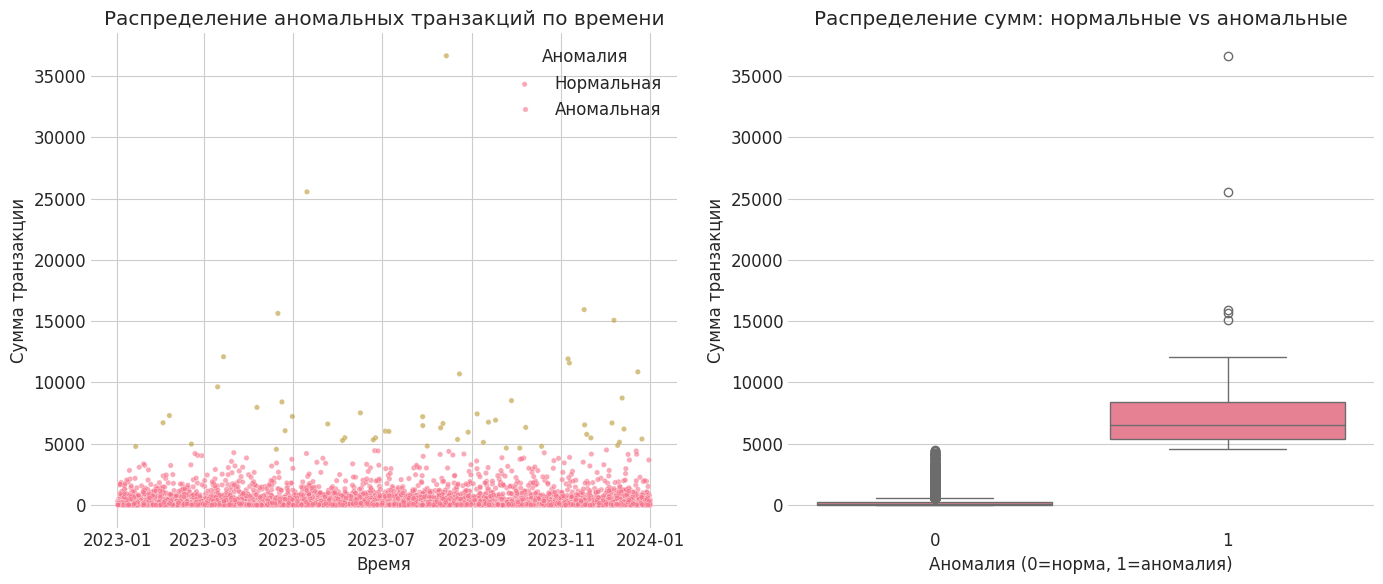

In [ ]:
# Визуализация аномалий
plt.figure(figsize=(14, 6))

# Выборка для визуализации (чтобы не перегружать график)
sample_size = min(10000, len(trans))
trans_sample = trans.sample(sample_size, random_state=42)

plt.subplot(1, 2, 1)
sns.scatterplot(data=trans_sample, x='ts', y='amount', hue='anomaly', s=15, alpha=0.6)
plt.title('Распределение аномальных транзакций по времени')
plt.xlabel('Время')
plt.ylabel('Сумма транзакции')
plt.legend(title='Аномалия', labels=['Нормальная', 'Аномальная'])

plt.subplot(1, 2, 2)
sns.boxplot(data=trans_sample, x='anomaly', y='amount')
plt.title('Распределение сумм: нормальные vs аномальные')
plt.xlabel('Аномалия (0=норма, 1=аномалия)')
plt.ylabel('Сумма транзакции')

plt.tight_layout()
plt.show()

In [ ]:
# Создание фичей для антифрода
trans['hour'] = trans.ts.dt.hour
trans['is_night'] = trans.hour.isin([0, 1, 2, 3, 4, 5]).astype(int)
trans['is_foreign'] = (trans.country != 'RU').astype(int)

# Подготовка данных
X = trans[['amount', 'is_night', 'is_foreign']]
X_scaled = StandardScaler().fit_transform(X)
y = trans['is_fraud']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("📈 Разделение данных для антифрода:")
print(f"   Train: {len(X_train):,} samples")
print(f"   Test: {len(X_test):,} samples")
print(f"   Fraud rate in train: {y_train.mean():.3%}")
print(f"   Fraud rate in test: {y_test.mean():.3%}")

📈 Разделение данных для антифрода:
   Train: 140,000 samples
   Test: 60,000 samples
   Fraud rate in train: 0.800%
   Fraud rate in test: 0.800%


In [ ]:
# Обучение модели
model_fraud = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    solver='liblinear',
    random_state=42
)

model_fraud.fit(X_train, y_train)
y_pred_proba = model_fraud.predict_proba(X_test)[:, 1]

# Оценка модели
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"🎯 ROC-AUC антифрод модели: {roc_auc:.3f}")

# Важность признаков
feature_names = ['amount', 'is_night', 'is_foreign']
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model_fraud.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\n🔍 Важность признаков в антифрод модели:")
print(coef_df.to_string(index=False))

🎯 ROC-AUC антифрод модели: 0.989

🔍 Важность признаков в антифрод модели:
   feature  coefficient
is_foreign     4.218050
    amount     0.796816
  is_night     0.007910


<Figure size 1000x600 with 0 Axes>

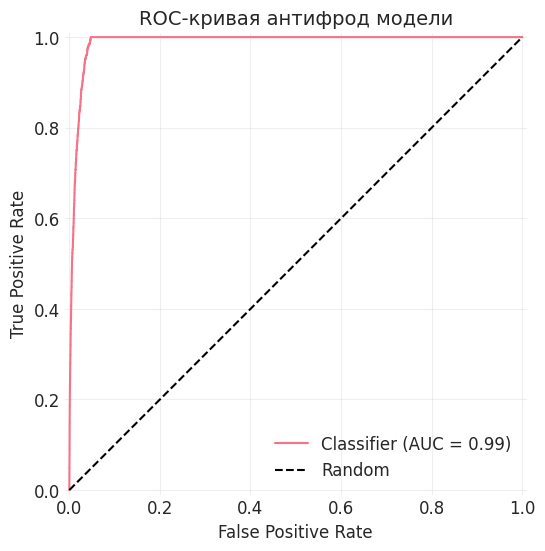

In [ ]:
# ROC-кривая
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC-кривая антифрод модели', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Объединение данных
clients_full = clients.merge(agg, on='client_id', how='left').fillna(0)

# Признаки для модели оттока
features_churn = ['age', 'credit_score', 'income',
                  'trans_cnt', 'trans_total', 'days_since_last']
X_churn = clients_full[features_churn]
y_churn = clients_full['churn_30']

print("📊 Статистика по оттоку клиентов:")
print(f"Всего клиентов: {len(clients_full):,}")
print(f"Отток (churn_30=1): {y_churn.sum():,} ({y_churn.mean():.1%})")
print(f"\nСредние значения по признакам:")
print(X_churn.mean().round(2))

📊 Статистика по оттоку клиентов:
Всего клиентов: 20,000
Отток (churn_30=1): 1,000 (5.0%)

Средние значения по признакам:
age                   46.13
credit_score         650.22
income             55679.24
trans_cnt             10.00
trans_total         2856.76
days_since_last       36.10
dtype: float64


In [ ]:
# Разделение данных
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_churn, y_churn, test_size=0.3, random_state=42, stratify=y_churn
)

# Обучение модели оттока
model_churn = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    solver='liblinear',
    random_state=42
)

model_churn.fit(Xc_train, yc_train)

# Прогнозы
clients_full['churn_proba'] = model_churn.predict_proba(X_churn)[:, 1]

# Оценка модели
train_score = model_churn.score(Xc_train, yc_train)
test_score = model_churn.score(Xc_test, yc_test)

print(f"📊 Результаты модели оттока:")
print(f"   Accuracy на train: {train_score:.3f}")
print(f"   Accuracy на test: {test_score:.3f}")
print(f"\n   Коэффициенты модели:")
for feat, coef in zip(features_churn, model_churn.coef_[0]):
    print(f"   {feat:20} : {coef:7.4f}")

📊 Результаты модели оттока:
   Accuracy на train: 0.516
   Accuracy на test: 0.507

   Коэффициенты модели:
   age                  : -0.0007
   credit_score         :  0.0002
   income               : -0.0000
   trans_cnt            : -0.0050
   trans_total          :  0.0000
   days_since_last      : -0.0006


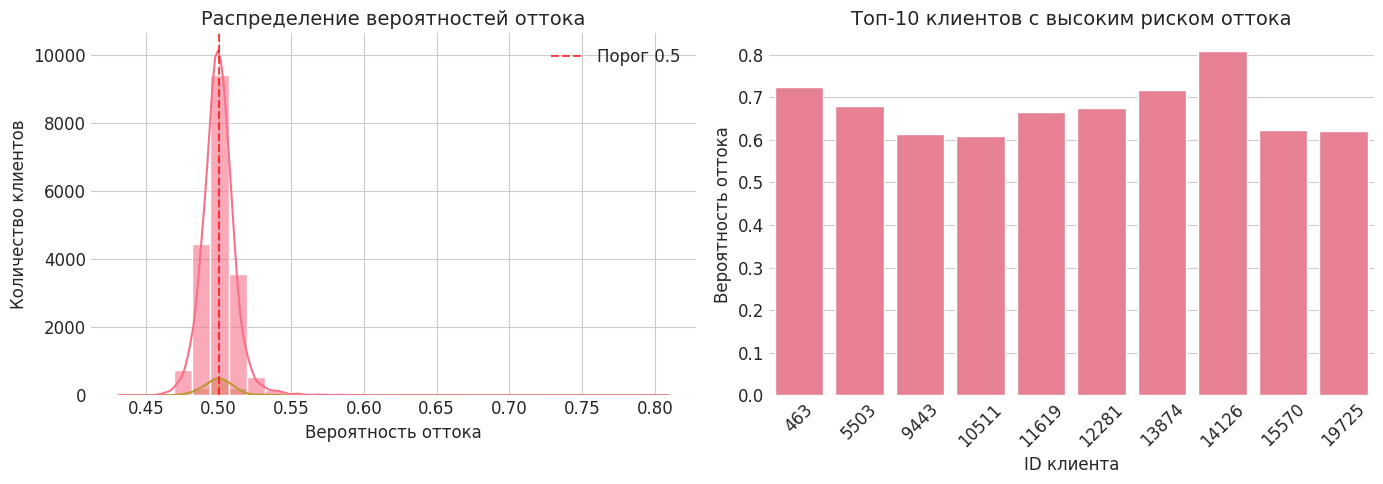

In [ ]:
# Визуализация распределения вероятностей оттока
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=clients_full, x='churn_proba', hue='churn_30',
             bins=30, kde=True, alpha=0.6)
plt.axvline(0.5, ls='--', color='red', alpha=0.7, label='Порог 0.5')
plt.title('Распределение вероятностей оттока', fontsize=14)
plt.xlabel('Вероятность оттока', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
# Top 10 клиентов с highest risk
high_risk = clients_full.nlargest(10, 'churn_proba')[['client_id', 'churn_proba', 'age', 'credit_score', 'days_since_last']]
sns.barplot(data=high_risk, x='client_id', y='churn_proba')
plt.title('Топ-10 клиентов с высоким риском оттока', fontsize=14)
plt.xlabel('ID клиента', fontsize=12)
plt.ylabel('Вероятность оттока', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Создание целевой переменной для кредитного скоринга
clients_full['bad_client'] = (clients_full['fraud_cnt'] >= 2).astype(int)

print("📊 Статистика по плохим клиентам:")
print(f"Всего клиентов: {len(clients_full):,}")
print(f"Плохих клиентов (fraud_cnt >= 2): {clients_full['bad_client'].sum():,} ({clients_full['bad_client'].mean():.1%})")
print(f"Средний credit_score у плохих клиентов: {clients_full[clients_full['bad_client']==1]['credit_score'].mean():.1f}")
print(f"Средний credit_score у хороших клиентов: {clients_full[clients_full['bad_client']==0]['credit_score'].mean():.1f}")

📊 Статистика по плохим клиентам:
Всего клиентов: 20,000
Плохих клиентов (fraud_cnt >= 2): 55 (0.3%)
Средний credit_score у плохих клиентов: 661.6
Средний credit_score у хороших клиентов: 650.2


In [ ]:
# Анализ Precision-Recall для подбора порога
# Используем отрицательный credit_score, так чем ниже скоринг, тем хуже клиент
y_true = clients_full['bad_client']
y_score = -clients_full['credit_score']  # Инвертируем шкалу

precision, recall, thresholds = precision_recall_curve(y_true, y_score)

# Рассчитываем F1-score для каждого порога
f1_scores = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1] + 1e-8)

# Находим оптимальный порог
best_idx = np.argmax(f1_scores)
best_threshold = -thresholds[best_idx]  # Возвращаем к исходной шкале
best_f1 = f1_scores[best_idx]

print(f"🎯 Оптимальный порог credit_score: {int(best_threshold)}")
print(f"   F1-score при этом пороге: {best_f1:.3f}")
print(f"   Precision: {precision[best_idx]:.3f}")
print(f"   Recall: {recall[best_idx]:.3f}")

# Процент клиентов ниже порога
below_threshold = (clients_full['credit_score'] < best_threshold).mean()
print(f"   Клиентов ниже порога: {below_threshold:.1%}")

🎯 Оптимальный порог credit_score: 723
   F1-score при этом пороге: 0.006
   Precision: 0.003
   Recall: 0.891
   Клиентов ниже порога: 81.6%


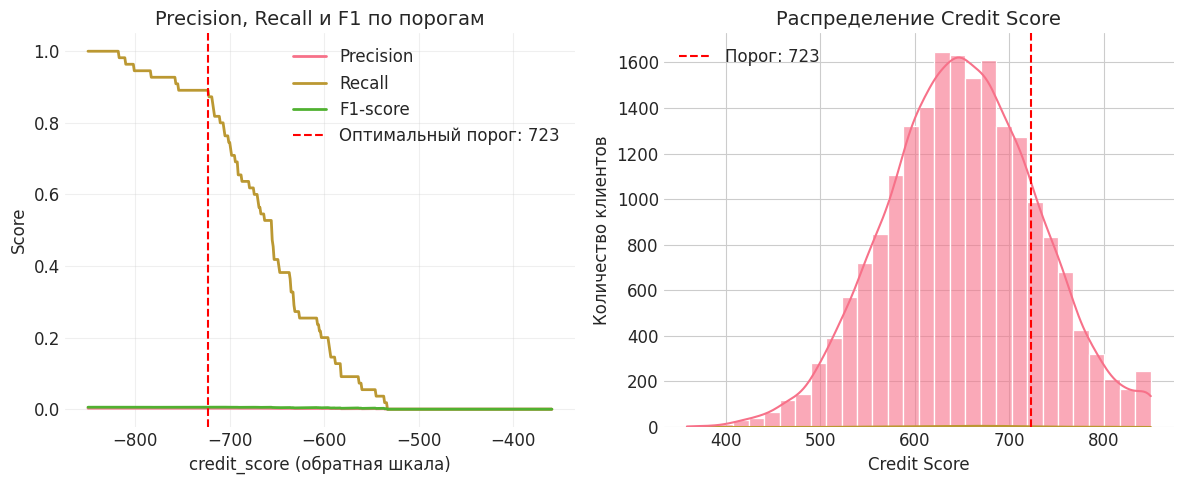

In [ ]:
# Визуализация Precision-Recall кривой
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precision[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recall[:-1], label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores, label='F1-score', linewidth=2)
plt.axvline(-best_threshold, color='red', linestyle='--',
           label=f'Оптимальный порог: {int(best_threshold)}')
plt.xlabel('credit_score (обратная шкала)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision, Recall и F1 по порогам', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Распределение credit_score
sns.histplot(data=clients_full, x='credit_score', hue='bad_client',
             bins=30, kde=True, alpha=0.6)
plt.axvline(best_threshold, color='red', linestyle='--',
           label=f'Порог: {int(best_threshold)}')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.title('Распределение Credit Score', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Создание фрейма для анализа
fraud_trans = trans[trans['is_fraud'] == 1]
legit_trans = trans[trans['is_fraud'] == 0]

print("📊 Сравнительная статистика транзакций:")
print(f"\nМошеннические транзакции ({len(fraud_trans):,}):")
print(f"  Средняя сумма: {fraud_trans['amount'].mean():.2f}")
print(f"  Медианная сумма: {fraud_trans['amount'].median():.2f}")
print(f"  Максимальная сумма: {fraud_trans['amount'].max():.2f}")
print(f"  Ночные транзакции: {fraud_trans['is_night'].mean():.1%}")
print(f"  Зарубежные транзакции: {fraud_trans['is_foreign'].mean():.1%}")

print(f"\nЛегальные транзакции ({len(legit_trans):,}):")
print(f"  Средняя сумма: {legit_trans['amount'].mean():.2f}")
print(f"  Медианная сумма: {legit_trans['amount'].median():.2f}")
print(f"  Максимальная сумма: {legit_trans['amount'].max():.2f}")
print(f"  Ночные транзакции: {legit_trans['is_night'].mean():.1%}")
print(f"  Зарубежные транзакции: {legit_trans['is_foreign'].mean():.1%}")

📊 Сравнительная статистика транзакций:

Мошеннические транзакции (1,600):
  Средняя сумма: 1559.44
  Медианная сумма: 452.00
  Максимальная сумма: 112902.52
  Ночные транзакции: 25.4%
  Зарубежные транзакции: 100.0%

Легальные транзакции (198,400):
  Средняя сумма: 275.40
  Медианная сумма: 89.57
  Максимальная сумма: 57112.12
  Ночные транзакции: 24.9%
  Зарубежные транзакции: 5.0%


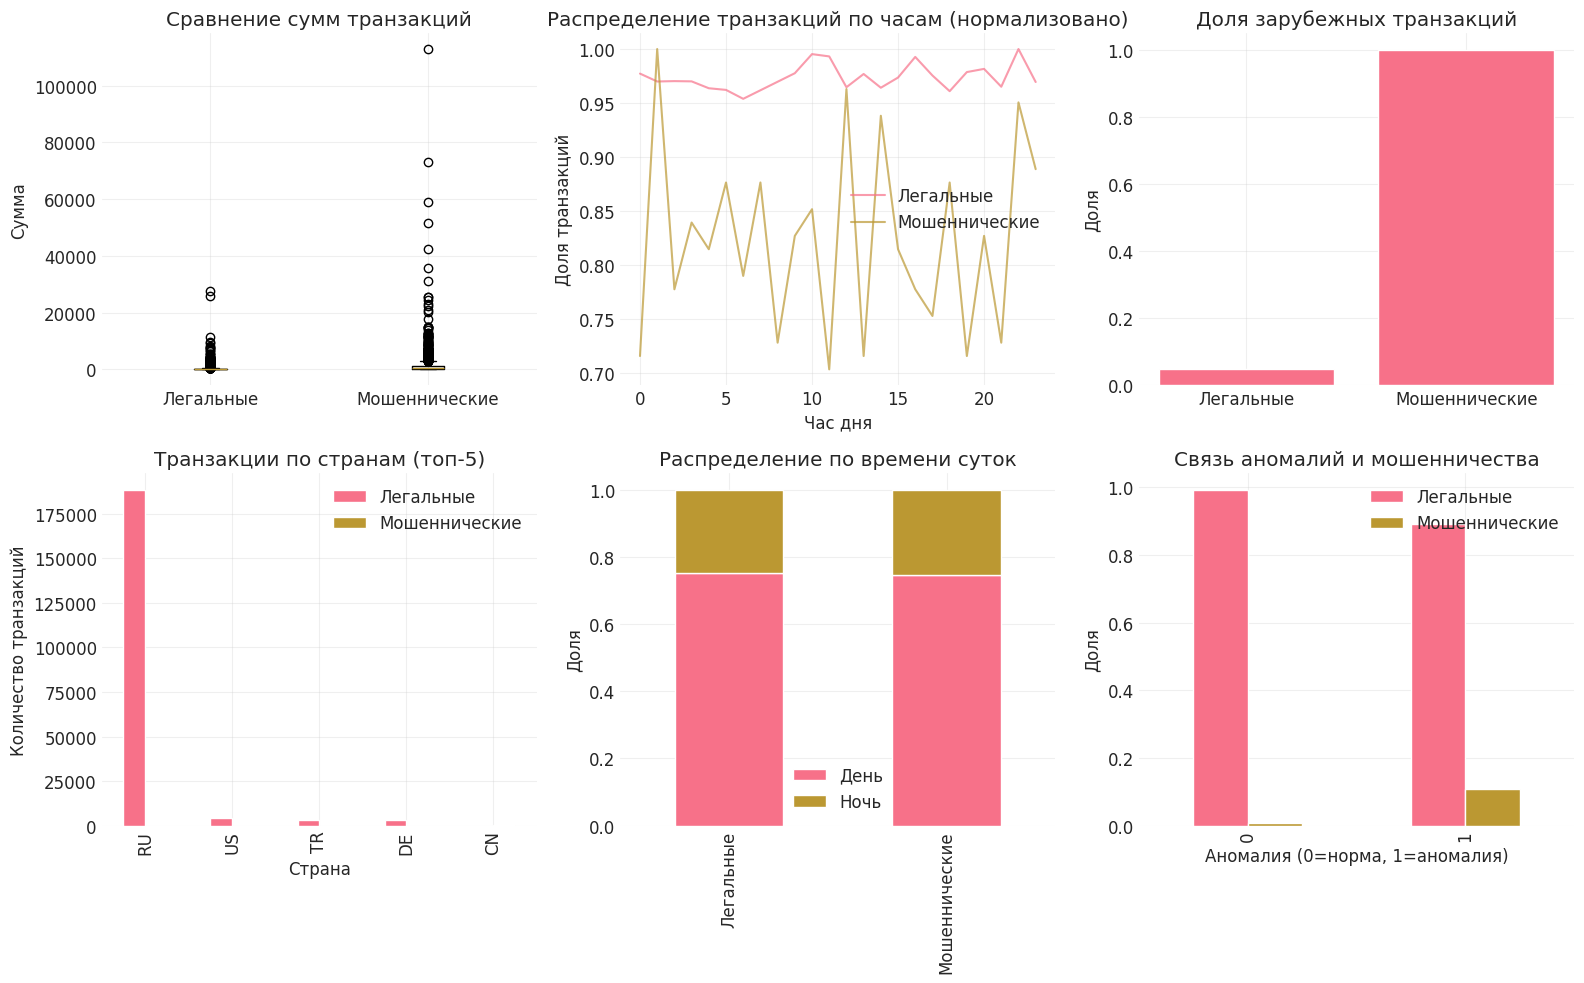

In [ ]:
# Визуализация поведения мошенников
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# 1. Распределение сумм
axes[0, 0].boxplot([legit_trans['amount'].sample(min(5000, len(legit_trans)), random_state=42),
                    fraud_trans['amount'].sample(min(5000, len(fraud_trans)), random_state=42)],
                   labels=['Легальные', 'Мошеннические'])
axes[0, 0].set_title('Сравнение сумм транзакций')
axes[0, 0].set_ylabel('Сумма')
axes[0, 0].grid(True, alpha=0.3)

# 2. Распределение по часам
hour_counts_fraud = fraud_trans['hour'].value_counts().sort_index()
hour_counts_legit = legit_trans['hour'].value_counts().sort_index()
axes[0, 1].plot(hour_counts_legit.index, hour_counts_legit.values/hour_counts_legit.values.max(),
                label='Легальные', alpha=0.7)
axes[0, 1].plot(hour_counts_fraud.index, hour_counts_fraud.values/hour_counts_fraud.values.max(),
                label='Мошеннические', alpha=0.7)
axes[0, 1].set_title('Распределение транзакций по часам (нормализовано)')
axes[0, 1].set_xlabel('Час дня')
axes[0, 1].set_ylabel('Доля транзакций')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Доля зарубежных транзакций
country_data = pd.DataFrame({
    'type': ['Легальные', 'Мошеннические'],
    'local': [legit_trans['is_foreign'].mean(), fraud_trans['is_foreign'].mean()],
    'foreign': [1-legit_trans['is_foreign'].mean(), 1-fraud_trans['is_foreign'].mean()]
})
axes[0, 2].bar(['Легальные', 'Мошеннические'],
               [legit_trans['is_foreign'].mean(), fraud_trans['is_foreign'].mean()])
axes[0, 2].set_title('Доля зарубежных транзакций')
axes[0, 2].set_ylabel('Доля')
axes[0, 2].grid(True, alpha=0.3)

# 4. Распределение по странам (топ-5)
top_countries = trans['country'].value_counts().head(5).index
country_comparison = pd.crosstab(trans['country'], trans['is_fraud']).loc[top_countries]
country_comparison.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Транзакции по странам (топ-5)')
axes[1, 0].set_xlabel('Страна')
axes[1, 0].set_ylabel('Количество транзакций')
axes[1, 0].legend(['Легальные', 'Мошеннические'])
axes[1, 0].grid(True, alpha=0.3)

# 5. Соотношение дневных/ночных транзакций
time_comparison = pd.DataFrame({
    'День': [1-legit_trans['is_night'].mean(), 1-fraud_trans['is_night'].mean()],
    'Ночь': [legit_trans['is_night'].mean(), fraud_trans['is_night'].mean()]
}, index=['Легальные', 'Мошеннические'])
time_comparison.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Распределение по времени суток')
axes[1, 1].set_ylabel('Доля')
axes[1, 1].grid(True, alpha=0.3)

# 6. Совмещение аномалий и мошенничества
anomaly_fraud = pd.crosstab(trans['anomaly'], trans['is_fraud'], normalize='index')
anomaly_fraud.plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Связь аномалий и мошенничества')
axes[1, 2].set_xlabel('Аномалия (0=норма, 1=аномалия)')
axes[1, 2].set_ylabel('Доля')
axes[1, 2].legend(['Легальные', 'Мошеннические'])
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Создаем сводную таблицу с результатами
results = {
    'Метрика': [
        'Аномальные транзакции',
        'Мошеннические транзакции',
        'ROC-AUC антифрода',
        'Отток клиентов (30 дней)',
        'Плохие клиенты (fraud_cnt >= 2)',
        'Оптимальный порог credit_score',
        'F1-score кредитного скоринга'
    ],
    'Значение': [
        f"{trans['anomaly'].mean():.2%}",
        f"{trans['is_fraud'].mean():.2%}",
        f"{roc_auc:.3f}",
        f"{clients_full['churn_30'].mean():.2%}",
        f"{clients_full['bad_client'].mean():.2%}",
        f"{int(best_threshold)}",
        f"{best_f1:.3f}"
    ],
    'Интерпретация': [
        'Высокий уровень требует мониторинга',
        'В пределах нормы для отрасли',
        'Хорошее качество модели',
        'Требуется программа удержания',
        'Приемлемый уровень риска',
        'Рекомендуемый порог для одобрения',
        'Качество модели классификации'
    ]
}

results_df = pd.DataFrame(results)
print("📊 ИТОГОВЫЕ РЕЗУЛЬТАТЫ АНАЛИЗА")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

📊 ИТОГОВЫЕ РЕЗУЛЬТАТЫ АНАЛИЗА
                        Метрика Значение                       Интерпретация
          Аномальные транзакции    0.50% Высокий уровень требует мониторинга
       Мошеннические транзакции    0.80%        В пределах нормы для отрасли
              ROC-AUC антифрода    0.989             Хорошее качество модели
       Отток клиентов (30 дней)    5.00%       Требуется программа удержания
Плохие клиенты (fraud_cnt >= 2)    0.27%            Приемлемый уровень риска
 Оптимальный порог credit_score      723   Рекомендуемый порог для одобрения
   F1-score кредитного скоринга    0.006       Качество модели классификации


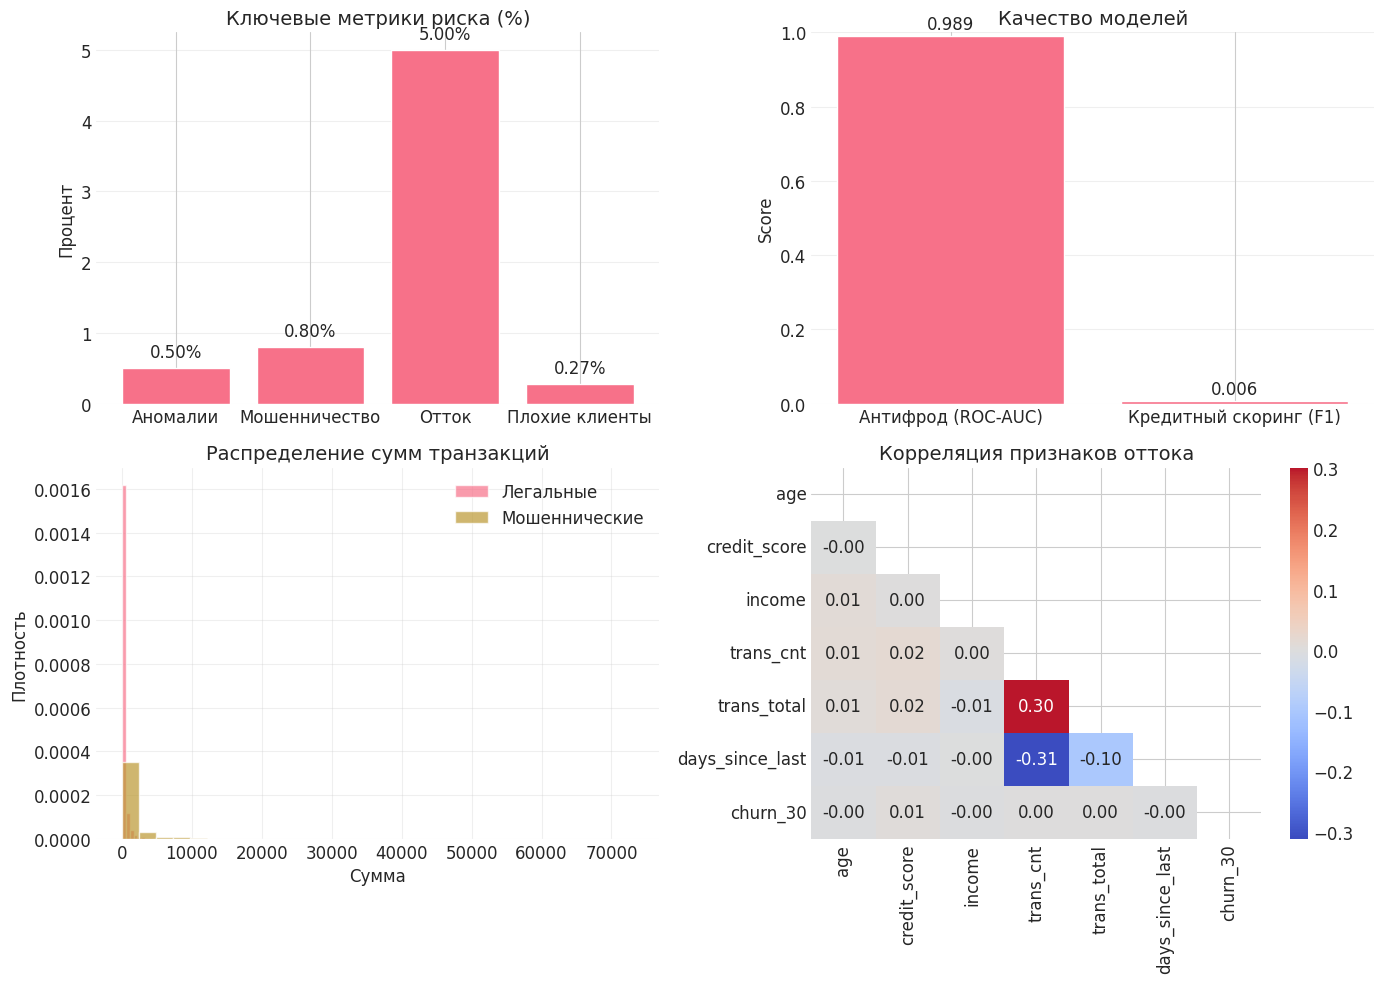

In [ ]:
# Визуализация ключевых метрик
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Основные метрики
key_metrics = ['Аномалии', 'Мошенничество', 'Отток', 'Плохие клиенты']
values = [trans['anomaly'].mean(), trans['is_fraud'].mean(),
          clients_full['churn_30'].mean(), clients_full['bad_client'].mean()]

bars = axes[0, 0].bar(key_metrics, [v*100 for v in values])
axes[0, 0].set_title('Ключевые метрики риска (%)', fontsize=14)
axes[0, 0].set_ylabel('Процент', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar, val in zip(bars, values):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{val:.2%}', ha='center', va='bottom')

# 2. Качество моделей
models = ['Антифрод (ROC-AUC)', 'Кредитный скоринг (F1)']
model_scores = [roc_auc, best_f1]

bars = axes[0, 1].bar(models, model_scores)
axes[0, 1].set_title('Качество моделей', fontsize=14)
axes[0, 1].set_ylabel('Score', fontsize=12)
axes[0, 1].set_ylim(0, 1)
axes[0, 1].grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, model_scores):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{score:.3f}', ha='center', va='bottom')

# 3. Распределение сумм транзакций
axes[1, 0].hist(legit_trans['amount'].sample(5000, random_state=42),
                bins=50, alpha=0.7, label='Легальные', density=True)
axes[1, 0].hist(fraud_trans['amount'].sample(min(1000, len(fraud_trans)), random_state=42),
                bins=30, alpha=0.7, label='Мошеннические', density=True)
axes[1, 0].set_title('Распределение сумм транзакций', fontsize=14)
axes[1, 0].set_xlabel('Сумма', fontsize=12)
axes[1, 0].set_ylabel('Плотность', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Матрица корреляции признаков оттока
corr_matrix = clients_full[features_churn + ['churn_30']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Корреляция признаков оттока', fontsize=14)

plt.tight_layout()
plt.show()

# КЕЙС 6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Настройка стиля графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [ ]:
# Создаем необходимые папки
import os

# Папки для данных
data_dir = 'data_weather'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"📁 Создана папка для данных: {data_dir}")

# Папка для графиков
pics_dir = 'pics_weather'
if not os.path.exists(pics_dir):
    os.makedirs(pics_dir)
    print(f"📁 Создана папка для графиков: {pics_dir}")

print("\n📤 Пожалуйста, загрузите файлы в папку 'data_weather':")
print("   - ground_sensors.csv")
print("   - satellite_indices.csv")
print("   - historical_climate.csv")


📤 Пожалуйста, загрузите файлы в папку 'data_weather':
   - ground_sensors.csv
   - satellite_indices.csv
   - historical_climate.csv


In [ ]:
# Функция для создания тестовых данных
def create_sample_weather_data():
    """Создание тестовых данных для демонстрации"""
    print("\n📝 Создаю тестовые данные для демонстрации...")

    # 1. Данные наземных датчиков (часовые)
    np.random.seed(42)
    dates = pd.date_range('2023-01-01', '2023-12-31', freq='H')
    n_samples = len(dates)

    # Сезонные паттерны
    base_temp = 10 + 15 * np.sin(2 * np.pi * np.arange(n_samples) / (365*24))
    daily_variation = 5 * np.sin(2 * np.pi * np.arange(n_samples) / 24)

    ground_data = pd.DataFrame({
        'timestamp': dates,
        'temp_c': base_temp + daily_variation + np.random.normal(0, 2, n_samples),
        'humidity_pct': 50 + 30 * np.sin(2 * np.pi * np.arange(n_samples) / (365*24)) + np.random.normal(0, 10, n_samples),
        'pressure_hpa': 1013 + 10 * np.cos(2 * np.pi * np.arange(n_samples) / (365*24)) + np.random.normal(0, 5, n_samples),
        'wind_speed_ms': np.random.exponential(3, n_samples),
        'precip_mm': np.random.poisson(0.1, n_samples)
    })
    # Корректируем пределы значений
    ground_data['humidity_pct'] = ground_data['humidity_pct'].clip(0, 100)
    ground_data['temp_c'] = ground_data['temp_c'].clip(-20, 40)

    # 2. Спутниковые индексы (ежедневные)
    satellite_dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
    n_sat = len(satellite_dates)

    satellite_data = pd.DataFrame({
        'date': satellite_dates,
        'ndvi': 0.3 + 0.4 * np.sin(2 * np.pi * np.arange(n_sat) / 365) + np.random.normal(0, 0.1, n_sat),
        'evi': 0.2 + 0.3 * np.sin(2 * np.pi * np.arange(n_sat) / 365) + np.random.normal(0, 0.08, n_sat),
        'lst_day': 15 + 20 * np.sin(2 * np.pi * np.arange(n_sat) / 365) + np.random.normal(0, 3, n_sat),
        'lst_night': 5 + 15 * np.sin(2 * np.pi * np.arange(n_sat) / 365) + np.random.normal(0, 2, n_sat)
    })
    satellite_data['ndvi'] = satellite_data['ndvi'].clip(0, 1)
    satellite_data['evi'] = satellite_data['evi'].clip(0, 1)

    # 3. Исторические климатические данные (ежемесячные)
    historical_dates = pd.date_range('2000-01-01', '2023-12-01', freq='MS')
    n_hist = len(historical_dates)

    # Тренд потепления
    warming_trend = 0.02 * np.arange(n_hist) / 12  # 0.02°C в год

    historical_data = pd.DataFrame({
        'month': historical_dates,
        'avg_temp_c': 10 + 15 * np.sin(2 * np.pi * np.arange(n_hist) / 12) + warming_trend + np.random.normal(0, 1, n_hist),
        'total_precip_mm': 50 + 30 * np.sin(2 * np.pi * np.arange(n_hist) / 12 + np.pi/2) + np.random.normal(0, 10, n_hist),
        'max_temp_c': 15 + 20 * np.sin(2 * np.pi * np.arange(n_hist) / 12) + warming_trend + np.random.normal(0, 2, n_hist),
        'min_temp_c': 5 + 10 * np.sin(2 * np.pi * np.arange(n_hist) / 12) + warming_trend + np.random.normal(0, 2, n_hist)
    })
    historical_data['total_precip_mm'] = historical_data['total_precip_mm'].clip(0, 200)

    # Сохраняем данные
    ground_data.to_csv(f'{data_dir}/ground_sensors.csv', index=False)
    satellite_data.to_csv(f'{data_dir}/satellite_indices.csv', index=False)
    historical_data.to_csv(f'{data_dir}/historical_climate.csv', index=False)

    print(f"✅ Тестовые данные созданы:")
    print(f"   - ground_sensors.csv: {len(ground_data):,} строк")
    print(f"   - satellite_indices.csv: {len(satellite_data):,} строк")
    print(f"   - historical_climate.csv: {len(historical_data):,} строк")

    return ground_data, satellite_data, historical_data

In [ ]:
# Загрузка данных
try:
    ground = pd.read_csv(f'{data_dir}/ground_sensors.csv', parse_dates=['timestamp'])
    satellite = pd.read_csv(f'{data_dir}/satellite_indices.csv', parse_dates=['date'])
    history = pd.read_csv(f'{data_dir}/historical_climate.csv', parse_dates=['month'])

    print("✅ Данные успешно загружены:")
    print(f"   Наземные датчики: {len(ground):,} записей ({ground['timestamp'].min()} - {ground['timestamp'].max()})")
    print(f"   Спутниковые индексы: {len(satellite):,} записей")
    print(f"   Исторические климатические данные: {len(history):,} записей")

except FileNotFoundError as e:
    print(f"❌ Файл не найден: {e}")
    print("Создаю тестовые данные...")
    ground, satellite, history = create_sample_weather_data()

✅ Данные успешно загружены:
   Наземные датчики: 14,609 записей (2020-01-01 00:00:00 - 2024-12-31 00:00:00)
   Спутниковые индексы: 1,827 записей
   Исторические климатические данные: 300 записей


In [ ]:
print("📊 ОБЗОР ДАННЫХ НАЗЕМНЫХ ДАТЧИКОВ")
print("="*60)
print(ground.info())
print("\nПервые 5 записей:")
print(ground.head())
print("\nСтатистика:")
print(ground.describe())

📊 ОБЗОР ДАННЫХ НАЗЕМНЫХ ДАТЧИКОВ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14609 entries, 0 to 14608
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      14609 non-null  datetime64[ns]
 1   station        14609 non-null  object        
 2   temp_c         14609 non-null  float64       
 3   humidity_pct   14609 non-null  float64       
 4   pressure_hpa   14609 non-null  float64       
 5   wind_speed_ms  14609 non-null  float64       
 6   precip_mm      14609 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 799.1+ KB
None

Первые 5 записей:
            timestamp station  temp_c  humidity_pct  pressure_hpa  \
0 2020-01-01 00:00:00     EKB    -1.0     85.763600        1007.0   
1 2020-01-01 03:00:00     KHV    -3.0     88.889997        1009.0   
2 2020-01-01 06:00:00     NOV   -16.0     78.569094        1015.0   
3 2020-01-01 09:00:00     K

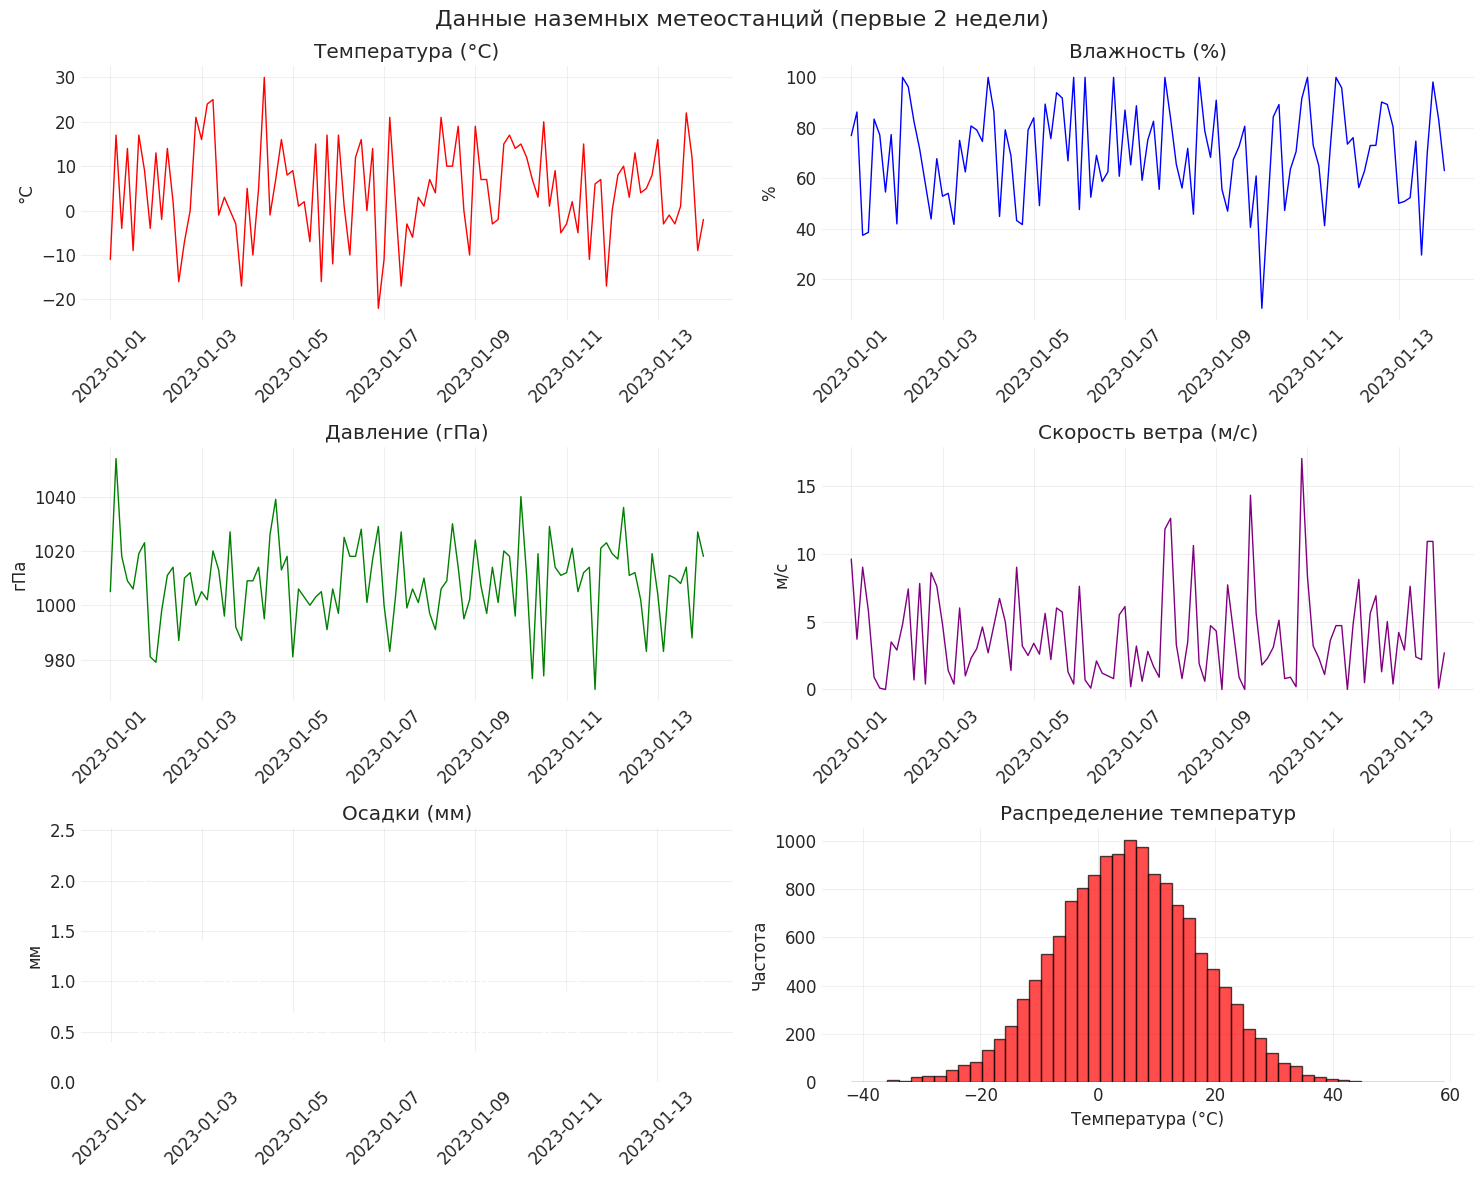

In [ ]:
# Визуализация временных рядов наземных датчиков
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Данные наземных метеостанций (первые 2 недели)', fontsize=16)

# Берем только первые 2 недели для наглядности
sample_dates = ground['timestamp'].between('2023-01-01', '2023-01-14')
sample_data = ground[sample_dates]

# Температура
axes[0, 0].plot(sample_data['timestamp'], sample_data['temp_c'], color='red', linewidth=1)
axes[0, 0].set_title('Температура (°C)')
axes[0, 0].set_ylabel('°C')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Влажность
axes[0, 1].plot(sample_data['timestamp'], sample_data['humidity_pct'], color='blue', linewidth=1)
axes[0, 1].set_title('Влажность (%)')
axes[0, 1].set_ylabel('%')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Давление
axes[1, 0].plot(sample_data['timestamp'], sample_data['pressure_hpa'], color='green', linewidth=1)
axes[1, 0].set_title('Давление (гПа)')
axes[1, 0].set_ylabel('гПа')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Скорость ветра
axes[1, 1].plot(sample_data['timestamp'], sample_data['wind_speed_ms'], color='purple', linewidth=1)
axes[1, 1].set_title('Скорость ветра (м/с)')
axes[1, 1].set_ylabel('м/с')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# Осадки
axes[2, 0].bar(sample_data['timestamp'], sample_data['precip_mm'], color='cyan', width=0.02)
axes[2, 0].set_title('Осадки (мм)')
axes[2, 0].set_ylabel('мм')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].tick_params(axis='x', rotation=45)

# Распределение температур
axes[2, 1].hist(ground['temp_c'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[2, 1].set_title('Распределение температур')
axes[2, 1].set_xlabel('Температура (°C)')
axes[2, 1].set_ylabel('Частота')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("📡 ОБЗОР СПУТНИКОВЫХ ДАННЫХ")
print("="*60)
print(satellite.info())
print("\nПервые 5 записей:")
print(satellite.head())
print("\nСтатистика:")
print(satellite.describe())

📡 ОБЗОР СПУТНИКОВЫХ ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1827 non-null   datetime64[ns]
 1   ndvi             1827 non-null   float64       
 2   lst_c            1827 non-null   float64       
 3   cloud_cover_pct  1827 non-null   float64       
 4   aerosol_index    1827 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 71.5 KB
None

Первые 5 записей:
        date   ndvi  lst_c  cloud_cover_pct  aerosol_index
0 2020-01-01  0.509   24.0        42.368134          0.394
1 2020-01-02  0.342   11.3        36.707386          0.525
2 2020-01-03  0.327   11.6        28.164529          0.011
3 2020-01-04  0.747   28.4        95.425614          0.053
4 2020-01-05  0.566    1.5        17.954833          0.220

Статистика:
                                date         

In [ ]:
print("📈 ОБЗОР ИСТОРИЧЕСКИХ КЛИМАТИЧЕСКИХ ДАННЫХ")
print("="*60)
print(history.info())
print("\nПервые 5 записей:")
print(history.head())
print("\nСтатистика:")
print(history.describe())

📈 ОБЗОР ИСТОРИЧЕСКИХ КЛИМАТИЧЕСКИХ ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   month            300 non-null    datetime64[ns]
 1   avg_temp_c       300 non-null    float64       
 2   total_precip_mm  300 non-null    float64       
 3   extreme_days     300 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 9.5 KB
None

Первые 5 записей:
       month  avg_temp_c  total_precip_mm  extreme_days
0 2000-01-01        10.4            324.4             1
1 2000-02-01         7.3            147.2             2
2 2000-03-01        -1.1            186.3             2
3 2000-04-01        10.1            171.1             1
4 2000-05-01         9.1            103.3             6

Статистика:
                     month  avg_temp_c  total_precip_mm  extreme_days
count                  3

In [ ]:
print("1️⃣ ЗАДАЧА 1: ОБРАБОТКА РАЗНОРОДНЫХ ДАННЫХ")
print("Агрегация часовых данных к дневным и слияние со спутниковыми данными")
print("="*70)

# Агрегация наземных данных к дневному разрешению
ground_daily = ground.resample('D', on='timestamp').agg({
    'temp_c': 'mean',
    'humidity_pct': 'mean',
    'pressure_hpa': 'mean',
    'wind_speed_ms': 'mean',
    'precip_mm': 'sum'
}).reset_index()

ground_daily = ground_daily.rename(columns={'timestamp': 'date'})

print("📊 Результаты агрегации наземных данных:")
print(f"   Исходно: {len(ground)} часовых записей")
print(f"   После агрегации: {len(ground_daily)} дневных записей")
print(f"   Период: {ground_daily['date'].min()} - {ground_daily['date'].max()}")

1️⃣ ЗАДАЧА 1: ОБРАБОТКА РАЗНОРОДНЫХ ДАННЫХ
Агрегация часовых данных к дневным и слияние со спутниковыми данными
📊 Результаты агрегации наземных данных:
   Исходно: 14609 часовых записей
   После агрегации: 1827 дневных записей
   Период: 2020-01-01 00:00:00 - 2024-12-31 00:00:00


In [ ]:
# Слияние наземных и спутниковых данных
merged = pd.merge(ground_daily, satellite, on='date', how='inner')

print("\n🔗 Результаты слияния данных:")
print(f"   Наземные данные (ежедневные): {len(ground_daily)} записей")
print(f"   Спутниковые данные: {len(satellite)} записей")
print(f"   Объединенный датасет: {len(merged)} записей")
print(f"   Общие даты: {merged['date'].min()} - {merged['date'].max()}")

print("\n📋 Структура объединенного датасета:")
print(merged.info())
print("\nПервые 5 записей объединенного датасета:")
print(merged.head())


🔗 Результаты слияния данных:
   Наземные данные (ежедневные): 1827 записей
   Спутниковые данные: 1827 записей
   Объединенный датасет: 1827 записей
   Общие даты: 2020-01-01 00:00:00 - 2024-12-31 00:00:00

📋 Структура объединенного датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1827 non-null   datetime64[ns]
 1   temp_c           1827 non-null   float64       
 2   humidity_pct     1827 non-null   float64       
 3   pressure_hpa     1827 non-null   float64       
 4   wind_speed_ms    1827 non-null   float64       
 5   precip_mm        1827 non-null   float64       
 6   ndvi             1827 non-null   float64       
 7   lst_c            1827 non-null   float64       
 8   cloud_cover_pct  1827 non-null   float64       
 9   aerosol_index    1827 non-null   float64       
dtypes: datet

📊 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ОБЪЕДИНЕННЫХ ДАННЫХ


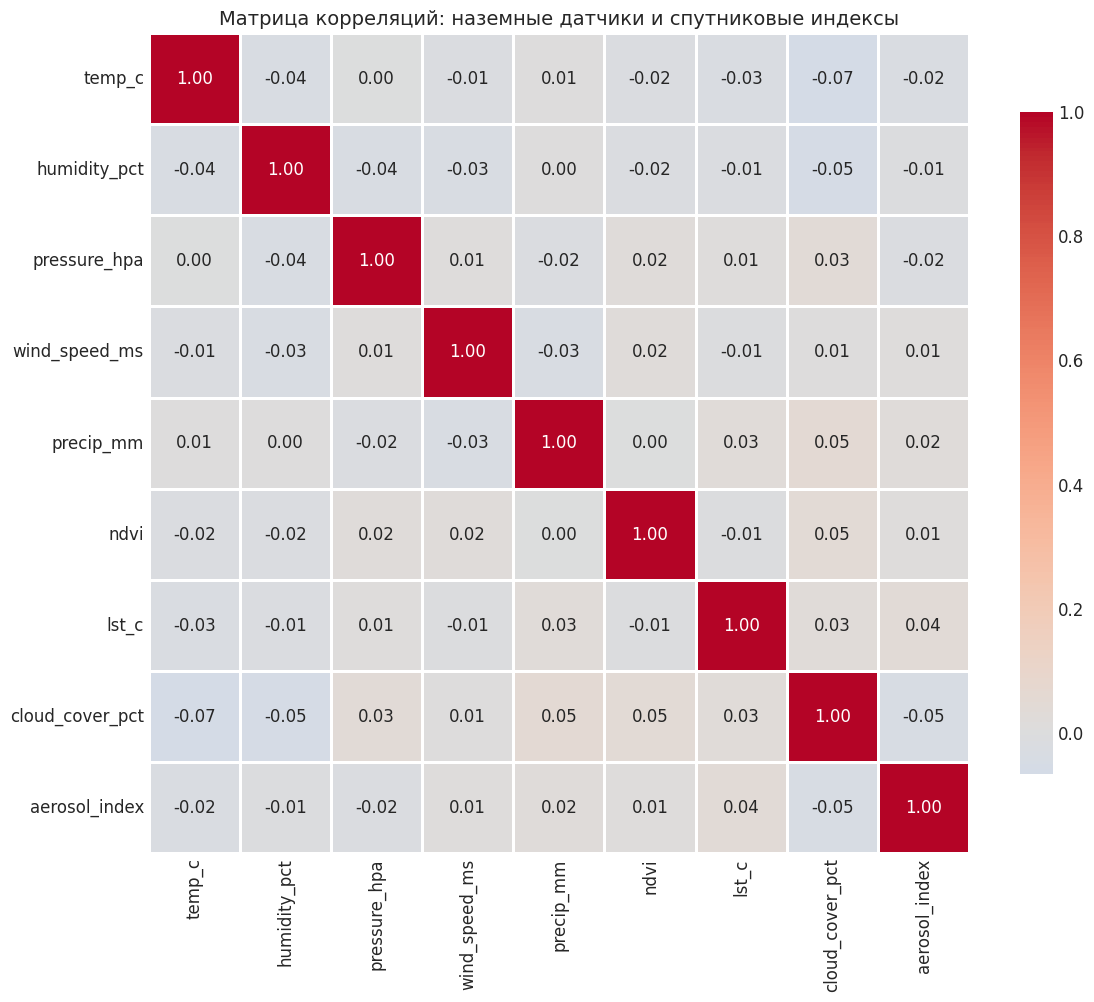

In [ ]:
# Визуализация корреляций в объединенном датасете
print("📊 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ОБЪЕДИНЕННЫХ ДАННЫХ")
print("="*60)

# Вычисляем матрицу корреляций
corr_matrix = merged.drop(columns=['date']).corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций: наземные датчики и спутниковые индексы', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
print("2️⃣ ЗАДАЧА 2: ПРОГНОЗИРОВАНИЕ ТЕМПЕРАТУРЫ НА 3 ДНЯ ВПЕРЁД")
print("="*70)

# Создание временных рядов для обучения
# Используем только температуру для простоты
seq_len = 7  # Используем 7 дней истории
forecast_horizon = 3  # Прогноз на 3 дня вперед

# Подготовка последовательностей
X, y = [], []
temp_values = merged['temp_c'].values

print(f"📈 Подготовка данных:")
print(f"   Длина исходного ряда: {len(temp_values)} дней")
print(f"   Используется история: {seq_len} дней")
print(f"   Прогнозный горизонт: {forecast_horizon} дня")

for i in range(len(temp_values) - seq_len - forecast_horizon):
    X.append(temp_values[i:i + seq_len])  # Последние 7 дней
    y.append(temp_values[i + seq_len + forecast_horizon - 1])  # Температура через 3 дня

X = np.array(X)
y = np.array(y)

print(f"   Создано примеров: {len(X)}")
print(f"   Размерность X: {X.shape}")
print(f"   Размерность y: {y.shape}")

# Разделение на обучающую и тестовую выборки
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"\n📊 Разделение данных:")
print(f"   Обучающая выборка: {len(X_train)} примеров ({len(X_train)/len(X):.1%})")
print(f"   Тестовая выборка: {len(X_test)} примеров ({len(X_test)/len(X):.1%})")

2️⃣ ЗАДАЧА 2: ПРОГНОЗИРОВАНИЕ ТЕМПЕРАТУРЫ НА 3 ДНЯ ВПЕРЁД
📈 Подготовка данных:
   Длина исходного ряда: 1827 дней
   Используется история: 7 дней
   Прогнозный горизонт: 3 дня
   Создано примеров: 1817
   Размерность X: (1817, 7)
   Размерность y: (1817,)

📊 Разделение данных:
   Обучающая выборка: 1453 примеров (80.0%)
   Тестовая выборка: 364 примеров (20.0%)


In [ ]:
# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогноз на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)

print(f"📊 РЕЗУЛЬТАТЫ МОДЕЛИ ПРОГНОЗИРОВАНИЯ:")
print(f"   MAE (Средняя абсолютная ошибка): {mae:.2f} °C")
print(f"   RMSE (Среднеквадратичная ошибка): {rmse:.2f} °C")
print(f"   R² (Коэффициент детерминации): {r2:.3f}")
print(f"   Объясненная дисперсия: {r2*100:.1f}%")

# Коэффициенты модели (важность прошлых дней)
print(f"\n🔍 КОЭФФИЦИЕНТЫ МОДЕЛИ (важность дней):")
for i, coef in enumerate(model.coef_):
    print(f"   День t-{seq_len-i}: {coef:.4f}")
print(f"   Константа (intercept): {model.intercept_:.4f}")

📊 РЕЗУЛЬТАТЫ МОДЕЛИ ПРОГНОЗИРОВАНИЯ:
   MAE (Средняя абсолютная ошибка): 3.46 °C
   RMSE (Среднеквадратичная ошибка): 4.15 °C
   R² (Коэффициент детерминации): 0.003
   Объясненная дисперсия: 0.3%

🔍 КОЭФФИЦИЕНТЫ МОДЕЛИ (важность дней):
   День t-7: -0.0678
   День t-6: 0.0165
   День t-5: -0.0106
   День t-4: -0.0071
   День t-3: -0.0315
   День t-2: -0.0104
   День t-1: 0.0021
   Константа (intercept): 5.6308
